### Phase 3 (Data Preparation)

#### Target Variable
In this project, the target variable will be the price of the vehicle. The price of the vehicle will be the value that we are trying to predict.

| Target | Description | Data Type | Analysis Type |
| --- | --- | --- | --- |
| Price| The price of the vehicle | int64 | Regression |

- Since the target variable is continuous, this will be a regression problem.
- We will need to explore the data to determine which machine learning algorithm will be the best fit for this problem.


| Target | Description | Data Type | Analysis Type |
| --- | --- | --- | --- |
| Body Types, fuel types or tranmission types | Vehicle type | int64 | Classification |

Classifying vehicles into these categories enables:
- **Better decision-making**: Manufacturers and dealerships gain insights into consumer preferences and market dynamics.
- **Improved analytics**: Allows detailed statistical analysis of vehicle trends and forecasting market evolution.
- **Regulatory compliance**: Supports environmental sustainability initiatives and policy adherence.
- **Enhanced customer targeting**: Facilitates effective marketing strategies and resource allocation.


### Import the data and libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x) 

- Note: The vin number is a unique identifier for each vehicle. We will use this column as the index for the dataframe.

In [3]:
# Load the data
file_path = "D:/JAMK/S2/AIDA-Project/used_cars_data/used_cars_data.csv"
df = pd.read_csv(file_path, index_col='vin')

pd.set_option('display.max_columns', None)

C:\Users\X1\AppData\Local\Temp\ipykernel_12900\2236694046.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, index_col='vin')


In [4]:
df.head()

,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
vin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.000,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.000,Black,NaN,NaN,NaN,True,NaN,18.399,166.6 in,2019-04-06,YELLOW,237132766,-66.158,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.000,Renegade,NaN,"177 hp @ 5,750 RPM",23141.000,NaN,0,2.800,370599.000,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.000,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.000,Black (Ebony),NaN,NaN,NaN,True,NaN,18.444,181 in,2020-02-15,BLACK,265946296,-66.079,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.000,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.000,NaN,0,3.000,389227.000,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.000,NaN,1233,969,NaN,H4,2500.000,H4,NaN,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.000,305.000,NaN,False,NaN,NaN,False,NaN,18.347,180.9 in,2017-04-25,UNKNOWN,173473508,-66.110,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.000,"305 hp @ 6,000 RPM",46995.000,False,0,NaN,370467.000,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.000,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.000,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.444,195.1 in,2020-02-26,GRAY,266911050,-66.079,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.000,Discovery,NaN,"340 hp @ 6,500 RPM",67430.000,NaN,0,3.000,389227.000,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.000,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.000,Black (Ebony),NaN,NaN,NaN,True,NaN,18.444,181 in,2020-04-25,BLACK,270957414,-66.079,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.000,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.000,NaN,0,3.000,389227.000,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


##### Common functions

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
sns.set(style="whitegrid")


def count_percent_null(df,col_name):
    null_percentage = df[col_name].isna().sum() / df.shape[0] * 100
    print(f"Null values in '{col_name}': {null_percentage.round(2)}%")

def column_null_info(df, column_name):
    # caculate null
    null_percentage = df[column_name].isna().sum() / df.shape[0] * 100
    
    print(f"Null values in '{column_name}': {null_percentage.round(2)}%")

    print("\nValue distribution:")
    if null_percentage < 100:
        value_distribution = df[column_name].value_counts(normalize=True) * 100
        print(value_distribution.round(2))


def plot_distribution(df, column_name):
   
    mean_value = df[column_name].mean()
    median_value = df[column_name].median()
    mode_value = df[column_name].mode()[0]


    plt.figure(figsize=(10, 10))

    # Histogram
    plt.subplot(2, 1, 1)
    sns.histplot(df[column_name], bins=30, kde=True, color='lightblue', alpha=0.7)

    plt.axvline(mode_value, color='r', linestyle='dashed', linewidth=2, label=f'Mode:{mode_value:.2f}')

    plt.axvline(mean_value, color='darkgreen', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

    plt.axvline(median_value, color='goldenrod', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

    plt.legend()
    plt.title(f"{column_name} Distribution (Histogram)")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(2, 1, 2)
    sns.boxplot(x=df[column_name])
    plt.title(f"{column_name} Distribution (Boxplot)")
    plt.xlabel(column_name)

    plt.tight_layout()
    plt.show()


def fill_na_with_mean(df, column_name):
    mean_value = df[column_name].mean()
    df[column_name] = df[column_name].fillna(mean_value)
    null_percentage = df[column_name].isna().sum() / df.shape[0] * 100

    print(f"The amount of null values in the {column_name} column are {null_percentage.round(2)}%.")

def fill_na_with_median(df, column_name):
    median_value = df[column_name].median()
    df[column_name] = df[column_name].fillna(median_value)
    null_percentage = df[column_name].isna().sum() / df.shape[0] * 100

    print(f"The amount of null values in the {column_name} column are {null_percentage.round(2)}%.")

def fill_na_with_value(df, col_name, valueTarget):
    df[col_name] = df[col_name].fillna(valueTarget)
    result = df[col_name].isna().sum()/df.shape[0]*100

    print(f"The amount of null values in the body_type column are {result.round(2)}%.")

def clean_measurement(value):
    if value == '--' or pd.isna(value):
        return np.nan
    if isinstance(value, str):
        match = re.match(r'(\d*\.?\d+)', value)
        if match:
            return float(match.group(0))
    return value

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000040 entries, ZACNJABB5KPJ92081 to JN8AT2MT1HW400805
Data columns (total 65 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   back_legroom             object 
 1   bed                      object 
 2   bed_height               object 
 3   bed_length               object 
 4   body_type                object 
 5   cabin                    object 
 6   city                     object 
 7   city_fuel_economy        float64
 8   combine_fuel_economy     float64
 9   daysonmarket             int64  
 10  dealer_zip               object 
 11  description              object 
 12  engine_cylinders         object 
 13  engine_displacement      float64
 14  engine_type              object 
 15  exterior_color           object 
 16  fleet                    object 
 17  frame_damaged            object 
 18  franchise_dealer         bool   
 19  franchise_make           object 
 20  front_legroom            

In [7]:
df.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,2508755.000,0.000,3000040.000,2827654.000,2508755.000,2827654.000,0.000,3000040.000,3000040.000,3000040.000,2855653.000,1483027.000,3000040.000,3000040.000,2959168.000,2999944.000,0.000,3000040.000
mean,22.693,NaN,76.060,2968.488,29.473,247.996,NaN,36.984,275498673.826,-90.642,31146.900,1.533,29933.367,550.977,4.270,233522.406,NaN,2017.728
std,8.807,NaN,108.884,1348.905,7.769,90.466,NaN,4.997,8894122.676,13.906,74586.745,0.920,19566.170,1079.448,0.513,132322.071,NaN,4.179
min,7.000,NaN,0.000,700.000,10.000,55.000,NaN,18.347,19946203.000,-157.928,0.000,1.000,165.000,0.000,1.000,41593.000,NaN,1915.000
25%,18.000,NaN,14.000,2000.000,25.000,175.000,NaN,33.509,274579410.500,-97.088,6.000,1.000,18451.000,0.000,4.000,63375.000,NaN,2017.000
50%,21.000,NaN,35.000,2500.000,29.000,244.000,NaN,37.847,278545307.000,-87.249,8267.000,1.000,26477.000,0.000,4.341,281627.000,NaN,2020.000
75%,26.000,NaN,82.000,3600.000,33.000,300.000,NaN,41.006,280455336.250,-80.455,43662.000,2.000,38220.000,785.000,4.605,336614.000,NaN,2020.000
max,127.000,NaN,3599.000,8400.000,127.000,1001.000,NaN,61.203,282022171.000,-66.079,99999988.000,19.000,3299995.000,147414.000,5.000,440951.000,NaN,2021.000


There are many variables with a very high percentage of missing values (pct_miss). Such as: **"is_cpo", "is_oemcpo", "bed_height", "salvage", "isCab", "theft_title", "has_accidents", "fleet", "frame_damaged", "bed", "cabin" and "bed_length"**. These will be later reomeved.   

The variables **"wheel_system_display" and "wheel_system"** seem to be the same one but coded differently.   

Some variables need to be converted to numeric variables. These are: **"maximum_seating", "transmission_display"** and all those with **units** such as **"in" or "gal"** at the end.   

There are two variables that contain more than one variable inside them, these are **"power" and "torque"**.   

Finally, there are variables that will not be considered in the model because they are not useful for the final purpose.   

They will not be intuitive for the user of www.mileage.one service. The variables are: **"franchise_make", "bed_length", "front_legroom", "back_legroom", "width", "wheelbase", "heigth", "city", "length", "listed_date", "sp_name", "trim_name", "exterior_color", "interior_color", "trimId", "major_options", "main_picture_url", "description", "vin"**.

### Data Cleaning & Data Wrangling

We will now begin the data cleaning process. This process will involve the following, but not in any particular order:
- Dropping duplicate rows
- checking for multicollinearity and determining how to handle it
- Filling in missing values/NaN values
- Exploring outliers and determining how to handle them
- Fixing the values and data types of the columns
- Feature Engineering (creating new features from existing features)
- Pre-processing the data for the model (scaling, encoding, etc.)
- Exploring the data to gain insights and answer the questions of interest
- Dropping irrelevant columns for the model
- Saving the cleaned data for the next part of the project


#### Duplicate 

Let's begin by checking for duplicate rows using the VIN number as our reference. If there are duplicate rows, we will drop them.

In [8]:
# checking for duplicate rows
duplucate_rows = df.duplicated().sum()

print(f"The number of duplicate rows are {duplucate_rows}.")

The number of duplicate rows are 40.


In [9]:
# setting the duplicated index
duplicate_index = df.duplicated(keep=False)

# calling the duplicated index in a dataframe
df.loc[duplicate_index, :].sort_index()

,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
vin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1C3CCCBG4FN686074,37.6 in,NaN,NaN,NaN,Sedan,NaN,Deer Park,19.000,NaN,530,99006,Featured today is a 2015 Chrysler 200 S FWD wi...,V6,3600.000,V6,Blue,False,False,False,NaN,42.2 in,15.8 gal,Gasoline,False,54.9 in,32.000,295.000,Black,False,NaN,NaN,False,NaN,47.941,192.3 in,2019-03-31,BLUE,236441395,-117.473,https://static.cargurus.com/images/forsale/201...,"['Leather Seats', 'Alloy Wheels', 'Bluetooth']",Chrysler,5 seats,77705.000,200,1.000,"295 hp @ 6,350 RPM",13488.000,False,428,4.453,305398.000,Parkway Auto,False,"262 lb-ft @ 4,250 RPM",A,Automatic,t53887,S Sedan FWD,NaN,FWD,Front-Wheel Drive,108.9 in,73.6 in,2015
1C3CCCBG4FN686074,37.6 in,NaN,NaN,NaN,Sedan,NaN,Deer Park,19.000,NaN,530,99006,Featured today is a 2015 Chrysler 200 S FWD wi...,V6,3600.000,V6,Blue,False,False,False,NaN,42.2 in,15.8 gal,Gasoline,False,54.9 in,32.000,295.000,Black,False,NaN,NaN,False,NaN,47.941,192.3 in,2019-03-31,BLUE,236441395,-117.473,https://static.cargurus.com/images/forsale/201...,"['Leather Seats', 'Alloy Wheels', 'Bluetooth']",Chrysler,5 seats,77705.000,200,1.000,"295 hp @ 6,350 RPM",13488.000,False,428,4.453,305398.000,Parkway Auto,False,"262 lb-ft @ 4,250 RPM",A,Automatic,t53887,S Sedan FWD,NaN,FWD,Front-Wheel Drive,108.9 in,73.6 in,2015
1C6RR7FT5ES405345,34.7 in,NaN,--,76.3 in,Pickup Truck,NaN,Bonners Ferry,NaN,NaN,49,83805,"Summary: Low miles, low price! Nice canopy. V...",V8,5700.000,V8,GRAY,False,False,False,NaN,41 in,26 gal,Gasoline,False,77.7 in,NaN,395.000,NaN,False,NaN,NaN,False,NaN,48.697,229 in,2020-07-24,GRAY,277372981,-116.313,https://static.cargurus.com/images/forsale/202...,"['Steel Wheels', 'Tow Package', 'Quick Order P...",RAM,6 seats,57451.000,1500,1.000,"395 hp @ 5,600 RPM",20480.000,False,1583,4.750,302926.000,Riverside Auto Center,False,"407 lb-ft @ 3,950 RPM",NaN,NaN,t52613,Tradesman Quad Cab 4WD,NaN,4WD,Four-Wheel Drive,140.5 in,79.4 in,2014
1C6RR7FT5ES405345,34.7 in,NaN,--,76.3 in,Pickup Truck,NaN,Bonners Ferry,NaN,NaN,49,83805,"Summary: Low miles, low price! Nice canopy. V...",V8,5700.000,V8,GRAY,False,False,False,NaN,41 in,26 gal,Gasoline,False,77.7 in,NaN,395.000,NaN,False,NaN,NaN,False,NaN,48.697,229 in,2020-07-24,GRAY,277372981,-116.313,https://static.cargurus.com/images/forsale/202...,"['Steel Wheels', 'Tow Package', 'Quick Order P...",RAM,6 seats,57451.000,1500,1.000,"395 hp @ 5,600 RPM",20480.000,False,1583,4.750,302926.000,Riverside Auto Center,False,"407 lb-ft @ 3,950 RPM",NaN,NaN,t52613,Tradesman Quad Cab 4WD,NaN,4WD,Four-Wheel Drive,140.5 in,79.4 in,2014
1FA6P8TH0J5179933,29 in,NaN,NaN,NaN,Coupe,NaN,Groveport,21.000,NaN,7,43125,"Click the Express button, Free home delivery o...",I4,2300.000,I4,Lightning Blue Metallic,False,False,False,NaN,45.1 in,15.5 gal,Gasoline,False,54.3 in,32.000,310.000,Dark Ceramic,False,NaN,NaN,False,NaN,39.888,188.5 in,2020-09-03,BLUE,281158317,-82.883,https://static.cargurus.com/images/forsale/202...,['Backup Camera'],Ford,4 seats,22738.000,Mustang,1.000,"310 hp @ 5,500 RPM",24000.000,False,16,4.212,345903.000,Ricart Used Car Factory,False,"350 lb-ft @ 3,000 RPM",A,Automatic,t73250,EcoBoost Coupe RWD,NaN,RWD,Rear-Wheel Drive,107.1 in,81.9 in,2018
...,...,...

The results show that there are no differences between the duplicate rows. This means that we can safely drop these rows

In [10]:
# Making a copy with the duplicated rows dropped
df2 = df.drop_duplicates().copy()
# checking for duplicate rows in the new dataframe
dup = df2.duplicated().sum()

print(f"The number of duplicate rows are {dup}.")

The number of duplicate rows are 0.


In [11]:
# sanity check
df2.shape

(3000000, 65)

#### Null values
- Now we have removed the duplicate rows, let's explore the null values

In [12]:
# checking for the total amount of null values as a percentage.
df2.isnull().sum()/df2.shape[0]*100

back_legroom            5.309
bed                    99.348
bed_height             85.697
bed_length             85.697
body_type               0.451
                        ...  
wheel_system            4.891
wheel_system_display    4.891
wheelbase               5.309
width                   5.309
year                    0.000
Length: 65, dtype: float64

- There are several columns having large amount of null values. This means that these columns will not be useful for our analysis because of the sheer amount of missing values.

- For variables with more than 50% null values, we should remove them to avoid misleading results.

In [13]:
# Delete columns containing more than 50% null values
percentage = 50
min_count =  int(((100-percentage)/100)*df2.shape[0] + 1)
df3 = df2.dropna(axis=1, thresh=min_count)

print(f"The columns with {percentage}% or more null values are: \n {df2.columns[df2.isnull().sum()/df2.shape[0]*100 > percentage]}")
print(f"The new shape of the dataframe is {df3.shape[0]} rows and {df3.shape[1]} columns.")

The columns with 50% or more null values are: 
 Index(['bed', 'bed_height', 'bed_length', 'cabin', 'combine_fuel_economy',
       'is_certified', 'is_cpo', 'is_oemcpo', 'owner_count',
       'vehicle_damage_category'],
      dtype='object')
The new shape of the dataframe is 3000000 rows and 55 columns.


In [14]:
percentage = df3.isna().sum()/df3.shape[0]*100

columns_with_nan = percentage[percentage > 0].index
df_filtered = df3[columns_with_nan]
df_filtered.head()

,back_legroom,body_type,city_fuel_economy,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,length,main_picture_url,major_options,maximum_seating,mileage,power,salvage,seller_rating,sp_id,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width
vin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,35.1 in,SUV / Crossover,NaN,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.000,I4,Solar Yellow,NaN,NaN,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.000,Black,NaN,166.6 in,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],5 seats,7.000,"177 hp @ 5,750 RPM",NaN,2.800,370599.000,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.2 in,79.6 in
SALCJ2FX1LH858117,38.1 in,SUV / Crossover,NaN,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.000,I4,Narvik Black,NaN,NaN,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.000,Black (Ebony),NaN,181 in,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],7 seats,8.000,"246 hp @ 5,500 RPM",NaN,3.000,389227.000,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in
JF1VA2M67G9829723,35.4 in,Sedan,17.000,NaN,H4,2500.000,H4,NaN,False,False,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.000,305.000,NaN,False,180.9 in,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",5 seats,NaN,"305 hp @ 6,000 RPM",False,NaN,370467.000,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.3 in,78.9 in
SALRR2RV0L2433391,37.6 in,SUV / Crossover,NaN,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.000,V6,Eiger Gray,NaN,NaN,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.000,Gray (Ebony/Ebony/Ebony),NaN,195.1 in,https://static.cargurus.com/images/forsale/202...,NaN,7 seats,11.000,"340 hp @ 6,500 RPM",NaN,3.000,389227.000,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115 in,87.4 in
SALCJ2FXXLH862327,38.1 in,SUV / Crossover,NaN,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.000,I4,Narvik Black,NaN,NaN,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.000,Black (Ebony),NaN,181 in,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],7 seats,7.000,"246 hp @ 5,500 RPM",NaN,3.000,389227.000,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in


After reducing the number of rows with null values, we are left with columns that have less than 50% null values, totaling 55 columns.  
Looking at columns values with unit **"in", "gal"** we can group the following columns to extract numerical values only.

In [15]:
# creating a copy of the dataframe
cars_df = df3.copy()

In [16]:
cars_df[['back_legroom', 'front_legroom','fuel_tank_volume','height','length','wheelbase','width']]

,back_legroom,front_legroom,fuel_tank_volume,height,length,wheelbase,width
vin,,,,,,,
ZACNJABB5KPJ92081,35.1 in,41.2 in,12.7 gal,66.5 in,166.6 in,101.2 in,79.6 in
SALCJ2FX1LH858117,38.1 in,39.1 in,17.7 gal,68 in,181 in,107.9 in,85.6 in
JF1VA2M67G9829723,35.4 in,43.3 in,15.9 gal,58.1 in,180.9 in,104.3 in,78.9 in
SALRR2RV0L2433391,37.6 in,39 in,23.5 gal,73 in,195.1 in,115 in,87.4 in
SALCJ2FXXLH862327,38.1 in,39.1 in,17.7 gal,68 in,181 in,107.9 in,85.6 in
...,...,...,...,...,...,...,...
2GNAXJEV0J6261526,39.7 in,40.9 in,14.9 gal,65.4 in,183.1 in,107.3 in,72.6 in
1GNERFKW0LJ225508,38.4 in,41 in,19.4 gal,70.7 in,204.3 in,120.9 in,78.6 in
3FA6P0HD3GR134062,38.3 in,44.3 in,16.5 gal,58.2 in,191.7 in,112.2 in,83.5 in


In [17]:
columns_to_clean = ['back_legroom', 'front_legroom','fuel_tank_volume','height','length','wheelbase','width']
#removing the "in", "gal"
for col in columns_to_clean:
    cars_df[col] = cars_df[col].apply(clean_measurement)



verify data after extract

In [18]:
cars_df[['back_legroom', 'front_legroom','fuel_tank_volume','height','length','wheelbase','width']]

,back_legroom,front_legroom,fuel_tank_volume,height,length,wheelbase,width
vin,,,,,,,
ZACNJABB5KPJ92081,35.100,41.200,12.700,66.500,166.600,101.200,79.600
SALCJ2FX1LH858117,38.100,39.100,17.700,68.000,181.000,107.900,85.600
JF1VA2M67G9829723,35.400,43.300,15.900,58.100,180.900,104.300,78.900
SALRR2RV0L2433391,37.600,39.000,23.500,73.000,195.100,115.000,87.400
SALCJ2FXXLH862327,38.100,39.100,17.700,68.000,181.000,107.900,85.600
...,...,...,...,...,...,...,...
2GNAXJEV0J6261526,39.700,40.900,14.900,65.400,183.100,107.300,72.600
1GNERFKW0LJ225508,38.400,41.000,19.400,70.700,204.300,120.900,78.600
3FA6P0HD3GR134062,38.300,44.300,16.500,58.200,191.700,112.200,83.500


#### **back_legroom**
Legroom in the rear seat measured in inches.

In [19]:
count_percent_null(cars_df,'back_legroom')

Null values in 'back_legroom': 8.09%


lets first get a visual on the distribution of the data.

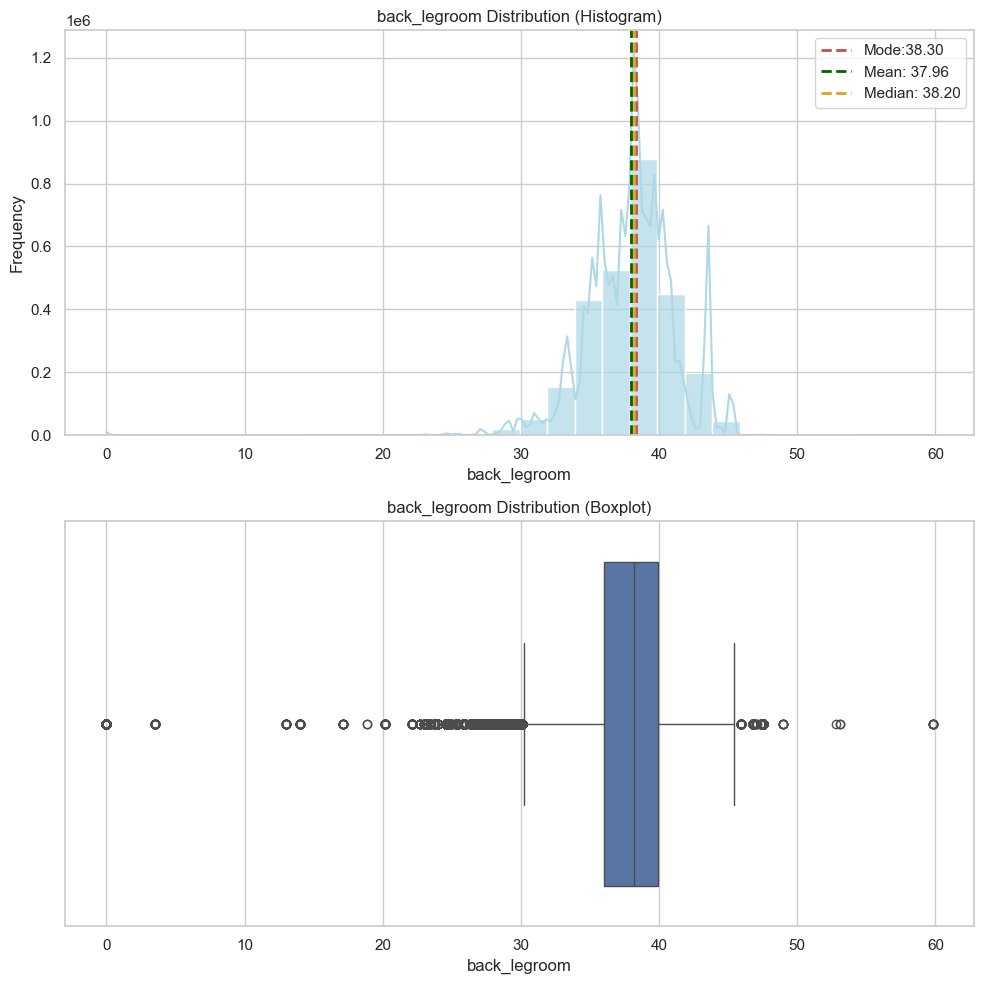

In [20]:
plot_distribution(cars_df, 'back_legroom')

The results show that most of the vehicles have a back legroom of ~38 inches. We can also see that there are a few outliers.   
Let's take a closer look at these outliers with zero back legroom. This could be because they are vehicles that do not have a back seat. Let's take a look at the body type of these vehicles, to see if this is the case

In [21]:
# checking for outliers in the back_legroom column
cars_df.loc[:,['body_type','maximum_seating']][cars_df['back_legroom'] < 10].value_counts()

body_type        maximum_seating
Pickup Truck     3 seats            1890
Sedan            5 seats              41
Pickup Truck     5 seats              35
SUV / Crossover  4 seats              15
                 2 seats               4
Minivan          2 seats               1
Name: count, dtype: int64

As expected, the outliers are the vehicles with no back seats and therefore no back legroom, such as a truck or a sedan. But there are also a few vehicles that have a back seat, but no back legroom. Let's take a look at these vehicles

In [22]:
# checking for outliers in the back_legroom column that are not pickup trucks
cars_df.loc[:,['body_type','maximum_seating','back_legroom','make_name',
               'model_name']][(cars_df['back_legroom'] < 10) & (
                   cars_df['body_type'] != 'Pickup Truck')]

,body_type,maximum_seating,back_legroom,make_name,model_name
vin,,,,,
1J4FA29123P319338,SUV / Crossover,4 seats,0.000,Jeep,Wrangler
JF1GE60669H503687,Sedan,5 seats,3.500,Subaru,Impreza
1J4FA29124P725315,SUV / Crossover,4 seats,0.000,Jeep,Wrangler
JF1GE60639H500844,Sedan,5 seats,3.500,Subaru,Impreza
WDDGF77X99F215188,Sedan,5 seats,0.000,Mercedes-Benz,C-Class
...,...,...,...,...,...
WDDGF77X99F326372,Sedan,5 seats,0.000,Mercedes-Benz,C-Class
JF1GE60649H521086,Sedan,5 seats,3.500,Subaru,Impreza
JF1GE60679H510177,Sedan,5 seats,3.500,Subaru,Impreza


It looks like these vehicles have a back seat, but the back legroom is not listed. This is because the back legroom is not a standard feature for these vehicles. We can fill in the null values with the average back legroom for the body type of the vehicle

In [23]:
# filling the null values with the mean value
cars_df['back_legroom'].fillna(cars_df['back_legroom'].mean(), inplace=True)

C:\Users\X1\AppData\Local\Temp\ipykernel_12900\3066570033.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df['back_legroom'].fillna(cars_df['back_legroom'].mean(), inplace=True)


In [24]:
count_percent_null(cars_df,'back_legroom')

Null values in 'back_legroom': 0.0%


#### body_type
- The body type is the type of body the vehicle has. This can be a sedan, SUV, truck, etc. This is a categorical variable and will need to be encoded.

In [25]:
column_null_info(cars_df,'body_type')

Null values in 'body_type': 0.45%

Value distribution:
body_type
SUV / Crossover   47.430
Sedan             24.850
Pickup Truck      15.890
Hatchback          2.960
Minivan            2.670
Coupe              2.400
Van                1.580
Wagon              1.360
Convertible        0.870
Name: proportion, dtype: float64


In [26]:
cars_df.loc[:,['body_type','make_name','model_name']][cars_df['body_type'].notnull()]

,body_type,make_name,model_name
vin,,,
ZACNJABB5KPJ92081,SUV / Crossover,Jeep,Renegade
SALCJ2FX1LH858117,SUV / Crossover,Land Rover,Discovery Sport
JF1VA2M67G9829723,Sedan,Subaru,WRX STI
SALRR2RV0L2433391,SUV / Crossover,Land Rover,Discovery
SALCJ2FXXLH862327,SUV / Crossover,Land Rover,Discovery Sport
...,...,...,...
2GNAXJEV0J6261526,SUV / Crossover,Chevrolet,Equinox
1GNERFKW0LJ225508,SUV / Crossover,Chevrolet,Traverse
3FA6P0HD3GR134062,Sedan,Ford,Fusion


In [27]:
cars_df.loc[:,['body_type','make_name','model_name']][cars_df['body_type'].isna()]

,body_type,make_name,model_name
vin,,,
5XXG14J28MG001288,NaN,Kia,K5
5XXG14J2XMG006458,NaN,Kia,K5
5XXG14J28MG006443,NaN,Kia,K5
5XXG14J22MG003974,NaN,Kia,K5
5XXG64J29MG017274,NaN,Kia,K5
...,...,...,...
3MVDMABL4MM201291,NaN,Mazda,CX-30
3MVDMBCL5MM202079,NaN,Mazda,CX-30
JA4AT4AA0KZ050139,NaN,Mitsubishi,Eclipse Cross


In [28]:
cars_df.loc[:,['body_type','make_name','model_name','year']][cars_df['model_name']=='Paseo']

,body_type,make_name,model_name,year
vin,,,,
JT5FC52H4V0036889,Convertible,Toyota,Paseo,1997
JT2EL45U8P0132295,Coupe,Toyota,Paseo,1993


Since some **body_types** already have associated **make_name** and **model_name** values, we can utilize the existing data to build a **mapping** dataset to populate the remaining null values for the corresponding vehicle type 
* Depending on the **year** of manufacture, version (trim), or distribution market, a model can be produced in many different body_type variations.

In [29]:
# create dictionary from current data 
mapping = cars_df.dropna(subset=['body_type']).groupby(['make_name', 'model_name','year'])['body_type'].agg(pd.Series.mode).to_dict()


verify with 'Paseo' model

In [30]:
model_to_find = 'Paseo'

# filter with model_name 
filtered = {k: v for k, v in mapping.items() if k[1] == model_to_find}

# print result filtered
for key, value in filtered.items():
    print(f"Make: {key[0]}, Model: {key[1]}, Body Type: {value}")

Make: Toyota, Model: Paseo, Body Type: Coupe
Make: Toyota, Model: Paseo, Body Type: Convertible


Now we can apply the mapping list to fill missing data on body_type

In [31]:

def infer_body_type(row):
    return mapping.get((row['make_name'], row['model_name'], row['year']), np.nan)

cars_df.loc[cars_df['body_type'].isna(), 'body_type'] = cars_df[cars_df['body_type'].isna()].apply(infer_body_type, axis=1)

In [32]:
column_null_info(cars_df,'body_type')

Null values in 'body_type': 0.05%

Value distribution:
body_type
SUV / Crossover   47.440
Sedan             24.890
Pickup Truck      15.860
Hatchback          2.950
Minivan            2.660
Coupe              2.390
Van                1.580
Wagon              1.350
Convertible        0.870
Name: proportion, dtype: float64


The missing data is reduced to 0.05%, so we can fill in the null values with the most common value.

In [33]:
fill_na_with_value(cars_df,'body_type','SUV / Crossover')

The amount of null values in the body_type column are 0.0%.


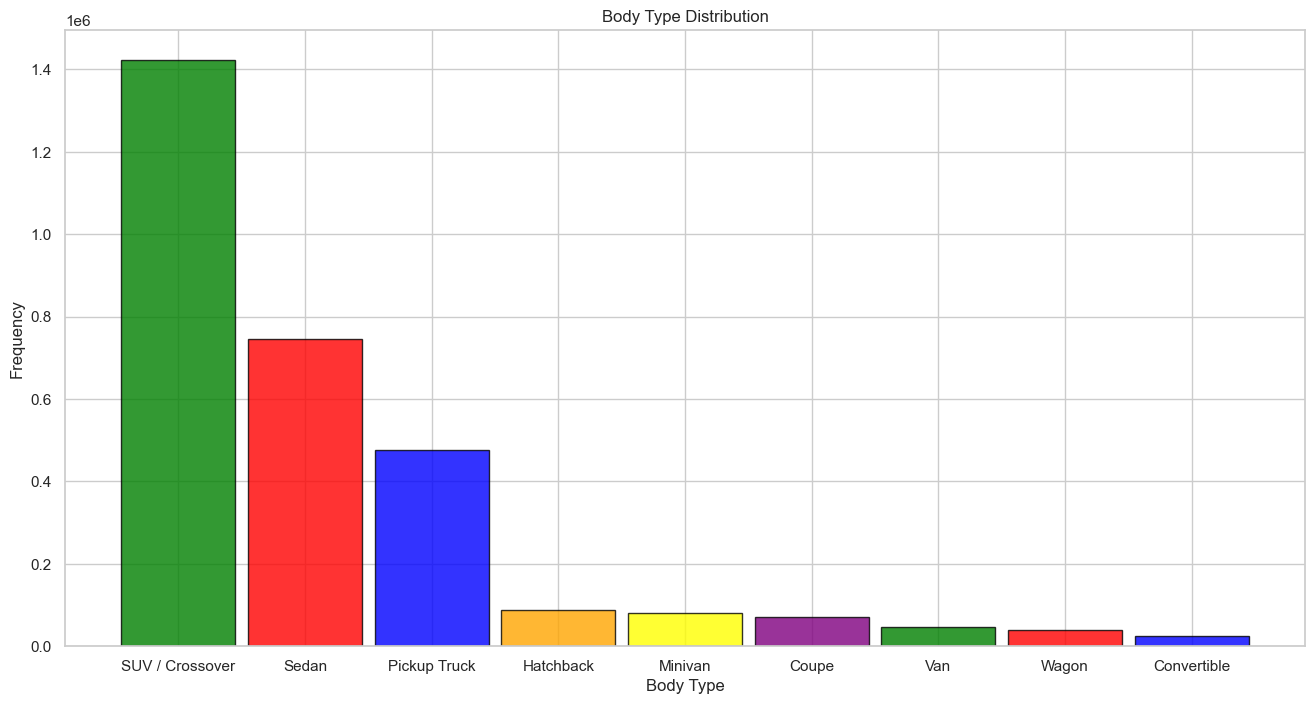

In [34]:
# Plotting the distribution of the body_type column
plt.figure(figsize=(16, 8))
plt.bar(cars_df['body_type'].value_counts().index, cars_df['body_type'].value_counts(), color=['green','red','blue','orange','yellow','purple'], alpha=0.8, width=0.9, edgecolor='black')
plt.title('Body Type Distribution')
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.show()

* The result show that the majority of vehicles are SUV / Crossover, followed by sedans, and pickup trucks.

#### city_fuel_economy
- The city fuel economy is the fuel economy in the city.

In [35]:
column_null_info(cars_df,'city_fuel_economy')

Null values in 'city_fuel_economy': 16.38%

Value distribution:
city_fuel_economy
19.000    7.930
18.000    7.650
22.000    6.970
21.000    6.810
20.000    6.750
           ... 
78.000    0.000
98.000    0.000
93.000    0.000
112.000   0.000
7.000     0.000
Name: proportion, Length: 100, dtype: float64


In [36]:
cars_df['city_fuel_economy'].value_counts()

city_fuel_economy
19.000     198957
18.000     191820
22.000     174752
21.000     170908
20.000     169252
            ...  
78.000          6
98.000          5
93.000          3
112.000         3
7.000           2
Name: count, Length: 100, dtype: int64

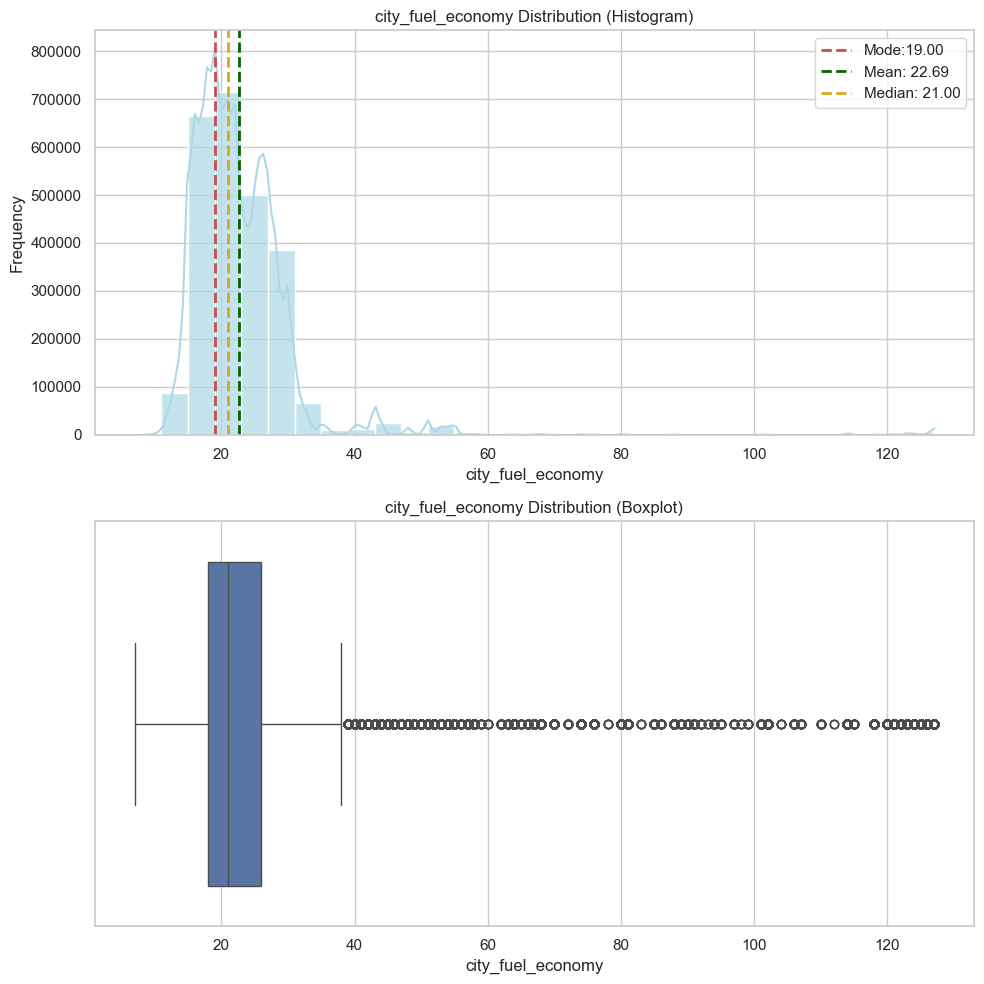

In [37]:
plot_distribution(cars_df, 'city_fuel_economy')

Looking at both charts, we observe:   
**Strong right-skewed distribution:** The distance from the median to outliers on the right is much greater than on the left.  
**Narrow IQR:** The box is quite concentrated, indicating that the central 50% of the data has closely clustered values.  
**Extreme outliers:** Some data points extend far beyond 100 MPG, likely representing high-performance electric/hybrid vehicles.   

In this case, the median is a better choice than the mean for replacing missing values because it is not influenced by extreme high values.

In [38]:
fill_na_with_median(cars_df, 'city_fuel_economy')

The amount of null values in the city_fuel_economy column are 0.0%.


In [39]:
column_null_info(cars_df, 'city_fuel_economy')

Null values in 'city_fuel_economy': 0.0%

Value distribution:
city_fuel_economy
21.000    22.070
19.000     6.630
18.000     6.390
22.000     5.830
20.000     5.640
           ...  
78.000     0.000
98.000     0.000
93.000     0.000
112.000    0.000
7.000      0.000
Name: proportion, Length: 100, dtype: float64


#### highway_fuel_economy - combine
- The highway fuel economy is the fuel economy of the vehicle on the highway.
- combine ['city_fuel_economy','highway_fuel_economy'] to 'combined_fuel_economy'

In [40]:
column_null_info(cars_df,'highway_fuel_economy')

Null values in 'highway_fuel_economy': 16.38%

Value distribution:
highway_fuel_economy
25.000    6.520
27.000    6.510
28.000    6.390
30.000    6.260
22.000    5.920
           ... 
10.000    0.000
91.000    0.000
83.000    0.000
56.000    0.000
120.000   0.000
Name: proportion, Length: 99, dtype: float64


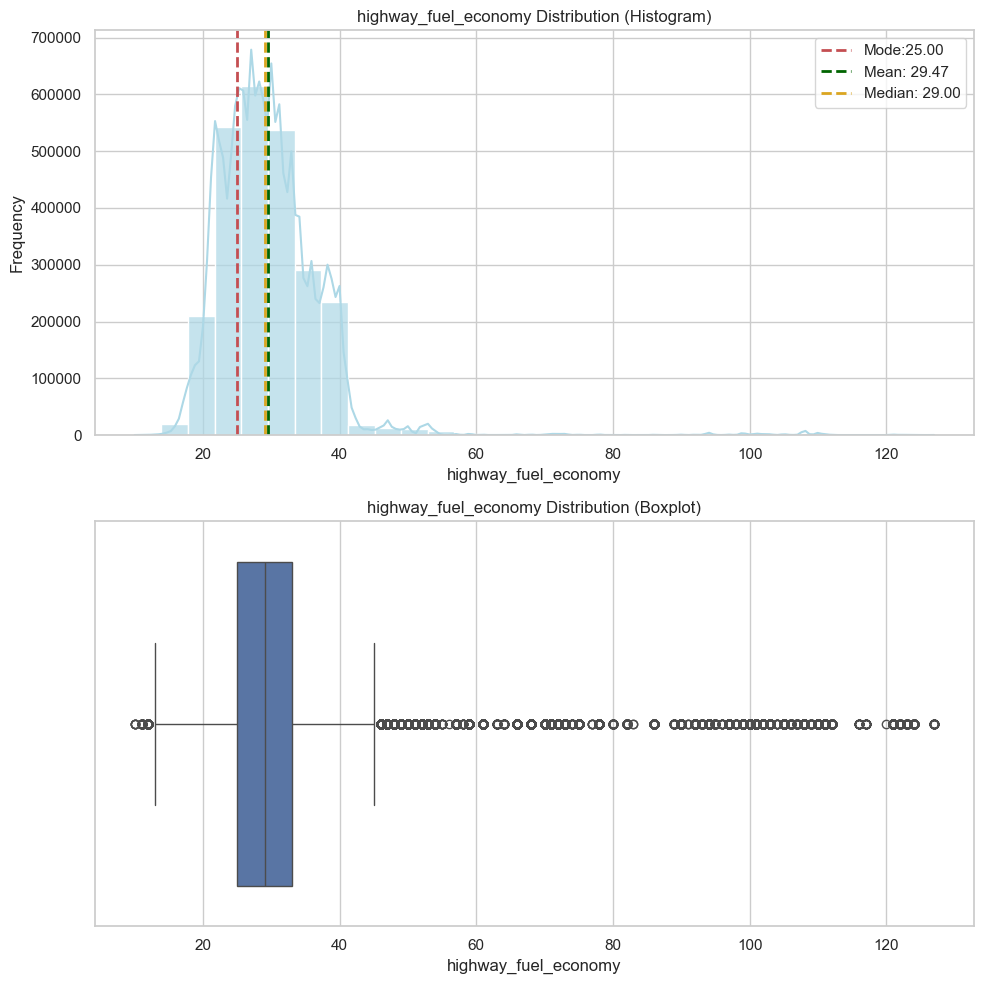

In [41]:
plot_distribution(cars_df,'highway_fuel_economy')

We observe that the **mean > median**, and the chart also shows that **the values are significantly right-skewed**. Therefore, we choose **the median** to replace null values to prevent **outliers** from affecting them.

In [42]:
fill_na_with_median(cars_df,'highway_fuel_economy')

The amount of null values in the highway_fuel_economy column are 0.0%.


Some vehicles may perform well in the city but poorly on highways, or vice versa. A combined metric allows for fairer comparisons across different vehicle types.  
Instead of analyzing two separate columns, one combined value simplifies analysis and visualization.  
So combining city fuel economy and highway fuel economy into a combined fuel economy column

In [43]:
# combining the city and highway fuel economy columns into a combined fuel economy column
cars_df['combined_fuel_economy'] = (cars_df['city_fuel_economy'] + cars_df['highway_fuel_economy'])/2 

# dropping the city and highway fuel economy columns
cars_df.drop(['city_fuel_economy','highway_fuel_economy'], axis=1, inplace=True)

# checking the head of the dataframe
cars_df.head()

,back_legroom,body_type,city,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,horsepower,interior_color,isCab,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,combined_fuel_economy
vin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,35.100,SUV / Crossover,Bayamon,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.000,I4,Solar Yellow,NaN,NaN,True,Jeep,41.200,12.700,Gasoline,NaN,66.500,177.000,Black,NaN,True,18.399,166.600,2019-04-06,YELLOW,237132766,-66.158,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.000,Renegade,"177 hp @ 5,750 RPM",23141.000,NaN,0,2.800,370599.000,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.200,79.600,2019,25.000
SALCJ2FX1LH858117,38.100,SUV / Crossover,San Juan,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.000,I4,Narvik Black,NaN,NaN,True,Land Rover,39.100,17.700,Gasoline,NaN,68.000,246.000,Black (Ebony),NaN,True,18.444,181.000,2020-02-15,BLACK,265946296,-66.079,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.000,Discovery Sport,"246 hp @ 5,500 RPM",46500.000,NaN,0,3.000,389227.000,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.900,85.600,2020,25.000
JF1VA2M67G9829723,35.400,Sedan,Guaynabo,1233,969,NaN,H4,2500.000,H4,NaN,False,False,True,FIAT,43.300,15.900,Gasoline,False,58.100,305.000,NaN,False,False,18.347,180.900,2017-04-25,UNKNOWN,173473508,-66.110,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,"305 hp @ 6,000 RPM",46995.000,False,0,NaN,370467.000,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.300,78.900,2016,20.000
SALRR2RV0L2433391,37.600,SUV / Crossover,San Juan,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.000,V6,Eiger Gray,NaN,NaN,True,Land Rover,39.000,23.500,Gasoline,NaN,73.000,340.000,Gray (Ebony/Ebony/Ebony),NaN,True,18.444,195.100,2020-02-26,GRAY,266911050,-66.079,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.000,Discovery,"340 hp @ 6,500 RPM",67430.000,NaN,0,3.000,389227.000,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115.000,87.400,2020,25.000
SALCJ2FXXLH862327,38.100,SUV / Crossover,San Juan,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.000,I4,Narvik Black,NaN,NaN,True,Land Rover,39.100,17.700,Gasoline,NaN,68.000,246.000,Black (Ebony),NaN,True,18.444,181.000,2020-04-25,BLACK,270957414,-66.079,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.000,Discovery Sport,"246 hp @ 5,500 RPM",48880.000,NaN,0,3.000,389227.000,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.900,85.600,2020,25.000


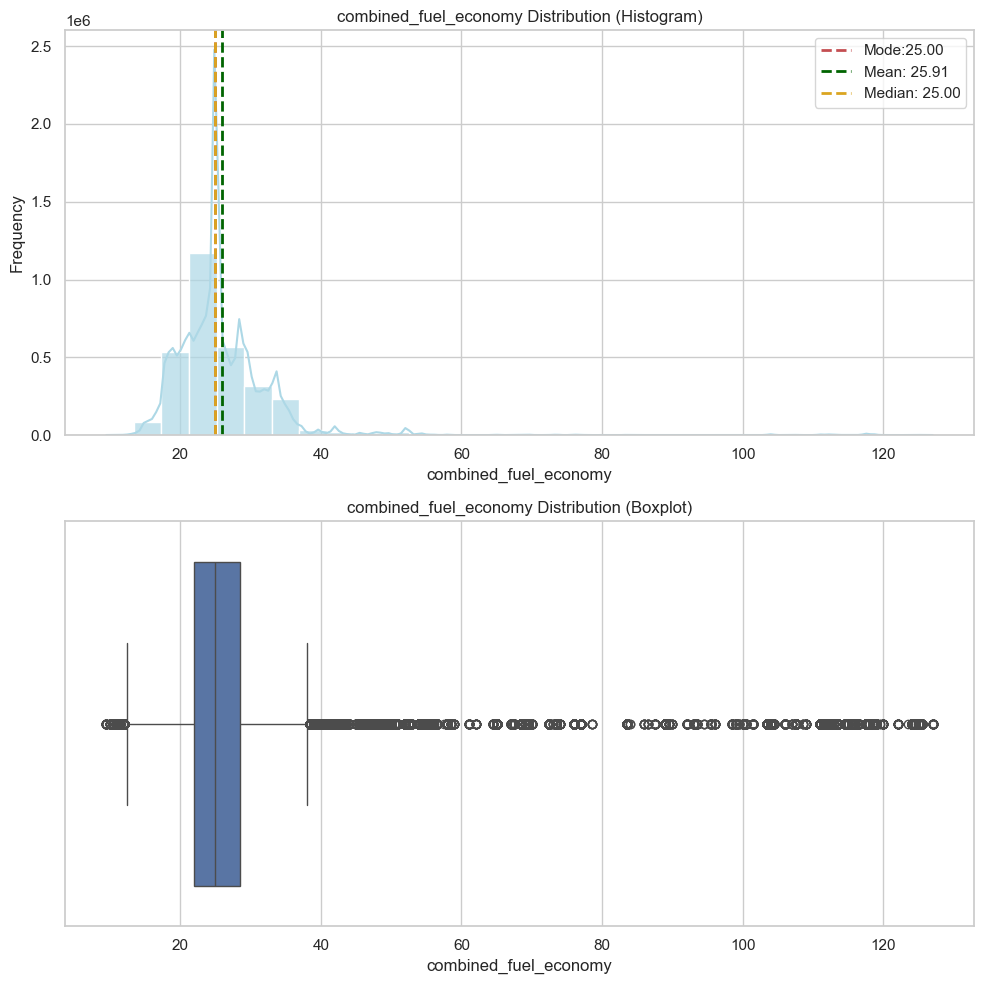

In [44]:
plot_distribution(cars_df,'combined_fuel_economy')

The results show that the majority of vehicles have a fuel economy of 25.00 miles per gallon. This is expected because most vehicles are fuel efficient.

#### description - drop at the end
The description is the sales description of the vehicle.

In [45]:
column_null_info(cars_df,'description')

Null values in 'description': 2.6%

Value distribution:
description
[!@@Additional Info@@!]Front Wheel Drive,Power Steering,ABS,4-Wheel Disc Brakes,Brake Assist,Wheel Covers,Steel Wheels,Tires - Front Performance,Tires - Rear Performance,Temporary Spare Tire,Power Mirror(s),Rear Defrost,Intermittent Wipers,Daytime Running Lights,Automatic Headlights,AM/FM Stereo,MP3 Player,Steering Wheel Audio Controls,Bluetooth Connection,Auxiliary Audio Input,Bucket Seats,Rear Bench Seat,Adjustable Steering Wheel,Trip Computer,Power Windows,Keyless Entry,Power Door Locks,Cruise Control,Adaptive Cruise Control,Climate Control,A/C,Cloth Seats,Driver Vanity Mirror,Passenger Vanity Mirror,Floor Mats,Power Windows,Power Door Locks,Trip Computer,Security System,Engine Immobilizer,Traction Control,Stability Control,Traction Control,Front Side Air Bag,Lane Departure Warning,Lane Keeping Assist,Lane Departure Warning,Tire Pressure Monitor,Driver Air Bag,Passenger Air Bag,Front Head Air Bag,Rear Head Air Bag,P

In [46]:
cars_df['description'].sample(5)

vin
1FTEW1E52LFA10335    NAV, Heated Seats, 4x4, Tow Hitch, VELOCITY BL...
1C6RR7LT3JS218863    2018 Ram 1500 Big Horn 4WD Gray , Granite 8-Sp...
2GKFLZE33F6157521    2015 GMC Terrain DENALI AWD -89,000 Miles -All...
KNMAT2MV2GP647692    ***AWD**APPEARANCE PACKAGE**HANDS FREE BLUETOO...
1FMCU0G66LUB95509    Heated Seats, Alloy Wheels, Back-Up Camera, Tu...
Name: description, dtype: object

The **description** contains some sales information and metrics from existing columns, but it may be a reliable data source to address missing values ​​in other columns, which are not yet processed.

In [47]:
# Dropping the description column
#cars_df.drop('description', axis=1, inplace=True)

#### engine_cylinders - drop  
The engine cyclinders is the number of cylinders in engine.

In [48]:
column_null_info(cars_df,'engine_cylinders')

Null values in 'engine_cylinders': 3.35%

Value distribution:
engine_cylinders
I4                          48.920
V6                          25.420
V8                           9.650
V8 Flex Fuel Vehicle         2.700
I4 Hybrid                    2.510
V6 Flex Fuel Vehicle         2.360
H4                           2.270
I3                           1.870
I6                           0.980
I6 Diesel                    0.810
V8 Biodiesel                 0.760
I4 Flex Fuel Vehicle         0.320
I4 Diesel                    0.250
V6 Diesel                    0.230
V8 Diesel                    0.220
I5                           0.180
H6                           0.160
V6 Biodiesel                 0.120
V6 Hybrid                    0.110
V12                          0.050
V10                          0.040
I2                           0.030
W12                          0.020
V8 Hybrid                    0.000
W12 Flex Fuel Vehicle        0.000
I5 Biodiesel                 0.000
V8 Compress

In [49]:
cars_df[['engine_cylinders', 'engine_type']]

,engine_cylinders,engine_type
vin,,
ZACNJABB5KPJ92081,I4,I4
SALCJ2FX1LH858117,I4,I4
JF1VA2M67G9829723,H4,H4
SALRR2RV0L2433391,V6,V6
SALCJ2FXXLH862327,I4,I4
...,...,...
2GNAXJEV0J6261526,I4,I4
1GNERFKW0LJ225508,V6,V6
3FA6P0HD3GR134062,NaN,NaN


Looking at the values of the **engine_cylinders** and **engine_type** columns, we see no significant differences between them. Therefore, we can remove the **engine_cylinders** column.

In [50]:
# dropping the column
cars_df = cars_df.drop(['engine_cylinders'], axis=1)

#### engine_displacement - drop

The engine displacement is the displacement of the engine. This is a measurement of the engine size, which represents the volume of the engine. Many factors affect the displacement of an engine, including the number of cylinders, the size of the cylinders, and the stroke of the pistons. But because this is better represented in the horsepower column, we can drop this column.

In [51]:
cars_df = cars_df.drop(['engine_displacement'], axis=1)

#### exterior_color
- The exterior color is the color of the exterior of the vehicle.

In [52]:
column_null_info(cars_df,'exterior_color')

Null values in 'exterior_color': 1.67%

Value distribution:
exterior_color
Black                 5.510
White                 4.290
Summit White          3.270
Silver                2.670
Gray                  2.630
                       ... 
08w6 Parisian Night   0.000
Colorado Red  Paint   0.000
02QZ                  0.000
ARMYG                 0.000
Cosmic                0.000
Name: proportion, Length: 28664, dtype: float64


C:\Users\X1\AppData\Local\Temp\ipykernel_12900\1344808893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_counts.index[:20], y=color_counts.values[:20], palette="viridis")  # Top 20 colors


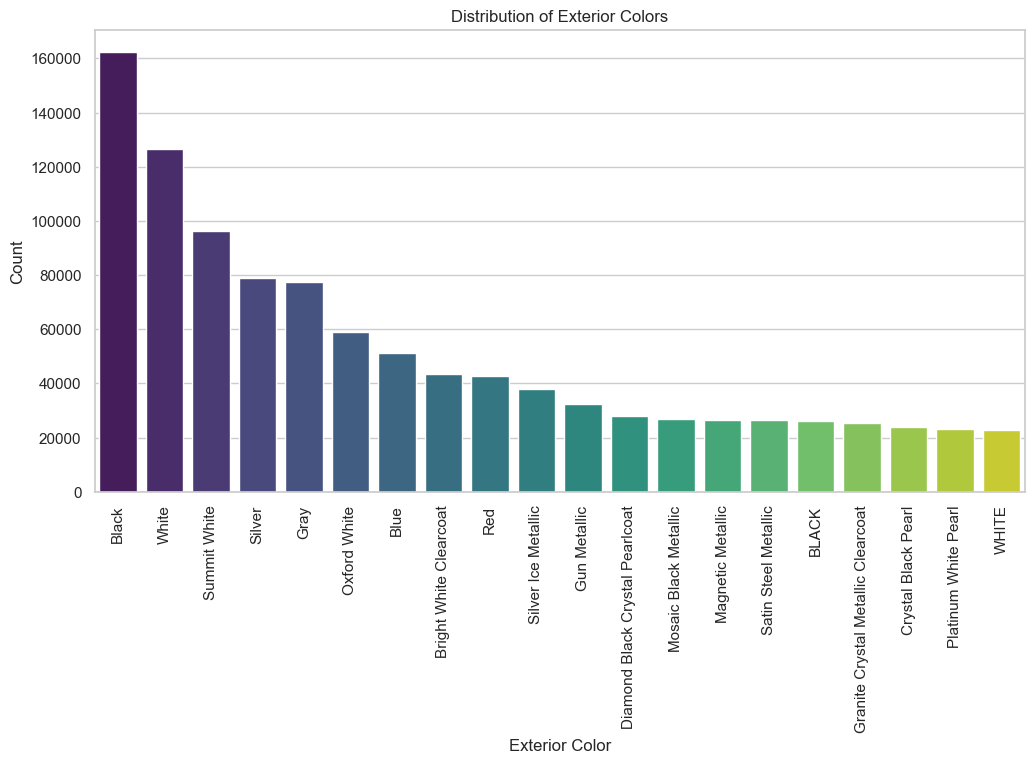

In [53]:
plt.figure(figsize=(12, 6))
color_counts = cars_df['exterior_color'].value_counts()
sns.barplot(x=color_counts.index[:20], y=color_counts.values[:20], palette="viridis")  # Top 20 colors
plt.xticks(rotation=90)
plt.xlabel("Exterior Color")
plt.ylabel("Count")
plt.title("Distribution of Exterior Colors")
plt.show()


In [54]:
# replacing null values with Black.
cars_df['exterior_color'] = cars_df['exterior_color'].fillna("Black")
column_null_info(cars_df,'exterior_color')

Null values in 'exterior_color': 0.0%

Value distribution:
exterior_color
Black                 7.080
White                 4.220
Summit White          3.210
Silver                2.630
Gray                  2.590
                       ... 
08w6 Parisian Night   0.000
Colorado Red  Paint   0.000
02QZ                  0.000
ARMYG                 0.000
Cosmic                0.000
Name: proportion, Length: 28664, dtype: float64


According to GermainCars.com, America's most common exterior colors in 2022 are ranked as follows:   

1.White  
2.Black  
3.Gray  
4.Silver  
5.Red  
6.Blue  
7.Brown  
8.Green  
9.Beige  
10.Orange  
11.Gold  
12.Yellow  
13.Purple  

In [55]:
# making a list of the top exterior colors
colors = ['White', 'Black', 'Gray', 'Silver',
          'Red', 'Blue', 'Brown', 'Green', 'Beige',
          'Orange', 'Gold', 'Yellow', 'Purple']

# extracting the top exterior colors from the exterior_color column
cars_df['exterior_color'] = cars_df['exterior_color'].str.findall('|'.join(colors)).apply(set).str.join(', ')

In [56]:
cars_df['exterior_color'].value_counts()/cars_df.shape[0]*100


exterior_color
                    22.946
White               21.117
Black               19.628
Silver              11.441
Blue                 7.799
                     ...  
Silver, Orange       0.000
Brown, Blue          0.000
Yellow, Gray         0.000
Purple, Blue         0.000
White, Gold, Blue    0.000
Name: count, Length: 84, dtype: float64

In [57]:
# replacing null values with 'Other Color'.
cars_df['exterior_color'] = cars_df['exterior_color'].replace("", "Other Color")

# masking rows with more than one color
mask = cars_df['exterior_color'].map(cars_df['exterior_color'].value_counts()) < 4424

# labeling the rows with more than one color as 'Mixed Colors'
cars_df['exterior_color'] =  cars_df['exterior_color'].mask(mask, 'Mixed Colors')

# checking the new unique values in the exterior_color_new column
cars_df['exterior_color'].value_counts()/cars_df.shape[0]*100

exterior_color
Other Color    22.946
White          21.117
Black          19.628
Silver         11.441
Blue            7.799
Red             7.445
Gray            7.227
Green           0.683
Mixed Colors    0.407
Brown           0.368
Orange          0.351
Gold            0.290
Beige           0.149
Yellow          0.147
Name: count, dtype: float64

#### fleet - drop
- The fleet represents whether the vehicle is a fleet vehicle or not. This is a categorical variable and will need to be encoded.
- drop ['fleet', 'frame_damaged', 'isCab', 'salvage', 'theft_title']

In [58]:
column_null_info(cars_df,'fleet')

Null values in 'fleet': 47.55%

Value distribution:
fleet
False   78.710
True    21.290
Name: proportion, dtype: float64


In [59]:
# checking how many null values are in the dataframe that are over 0%
percentage = cars_df.isna().sum()/cars_df.shape[0]*100

# checking the columns with null values
nulls = percentage[percentage > 0]

# putting the results in a dataframe
pd.DataFrame(nulls)

,0
description,2.597
engine_type,3.353
fleet,47.553
frame_damaged,47.553
franchise_make,19.087
front_legroom,5.848
fuel_tank_volume,5.356
fuel_type,2.757
has_accidents,47.553
height,5.324


In [60]:
pd.DataFrame(percentage[percentage.between(40, 50)])

,0
fleet,47.553
frame_damaged,47.553
has_accidents,47.553
isCab,47.553
salvage,47.553
theft_title,47.553


In [61]:
value_counts = cars_df[['fleet', 'frame_damaged', 'has_accidents', 'isCab', 'salvage', 'theft_title']].apply(
    lambda x: " (" + x.value_counts(normalize=True, dropna=False).mul(100).round(2).astype(str) + "%)"
)
print(value_counts)

           fleet frame_damaged has_accidents      isCab    salvage theft_title
False   (41.28%)      (51.95%)      (44.35%)   (42.88%)    (52.1%)    (52.27%)
True    (11.16%)        (0.5%)        (8.1%)    (9.56%)    (0.35%)     (0.18%)
NaN     (47.55%)      (47.55%)      (47.55%)   (47.55%)   (47.55%)    (47.55%)


 Columns related to accidents, damages, and previous usage

**fleet** (Whether the vehicle was part of a fleet/taxi service)

**frame_damaged** (Indicates if the vehicle frame is damaged)

**has_accidents** (Indicates if the car has been in an accident)

**salvage** (Indicates if the car was deemed a total loss)

**theft_title** (Indicates if the car was reported stolen)

Since **isCab** indicates whether the vehicle was used as a taxi, it should be grouped with Vehicle History & Condition, as taxi vehicles generally have higher mileage, more wear and tear, and a greater likelihood of mechanical issues or accidents.

We should keep the **'has_accidents'** column because:  

1. **It has the clearest meaning** : regarding whether the car has been in an accident or not.  
2. **The True rate (8.1%) is reasonable**: not too low like 'frame_damaged' (0.5%) or 'theft_title' (0.18%).  
3. **'fleet' and 'isCab' do not reflect the car's condition** :they describe the vehicle type instead.  

This makes **'has_accidents'** the most logical choice for assessing a car’s accident history.

In [62]:
# dropping the columns
cars_df = cars_df.drop(['fleet', 'frame_damaged', 'isCab', 'salvage', 'theft_title'], axis=1)

Now let fill in the null values with the most common value.

In [63]:
# filling the null values with "False" and renaming the column to "has_incidents"
cars_df['has_accidents'] = cars_df['has_accidents'].fillna("False")

# checking the result
cars_df['has_accidents'].isna().sum()/cars_df.shape[0]*100

# renaming the column to "has_incidents"
cars_df.rename(columns={'has_accidents': 'has_incidents'}, inplace=True)

# checking the result
cars_df.head()

,back_legroom,body_type,city,daysonmarket,dealer_zip,description,engine_type,exterior_color,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_incidents,height,horsepower,interior_color,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,power,price,savings_amount,seller_rating,sp_id,sp_name,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,combined_fuel_economy
vin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,35.100,SUV / Crossover,Bayamon,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,Yellow,True,Jeep,41.200,12.700,Gasoline,False,66.500,177.000,Black,True,18.399,166.600,2019-04-06,YELLOW,237132766,-66.158,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.000,Renegade,"177 hp @ 5,750 RPM",23141.000,0,2.800,370599.000,Flagship Chrysler,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.200,79.600,2019,25.000
SALCJ2FX1LH858117,38.100,SUV / Crossover,San Juan,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,Black,True,Land Rover,39.100,17.700,Gasoline,False,68.000,246.000,Black (Ebony),True,18.444,181.000,2020-02-15,BLACK,265946296,-66.079,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.000,Discovery Sport,"246 hp @ 5,500 RPM",46500.000,0,3.000,389227.000,Land Rover San Juan,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.900,85.600,2020,25.000
JF1VA2M67G9829723,35.400,Sedan,Guaynabo,1233,969,NaN,H4,Black,True,FIAT,43.300,15.900,Gasoline,False,58.100,305.000,NaN,False,18.347,180.900,2017-04-25,UNKNOWN,173473508,-66.110,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,"305 hp @ 6,000 RPM",46995.000,0,NaN,370467.000,FIAT de San Juan,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.300,78.900,2016,20.000
SALRR2RV0L2433391,37.600,SUV / Crossover,San Juan,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,Gray,True,Land Rover,39.000,23.500,Gasoline,False,73.000,340.000,Gray (Ebony/Ebony/Ebony),True,18.444,195.100,2020-02-26,GRAY,266911050,-66.079,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.000,Discovery,"340 hp @ 6,500 RPM",67430.000,0,3.000,389227.000,Land Rover San Juan,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115.000,87.400,2020,25.000
SALCJ2FXXLH862327,38.100,SUV / Crossover,San Juan,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,Black,True,Land Rover,39.100,17.700,Gasoline,False,68.000,246.000,Black (Ebony),True,18.444,181.000,2020-04-25,BLACK,270957414,-66.079,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.000,Discovery Sport,"246 hp @ 5,500 RPM",48880.000,0,3.000,389227.000,Land Rover San Juan,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.900,85.600,2020,25.000


#### franchise_make - drop
- The franchise make is the company that owns the franchise of the vehicle.

In [64]:
column_null_info(cars_df, 'franchise_make')

Null values in 'franchise_make': 19.09%

Value distribution:
franchise_make
Ford            16.290
Chevrolet       13.960
Toyota           7.690
Honda            7.600
Jeep             7.300
Nissan           6.290
Hyundai          4.410
Kia              3.820
RAM              3.180
Buick            3.070
Volkswagen       2.570
Subaru           2.510
GMC              2.500
Dodge            2.030
Mercedes-Benz    1.890
Mazda            1.880
BMW              1.880
Cadillac         1.450
Lexus            1.180
Audi             1.110
Acura            1.080
Lincoln          1.050
Mitsubishi       0.830
Chrysler         0.810
Volvo            0.800
INFINITI         0.770
Land Rover       0.520
Porsche          0.450
MINI             0.220
Jaguar           0.200
FIAT             0.170
Scion            0.160
Maserati         0.110
Alfa Romeo       0.060
Genesis          0.050
Bentley          0.020
Rolls-Royce      0.020
Aston Martin     0.020
Ferrari          0.020
Lotus            0.020
McLa

In [65]:
cars_df[['franchise_make', 'make_name']]

,franchise_make,make_name
vin,,
ZACNJABB5KPJ92081,Jeep,Jeep
SALCJ2FX1LH858117,Land Rover,Land Rover
JF1VA2M67G9829723,FIAT,Subaru
SALRR2RV0L2433391,Land Rover,Land Rover
SALCJ2FXXLH862327,Land Rover,Land Rover
...,...,...
2GNAXJEV0J6261526,NaN,Chevrolet
1GNERFKW0LJ225508,Chevrolet,Chevrolet
3FA6P0HD3GR134062,Jeep,Ford


Based on the data, the franchise_make column contains values similar to make_name, but make_name has more detailed categories. Therefore, we can remove franchise_make.

In [66]:
# dropping the column
cars_df = cars_df.drop(['franchise_make'], axis=1)

#### front_legroom - combine
- The front legroom is the amount of space available in the front of the vehicle.
- combine ['front_legroom', 'back_legroom'] to 'legroom'

In [67]:
column_null_info(cars_df,'front_legroom')

Null values in 'front_legroom': 5.85%

Value distribution:
front_legroom
40.900   8.130
43.900   5.340
41.300   5.120
41.000   5.110
41.200   4.580
          ... 
33.500   0.000
54.400   0.000
38.300   0.000
39.200   0.000
61.400   0.000
Name: proportion, Length: 100, dtype: float64


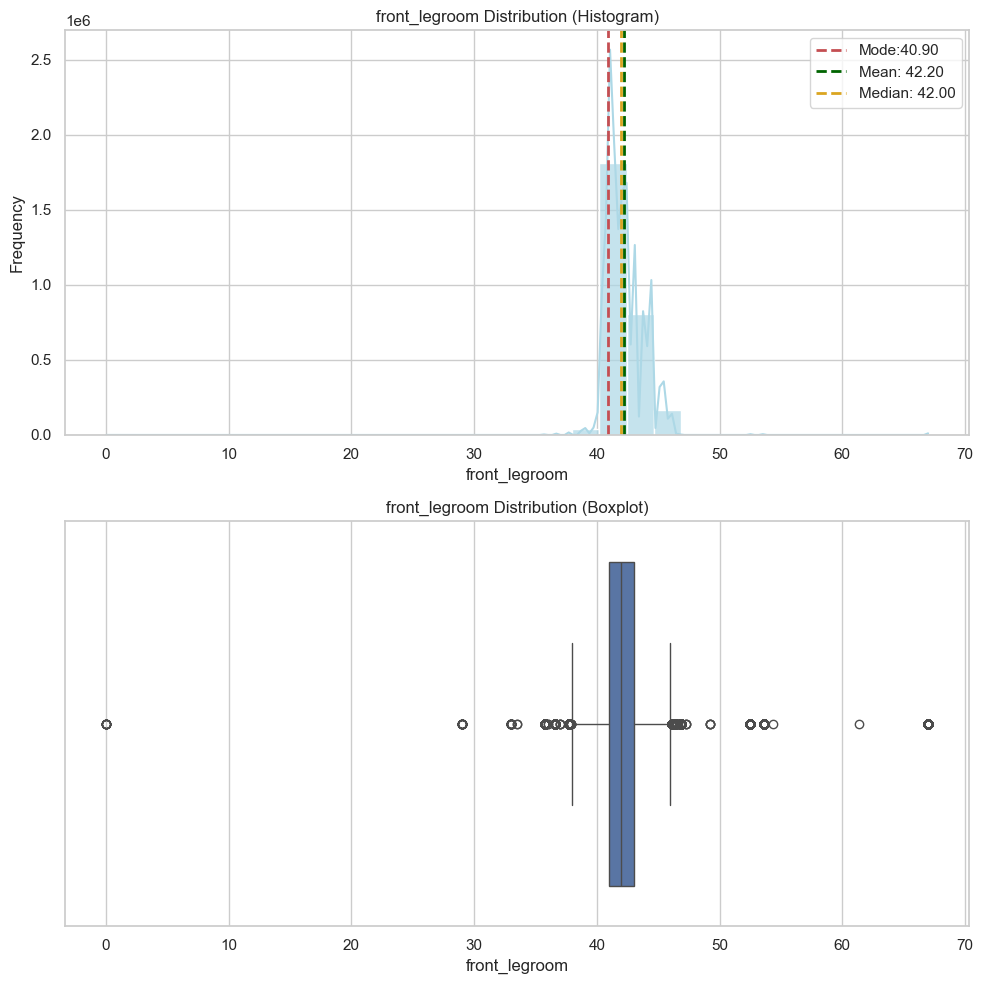

In [68]:
plot_distribution(cars_df,'front_legroom')

It looks like the front legroom has a standard measurement range of approximately 40 to 45 inches.

In this case, we can fill in the null values with the mean value.

In [69]:
fill_na_with_mean(cars_df,'front_legroom')

The amount of null values in the front_legroom column are 0.0%.


Next, Lets combine the front legroom columns to create a new column that will be more useful for our analysis. This will help reduce the amount of redundant information in the dataset, while also providing more information

In [70]:
# combining the front_legroom and back_legroom columns
cars_df['legroom'] = cars_df['front_legroom'] + cars_df['back_legroom']

# dropping the front_legroom and back_legroom columns
cars_df = cars_df.drop(['front_legroom', 'back_legroom'], axis=1)

# checking the results
cars_df.head()

,body_type,city,daysonmarket,dealer_zip,description,engine_type,exterior_color,franchise_dealer,fuel_tank_volume,fuel_type,has_incidents,height,horsepower,interior_color,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,power,price,savings_amount,seller_rating,sp_id,sp_name,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,combined_fuel_economy,legroom
vin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,SUV / Crossover,Bayamon,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,Yellow,True,12.700,Gasoline,False,66.500,177.000,Black,True,18.399,166.600,2019-04-06,YELLOW,237132766,-66.158,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.000,Renegade,"177 hp @ 5,750 RPM",23141.000,0,2.800,370599.000,Flagship Chrysler,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.200,79.600,2019,25.000,76.300
SALCJ2FX1LH858117,SUV / Crossover,San Juan,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,Black,True,17.700,Gasoline,False,68.000,246.000,Black (Ebony),True,18.444,181.000,2020-02-15,BLACK,265946296,-66.079,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.000,Discovery Sport,"246 hp @ 5,500 RPM",46500.000,0,3.000,389227.000,Land Rover San Juan,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.900,85.600,2020,25.000,77.200
JF1VA2M67G9829723,Sedan,Guaynabo,1233,969,NaN,H4,Black,True,15.900,Gasoline,False,58.100,305.000,NaN,False,18.347,180.900,2017-04-25,UNKNOWN,173473508,-66.110,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,"305 hp @ 6,000 RPM",46995.000,0,NaN,370467.000,FIAT de San Juan,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.300,78.900,2016,20.000,78.700
SALRR2RV0L2433391,SUV / Crossover,San Juan,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,Gray,True,23.500,Gasoline,False,73.000,340.000,Gray (Ebony/Ebony/Ebony),True,18.444,195.100,2020-02-26,GRAY,266911050,-66.079,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.000,Discovery,"340 hp @ 6,500 RPM",67430.000,0,3.000,389227.000,Land Rover San Juan,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115.000,87.400,2020,25.000,76.600
SALCJ2FXXLH862327,SUV / Crossover,San Juan,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,Black,True,17.700,Gasoline,False,68.000,246.000,Black (Ebony),True,18.444,181.000,2020-04-25,BLACK,270957414,-66.079,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.000,Discovery Sport,"246 hp @ 5,500 RPM",48880.000,0,3.000,389227.000,Land Rover San Juan,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.900,85.600,2020,25.000,77.200


#### **fuel_type**
- The fuel type is the type of fuel the vehicle uses.

In [71]:
column_null_info(cars_df,'fuel_type')

Null values in 'fuel_type': 2.76%

Value distribution:
fuel_type
Gasoline                 89.070
Flex Fuel Vehicle         5.350
Hybrid                    2.610
Diesel                    1.520
Biodiesel                 0.890
Electric                  0.560
Compressed Natural Gas    0.010
Propane                   0.000
Name: proportion, dtype: float64


In [72]:
column_null_info(cars_df,'engine_type')

Null values in 'engine_type': 3.35%

Value distribution:
engine_type
I4                          48.920
V6                          25.420
V8                           9.650
V8 Flex Fuel Vehicle         2.700
I4 Hybrid                    2.510
V6 Flex Fuel Vehicle         2.360
H4                           2.270
I3                           1.870
I6                           0.980
I6 Diesel                    0.810
V8 Biodiesel                 0.760
I4 Flex Fuel Vehicle         0.320
I4 Diesel                    0.250
V6 Diesel                    0.230
V8 Diesel                    0.220
I5                           0.180
H6                           0.160
V6 Biodiesel                 0.120
V6 Hybrid                    0.110
V12                          0.050
V10                          0.040
I2                           0.030
W12                          0.020
V8 Hybrid                    0.000
W12 Flex Fuel Vehicle        0.000
I5 Biodiesel                 0.000
V8 Compressed Natural

In [73]:
fuel_type_nulls = cars_df[cars_df['fuel_type'].isna()]

In [74]:
cars_df['fuel_type'].unique()

array(['Gasoline', 'Diesel', nan, 'Biodiesel', 'Flex Fuel Vehicle',
       'Electric', 'Hybrid', 'Compressed Natural Gas', 'Propane'],
      dtype=object)

We will build a keyword filter for the description, if they appear corresponding to each fuel type, we will take it as the fuel type for the corresponding missing data

In [75]:
import re
import pandas as pd
import numpy as np

def find_fuel_type_keyword(description):
    desc = str(description).lower()
    
    # check description is null => return nan
    if pd.isna(description) or desc.strip() == '':
        return np.nan
    
    # keyword 
    fuel_rules = [
        # Diesel
        (r'\b(diesel|turbo\s*diesel|duramax|tdi)\b', 'Diesel'),
        # Biodiesel
        (r'\bbiodiesel\b', 'Biodiesel'),
        # Flex Fuel
        (r'\b(flex\s*fuel|ffv|e85)\b', 'Flex Fuel Vehicle'),
        # Hybrid
        (r'\b(hybrid|phev)\b', 'Hybrid'),
        # Electric (extra word: battery, ev...)
        (r'\b(electric\s*vehicle|ev|battery\s*electric|all\s*electric)\b', 'Electric'),
        # Compressed Natural Gas (CNG)
        (r'\b(cng|compressed\s*natural\s*gas)\b', 'Compressed Natural Gas'),
        # Propane
        (r'\bpropane\b', 'Propane'),
        # Gasoline (extra word: petrol, gas, gdi..)
        (r'\b(gasoline|petrol|gas|gdi)\b', 'Gasoline'),
        # fuel come with engine(V6, V8, 24v) maybe Gasoline if not match any word
        (r'\d\.\d[lL]\s*(v6|v8|24v|vvti?|gdi)(?!\s*(diesel|hybrid|electric))', 'Gasoline')
    ]
    
    # loop every rules
    for pattern, fuel_type in fuel_rules:
        if re.search(pattern, desc):
            return fuel_type
    
    # no any matching => NaN
    return np.nan

Run the filter and insert the results into a temporary column to continue testing for accuracy.

In [76]:

cars_df['fuel_type_temp'] = cars_df['fuel_type'].copy()

null_mask = cars_df['fuel_type_temp'].isna()
cars_df.loc[null_mask, 'fuel_type_temp'] = cars_df.loc[null_mask, 'description'].apply(find_fuel_type_keyword)
column_null_info(cars_df,'fuel_type_temp')

#print table to compare data
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',10)
cars_df.loc[(cars_df['fuel_type'].isna() ), ['description','fuel_type','fuel_type_temp']].sample(10)    


Null values in 'fuel_type_temp': 1.77%

Value distribution:
fuel_type_temp
Gasoline                 88.860
Flex Fuel Vehicle         5.340
Hybrid                    2.620
Diesel                    1.740
Biodiesel                 0.880
Electric                  0.560
Compressed Natural Gas    0.010
Propane                   0.000
Name: proportion, dtype: float64


description  \
vin                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [77]:
cars_df['fuel_type'] = cars_df['fuel_type_temp']
cars_df = cars_df.drop(['fuel_type_temp'], axis=1) # drop after copy to fuel_type

In [78]:
count_percent_null(cars_df,'fuel_type')

Null values in 'fuel_type': 1.77%


We have gone through several data filtering steps to extract values for fuel_type. The current number of null values has significantly decreased. The remaining null values have very little basis for imputation, so we have decided to fill them with the most frequent value, 'Gasoline'."

In [79]:
# filling the null values with "Gasoline".
cars_df.loc[cars_df['fuel_type'].isnull(), 'fuel_type'] = "Gasoline"

In [80]:
count_percent_null(cars_df,'fuel_type')

Null values in 'fuel_type': 0.0%


#### **fuel_tank_volume**
The tank volume is the volume of the fuel tank. This is a measurement of the fuel tank size, which is measured in gallons.

In [81]:
column_null_info(cars_df,'fuel_tank_volume')

Null values in 'fuel_tank_volume': 5.36%

Value distribution:
fuel_tank_volume
26.000   7.140
13.200   5.740
18.500   5.100
14.000   4.890
14.500   3.510
          ... 
25.500   0.000
25.200   0.000
40.700   0.000
23.100   0.000
26.300   0.000
Name: proportion, Length: 181, dtype: float64


In [82]:
# Filtering the rows that the fuel_type column is "Electric", with the fuel_tank_volume column.
cars_df.loc[(cars_df['fuel_type'] == "Electric"), ['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
vin,,
KNDJP3AE3H7024713,NaN,Electric
KNDCC3LG4K5009935,NaN,Electric
1G1FZ6S05L4121127,NaN,Electric
1G1FZ6S06L4123999,NaN,Electric
KMHC75LH4HU008626,NaN,Electric
...,...,...
1G1FW6S07H4129990,NaN,Electric
1G1FX6S07H4156779,NaN,Electric
1G1FX6S00H4145672,NaN,Electric


As expected, the fuel tank volume of the electric vehicles is null. We can fill the null values with 0.  
Lets first full the null values with 0 on the electric vehicles only.

In [83]:
cars_df.loc[(cars_df['fuel_type'] == "Electric"), 'fuel_tank_volume'] = 0

# checking the result
result = cars_df['fuel_tank_volume'].isna().sum()/cars_df.shape[0]*100

print(f"The amount of null values in the fuel_tank_volume column are {result.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 4.81%.


In [84]:
cars_df[cars_df['fuel_tank_volume'] == 0][['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
vin,,
KNDJP3AE3H7024713,0.000,Electric
KNDCC3LG4K5009935,0.000,Electric
1G1FZ6S05L4121127,0.000,Electric
1G1FZ6S06L4123999,0.000,Electric
KMHC75LH4HU008626,0.000,Electric
...,...,...
1G1FW6S07H4129990,0.000,Electric
1G1FX6S07H4156779,0.000,Electric
1G1FX6S00H4145672,0.000,Electric


In [85]:
cars_df[cars_df['fuel_tank_volume'].isna()][['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
vin,,
4S3GTAA67J3747545,NaN,Gasoline
WDDGF8BBXCR195380,NaN,Gasoline
3VW447AU9JM257055,NaN,Gasoline
1J4GR48K25C565853,NaN,Gasoline
1GTGG25VX51224016,NaN,Gasoline
...,...,...
1FTEW1P45LKD12200,NaN,Gasoline
1FTFW1ET8CFB42101,NaN,Gasoline
1FTEW1EG7GKD83935,NaN,Gasoline


We will fill in the rest of the null values with the mean value of the fuel tank volume.

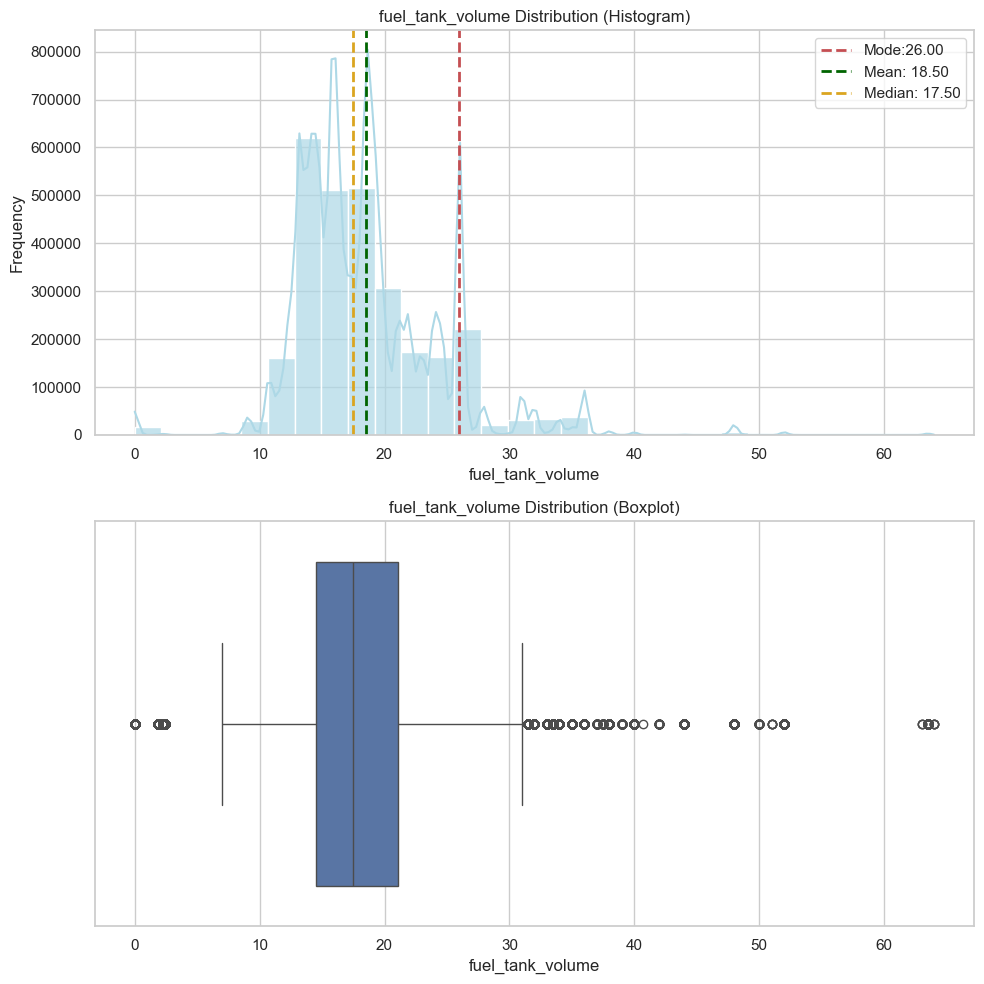

In [86]:
plot_distribution(cars_df,'fuel_tank_volume')

In [87]:
cars_df['fuel_tank_volume'] = cars_df['fuel_tank_volume'].fillna(cars_df.groupby('fuel_type')['fuel_tank_volume'].transform('median'))

In [88]:
count_percent_null(cars_df,'fuel_tank_volume')

Null values in 'fuel_tank_volume': 0.0%


#### engine_type

The engine type is the type of engine the vehicle has. The engine type can also be used to determine the engine size of the vehicle, and how many cylinders the vehicle has.

In [89]:
column_null_info(cars_df,'engine_type')

Null values in 'engine_type': 3.35%

Value distribution:
engine_type
I4                          48.920
V6                          25.420
V8                           9.650
V8 Flex Fuel Vehicle         2.700
I4 Hybrid                    2.510
                             ...  
I3 Hybrid                    0.000
V6 Compressed Natural Gas    0.000
V10 Diesel                   0.000
W16                          0.000
V12 Hybrid                   0.000
Name: proportion, Length: 39, dtype: float64


In [90]:
cars_df['engine_type'].unique()

array(['I4', 'H4', 'V6', 'I6', 'V6 Diesel', nan, 'V8', 'V8 Biodiesel',
       'V8 Flex Fuel Vehicle', 'V6 Flex Fuel Vehicle', 'I4 Hybrid',
       'V6 Hybrid', 'I3', 'I5', 'I4 Flex Fuel Vehicle', 'I4 Diesel',
       'I6 Diesel', 'V8 Diesel', 'R2', 'W12', 'V10', 'V12',
       'V6 Biodiesel', 'H6', 'I2', 'W12 Flex Fuel Vehicle',
       'I5 Biodiesel', 'V8 Hybrid', 'H4 Hybrid',
       'V8 Compressed Natural Gas', 'I6 Hybrid', 'I5 Diesel', 'W8',
       'I4 Compressed Natural Gas', 'V10 Diesel', 'W16', 'V8 Propane',
       'I3 Hybrid', 'V6 Compressed Natural Gas', 'V12 Hybrid'],
      dtype=object)

It looks like the majority of vehicles have a 4 cylinder engine. We can also see that this column shows the fuel type of the vehicle. We can remove the fuel type from the column and just have this column represent the engine type. The fuel type is already represented in the fuel_type column.

In [91]:
# selecting the first string in the engine_type column
cars_df['engine_type'] = cars_df['engine_type'].str.split(' ').str[0]

# checking the unique values in the engine_type column
cars_df['engine_type'].unique()

array(['I4', 'H4', 'V6', 'I6', nan, 'V8', 'I3', 'I5', 'R2', 'W12', 'V10',
       'V12', 'H6', 'I2', 'W8', 'W16'], dtype=object)

In [92]:
# looking at the null rows
cars_df.loc[cars_df['engine_type'].isna(),['make_name','model_name','engine_type', 'fuel_type']]

,make_name,model_name,engine_type,fuel_type
vin,,,,
ZACCJBBB9HPF62165,Jeep,Renegade,NaN,Gasoline
4S3GTAA67J3747545,Subaru,Impreza,NaN,Gasoline
1C3CCBBG6DN528083,Chrysler,200,NaN,Gasoline
1C4RJFLTXKC690774,Jeep,Grand Cherokee,NaN,Gasoline
1C6SRFKT8KN500431,RAM,1500,NaN,Gasoline
...,...,...,...,...
1G1FX6S07H4156779,Chevrolet,Bolt EV,NaN,Electric
1G1FX6S00H4145672,Chevrolet,Bolt EV,NaN,Electric
1N4AZ0CP6GC309456,Nissan,LEAF,NaN,Electric


It looks like the null values are a mix of electric and gas vehicles. Lets first take a look at the electric vehicles

In [93]:
# looking at the null rows that the fuel_type column is "Electric"
cars_df.loc[(cars_df['engine_type'].isna()) & (cars_df['fuel_type'] == "Electric"),['make_name','model_name','engine_type', 'fuel_type']]

,make_name,model_name,engine_type,fuel_type
vin,,,,
KNDJP3AE3H7024713,Kia,Soul EV,NaN,Electric
KNDCC3LG4K5009935,Kia,Niro EV,NaN,Electric
1G1FZ6S05L4121127,Chevrolet,Bolt EV,NaN,Electric
1G1FZ6S06L4123999,Chevrolet,Bolt EV,NaN,Electric
KMHC75LH4HU008626,Hyundai,Ioniq Electric,NaN,Electric
...,...,...,...,...
1G1FW6S07H4129990,Chevrolet,Bolt EV,NaN,Electric
1G1FX6S07H4156779,Chevrolet,Bolt EV,NaN,Electric
1G1FX6S00H4145672,Chevrolet,Bolt EV,NaN,Electric


Next, lets fill these null values

In [94]:
import pandas as pd

def fill_engine_type_based_on_fuel(data, engine_col='engine_type', fuel_col='fuel_type'):
    
    fuel_types = [
        "Gasoline", 
        "Electric",  
        "Diesel",
        "Hybrid",
        "Flex Fuel Vehicle",
        "Biodiesel",
        "Compressed Natural Gas",
        "Propane"
    ]
    
    for fuel in fuel_types:
        data.loc[(data[engine_col].isna()) & (data[fuel_col] == fuel), engine_col] = f"{fuel} engine"
    
    return data

In [95]:
cars_df = fill_engine_type_based_on_fuel(cars_df)

In [96]:
column_null_info(cars_df,'engine_type')

Null values in 'engine_type': 0.0%

Value distribution:
engine_type
I4                              50.250
V6                              27.290
V8                              12.900
Gasoline engine                  2.460
H4                               2.200
                                 ...  
Compressed Natural Gas engine    0.000
Propane engine                   0.000
W8                               0.000
Biodiesel engine                 0.000
W16                              0.000
Name: proportion, Length: 23, dtype: float64


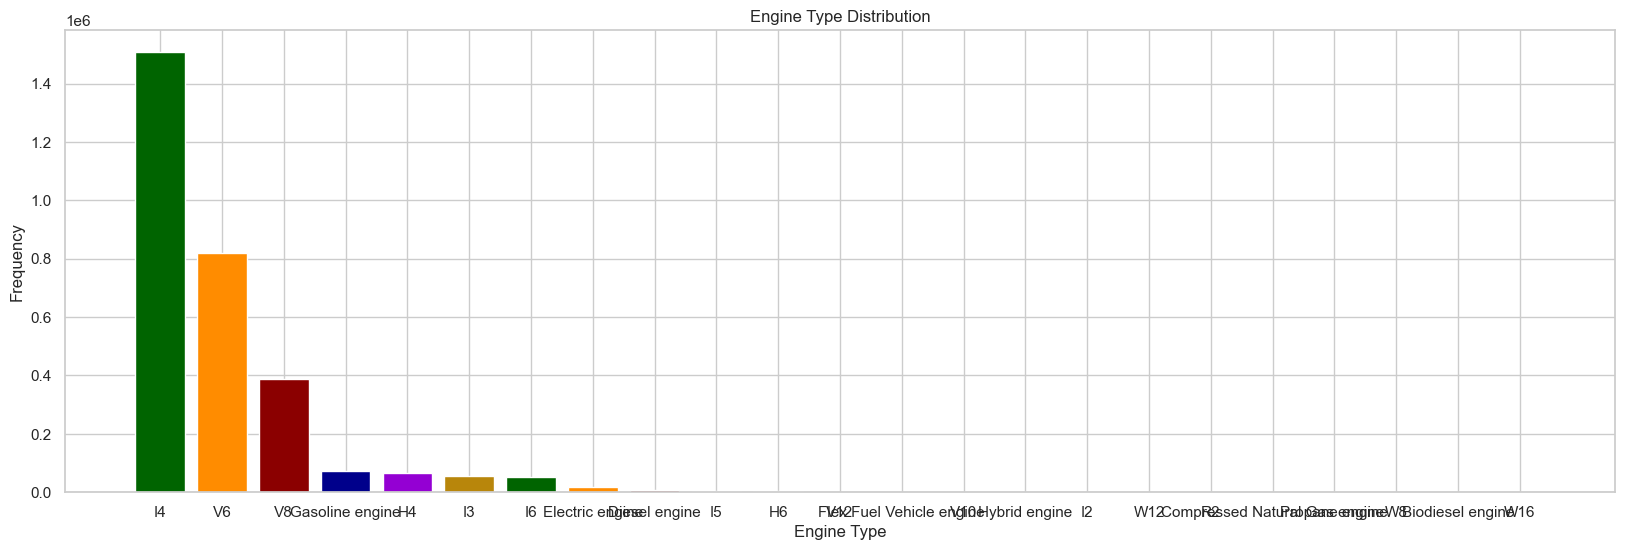

In [97]:
# plotting the distribution of the engine_type column
plt.figure(figsize=(20,6))
plt.bar(cars_df['engine_type'].value_counts().index, cars_df['engine_type'].value_counts(),
        color=['darkgreen','darkorange','darkred','darkblue','darkviolet','darkgoldenrod'])
plt.title('Engine Type Distribution')
plt.xlabel('Engine Type')
plt.ylabel('Frequency')
plt.show()

#### height
The height is the height of the vehicle. This is a measurement of the vehicle height, which is measured in inches.

In [98]:
column_null_info(cars_df,'height')

Null values in 'height': 5.32%

Value distribution:
height
66.100    3.000
66.300    2.730
56.500    2.580
56.900    2.550
65.400    2.430
           ... 
96.200    0.000
93.300    0.000
104.000   0.000
82.500    0.000
103.000   0.000
Name: proportion, Length: 471, dtype: float64


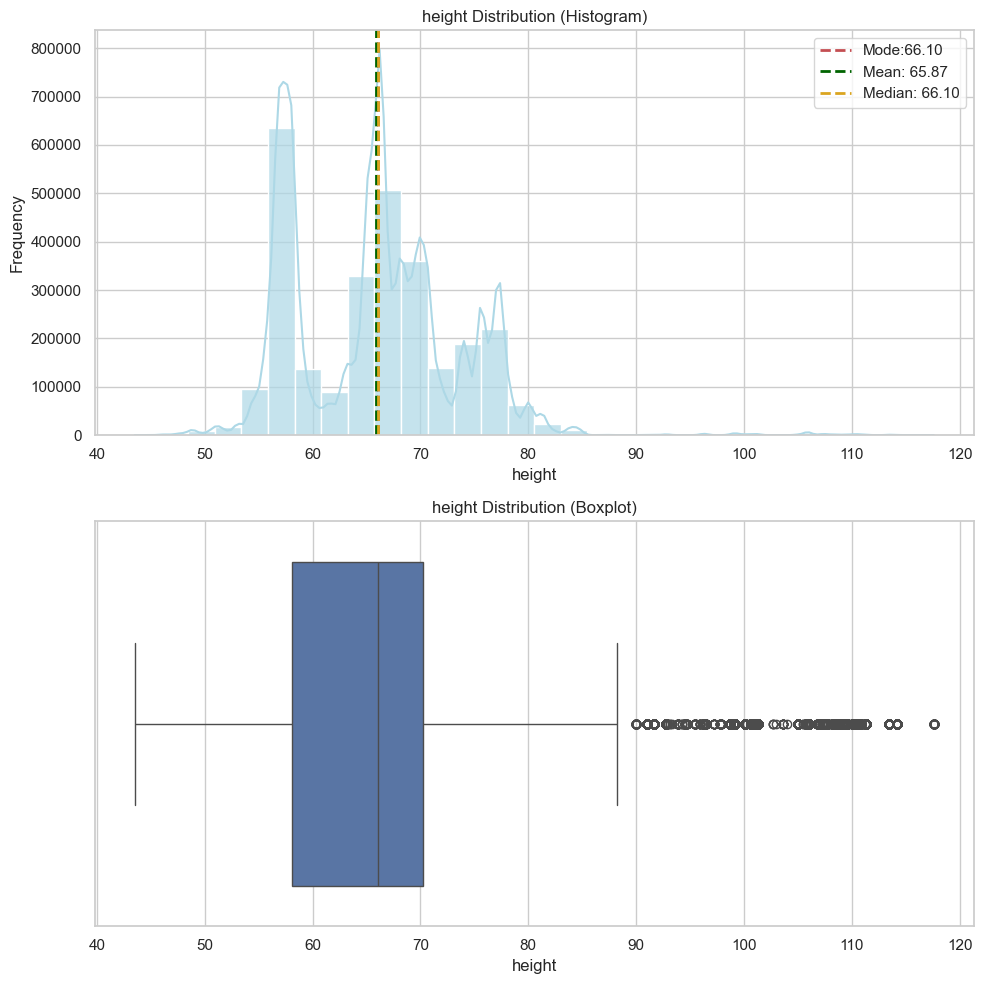

In [99]:
plot_distribution(cars_df,'height')

Looking at the graph, it looks like the height of the vehicles have a wide range of values. This means that we can fill in the null values with the median value.

In [100]:
fill_na_with_median(cars_df,'height')

The amount of null values in the height column are 0.0%.


#### horsepower 
The horsepower represents how much power is produced by the engine.

In [101]:
column_null_info(cars_df,'horsepower')

Null values in 'horsepower': 5.75%

Value distribution:
horsepower
170.000   4.270
375.000   2.780
395.000   2.710
310.000   2.490
180.000   2.480
           ... 
313.000   0.000
91.000    0.000
77.000    0.000
65.000    0.000
69.000    0.000
Name: proportion, Length: 455, dtype: float64


In [102]:
cars_df['horsepower'].mode()[0]

170.0

Typically, you can expect the average car horsepower to fall between 170 and 200 horsepower in a mainstream car. So in this case, we can use the most common value to fill in the null values. More information on this can be found on  
https://www.autolist.com/guides/average-car-horsepower.

In [103]:
#filling the null values with the most common value
cars_df['horsepower'] = cars_df['horsepower'].fillna(cars_df['horsepower'].mode()[0])
count_percent_null(cars_df,'horsepower')

Null values in 'horsepower': 0.0%


#### interior_color
The interior color is the color of the interior of the vehicle.

In [104]:
column_null_info(cars_df,'interior_color')

Null values in 'interior_color': 12.8%

Value distribution:
interior_color
Black                                                        33.310
Gray                                                          7.490
Jet Black                                                     7.120
Black (Ebony)                                                 5.460
Black (Charcoal)                                              4.280
                                                              ...  
Brown (Cappuccino w/Heated Lincoln Soft Touch Front Seats)    0.000
Circuit Red Nuluxe[nuluxe] With Dark Gray Streamli            0.000
Nut Brown/ Black Leather                                      0.000
Black/Orange w/Fabric Seat Trim (FD)                          0.000
Brown (Espresso/Iv/Tan/Esp/Iv/Iv)                             0.000
Name: proportion, Length: 45725, dtype: float64


In [105]:
cars_df['interior_color'].value_counts()/cars_df.shape[0]*100

interior_color
Black                                                        29.046
Gray                                                          6.530
Jet Black                                                     6.206
Black (Ebony)                                                 4.761
Black (Charcoal)                                              3.735
                                                              ...  
Brown (Cappuccino w/Heated Lincoln Soft Touch Front Seats)    0.000
Circuit Red Nuluxe[nuluxe] With Dark Gray Streamli            0.000
Nut Brown/ Black Leather                                      0.000
Black/Orange w/Fabric Seat Trim (FD)                          0.000
Brown (Espresso/Iv/Tan/Esp/Iv/Iv)                             0.000
Name: count, Length: 45725, dtype: float64

In [106]:
# filling the null values with the most frequent value
cars_df['interior_color'] = cars_df['interior_color'].fillna("Black")

In [107]:
count_percent_null(cars_df,'interior_color')

Null values in 'interior_color': 0.0%


Before we move on, we will need to address the large amount of categories in the interior_color column. Having a large amount of categories in the interior_color column can result in a large amount of redundant information. So lets re-categorize the interior_color column to reduce the amount of categories.

In [108]:
# Adding a new column based on the list of primary colors.
colors = ['White', 'Black', 'Gray', 'Silver', 
          'Red', 'Blue', 'Brown', 'Green', 
          'Beige', 'Orange', 'Gold', 'Yellow', 'Purple']

cars_df['interior_color'] = cars_df['interior_color'].str.findall('|'.join(colors)).apply(set).str.join(', ')

In [109]:
cars_df['interior_color'].value_counts()

interior_color
Black                 1956676
Gray                   374038
                       259607
White                   91438
Brown                   74539
                       ...   
Brown, Yellow               1
Purple, Green               1
White, Gold                 1
Red, Black, Gray            1
Silver, Gray, Blue          1
Name: count, Length: 87, dtype: int64

In [110]:
# replacing null values with 'Other Color'.
cars_df['interior_color'] = cars_df['interior_color'].replace("", "Other Color")

# masking the colors that are Mixed Colors.
mask = cars_df['interior_color'].map(cars_df['interior_color'].value_counts()) < 29
mask2 = cars_df['interior_color'].map(cars_df['interior_color'].value_counts()).between(30, 110) 
mask3 = cars_df['interior_color'].map(cars_df['interior_color'].value_counts()).between(186, 1091)
mask4 = cars_df['interior_color'].map(cars_df['interior_color'].value_counts()).between(2121, 12064)

# converting the masked colors to Mixed Colors.
cars_df['interior_color'] =  cars_df['interior_color'].mask(mask, 'Mixed Colors')
cars_df['interior_color'] =  cars_df['interior_color'].mask(mask2, 'Mixed Colors')
cars_df['interior_color'] =  cars_df['interior_color'].mask(mask3, 'Mixed Colors')
cars_df['interior_color'] =  cars_df['interior_color'].mask(mask4, 'Mixed Colors')

# checking the new unique values in the exterior_color_new column
cars_df['interior_color'].value_counts()/cars_df.shape[0]*100

interior_color
Black          65.223
Gray           12.468
Other Color     8.654
White           3.048
Brown           2.485
                ...  
White, Black    0.041
Gold            0.040
Orange          0.037
Yellow          0.005
Purple          0.004
Name: count, Length: 20, dtype: float64

In [111]:
# replacing all rows with more than one color with 'Mixed Colors'.
cars_df['interior_color'] = cars_df['interior_color'].replace(["Brown, Beige","Gray, Black","Black, White"],"Mixed Colors")

# checking the new unique values in the exterior_color_new column
cars_df['interior_color'].value_counts()/cars_df.shape[0]*100

interior_color
Black          65.223
Gray           12.468
Other Color     8.654
Mixed Colors    4.037
White           3.048
                ...  
White, Black    0.041
Gold            0.040
Orange          0.037
Yellow          0.005
Purple          0.004
Name: count, Length: 18, dtype: float64

Great! We have successfully cleaned the interior_color column.

#### length
The length is the length of the vehicle. This is measured in inches.

In [112]:
count_percent_null(cars_df,'length')
cars_df['length'].value_counts()/cars_df.shape[0]*100

Null values in 'length': 5.32%


length
231.900   3.257
183.100   2.158
231.700   1.927
182.300   1.830
184.500   1.707
           ... 
156.400   0.000
284.800   0.000
156.000   0.000
247.000   0.000
235.100   0.000
Name: count, Length: 835, dtype: float64

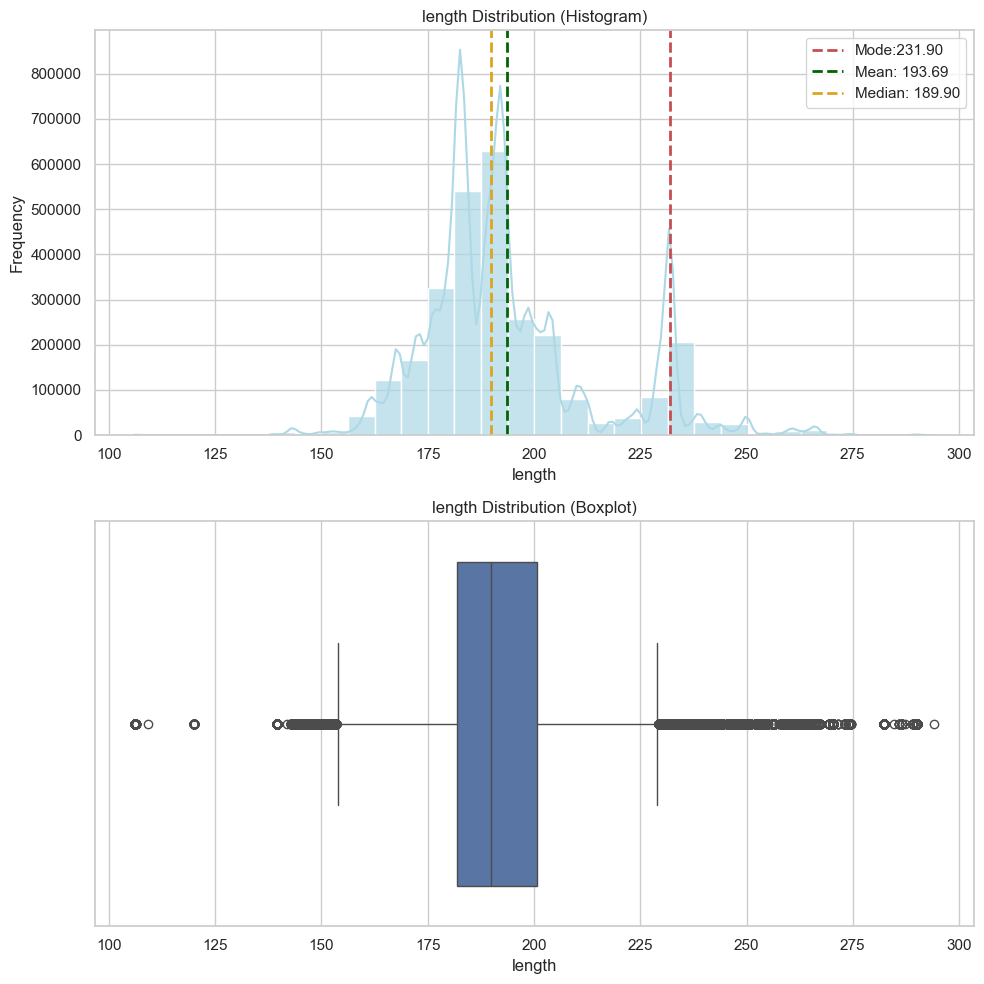

In [113]:
plot_distribution(cars_df, 'length')

In [114]:
# filling the null values with the median of the column
cars_df['length'] = cars_df['length'].fillna(cars_df['length'].median())

In [115]:
count_percent_null(cars_df,'length')

Null values in 'length': 0.0%


#### main_picture_url - drop
The main picture url is the url of the main picture of the vehicle. This is a link to the main picture of the vehicle. Since this is a price prediction model, we will not be using this column. We will drop this column from the dataset.

In [116]:
# dropping the column
cars_df.drop('main_picture_url', axis=1, inplace=True)

#### major_options - drop
- Major options is a list of the major options the vehicle has. This will be helpful in adding more features to the model.
- filter and transfer to 'major_options_count' column

In [117]:
count_percent_null(cars_df, 'major_options')
cars_df['major_options'].value_counts()/cars_df.shape[0]*100

Null values in 'major_options': 6.67%


major_options
['Alloy Wheels', 'Bluetooth', 'Backup Camera']                                                                                                                                                                                                                     2.969
['Alloy Wheels']                                                                                                                                                                                                                                                   1.376
['Steel Wheels']                                                                                                                                                                                                                                                   1.367
['Bluetooth', 'Backup Camera']                                                                                                                                                                 

To make the column easier to work with, we will just convert the column into a new column called 'major_options_count'. This will be the number of major options the vehicle has. We will also drop the major_options column from the dataset.

In [118]:
# creating a major_options_count column to count the number of major options
cars_df['major_options_count'] = cars_df['major_options'].str.count(',') + 1
 
# checking the result
cars_df['major_options_count'].value_counts()

major_options_count
4.000     340504
3.000     314017
5.000     307010
6.000     282661
7.000     249399
           ...  
43.000         2
42.000         1
59.000         1
57.000         1
47.000         1
Name: count, Length: 53, dtype: int64

Lets get a visual representation of the major_options_count column

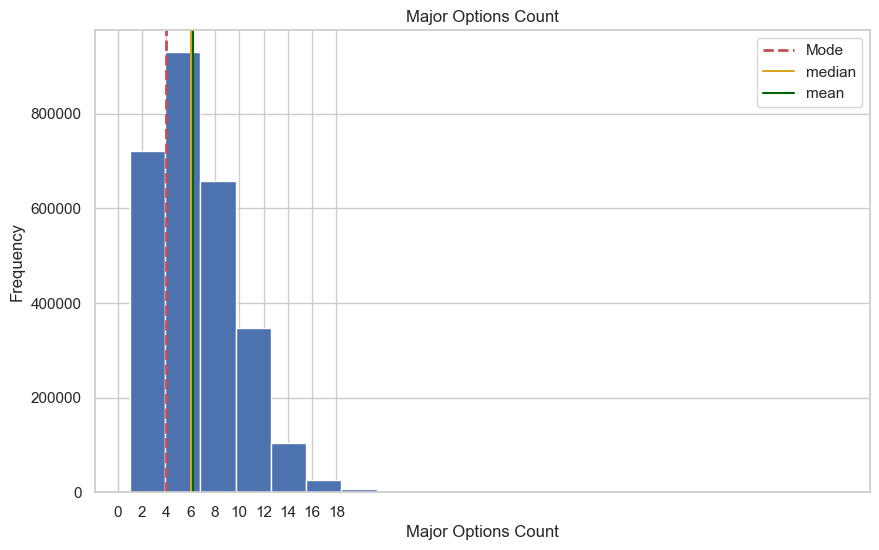

In [119]:
# plotting the distribution of the major_options_count column
plt.figure(figsize=(10,6))
plt.hist(cars_df['major_options_count'], bins=20)
plt.title('Major Options Count')
# Add the mode
plt.axvline(cars_df['major_options_count'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df['major_options_count'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df['major_options_count'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Major Options Count')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 20, 2))
plt.show()

As we can see, the majority of vehicles have 4 to 6 major options. We can fill in the null values with the mean value of the column.

In [120]:
# filling the null values with the mean of the column
cars_df['major_options_count'] = cars_df['major_options_count'].fillna(cars_df['major_options_count'].mean())

In [121]:
count_percent_null(cars_df,'major_options_count')

Null values in 'major_options_count': 0.0%


Lets not forget to drop the major_options column from the dataset as well

In [122]:
# dropping the major_options column
cars_df.drop('major_options', axis=1, inplace=True)

#### maximum_seating
Maximum seating is the maximum amount of people that can be seated in the vehicle.

In [123]:
count_percent_null(cars_df,'maximum_seating')

Null values in 'maximum_seating': 5.31%


In [124]:
# checking the value_counts of the column
display(cars_df['maximum_seating'].value_counts()/cars_df.shape[0]*100)
display(cars_df['maximum_seating'].unique())

maximum_seating
5 seats    62.511
7 seats    10.178
6 seats    10.049
8 seats     6.679
4 seats     2.706
            ...  
15 seats    0.197
9 seats     0.121
12 seats    0.057
10 seats    0.018
--          0.017
Name: count, Length: 12, dtype: float64

array(['5 seats', '7 seats', '2 seats', '4 seats', '8 seats', nan,
       '6 seats', '9 seats', '3 seats', '--', '15 seats', '12 seats',
       '10 seats'], dtype=object)

The standard modern car has a maximum seating capacity of 5 people. So we can replace the null values with the value '5 seats'. But before we can do that, we will need to clean the column further

In [125]:
# replacing the "--" with np.nan
cars_df['maximum_seating'] = cars_df['maximum_seating'].replace("--", np.nan)

# filling the null values with a new value called the most frequent value.
cars_df['maximum_seating'] = cars_df['maximum_seating'].fillna("5 seats")

# checking the result
result = cars_df['maximum_seating'].isna().sum()/cars_df.shape[0]*100

print(f"The amount of null values in the maximum_seating column are {result.round(2)}%.")

The amount of null values in the maximum_seating column are 0.0%.


Lets also remove the word 'seats' from the column.

In [126]:
# removing the " seats" from the column
cars_df['maximum_seating'] = cars_df['maximum_seating'].str.replace(" seats", "")

# converting the column to a int
cars_df['maximum_seating'] = pd.to_numeric(cars_df['maximum_seating'], downcast='integer')

# checking the result
cars_df['maximum_seating'].value_counts()

maximum_seating
5     2035099
7      305325
6      301481
8      200358
4       81173
       ...   
3       29676
15       5906
9        3634
12       1703
10        540
Name: count, Length: 11, dtype: int64

In [127]:
count_percent_null(cars_df,'maximum_seating')

Null values in 'maximum_seating': 0.0%


#### mileage
Milage is the mileage of the vehicle. This measures how many miles the vehicle has been driven. This is a very important feature in determining the price of the vehicle. The higher the mileage, the lower the price

In [128]:
column_null_info(cars_df,'mileage')

Null values in 'mileage': 4.81%

Value distribution:
mileage
0.000        9.000
5.000        5.280
10.000       4.880
3.000        2.740
2.000        2.670
              ... 
137822.000   0.000
142416.000   0.000
271567.000   0.000
163323.000   0.000
121932.000   0.000
Name: proportion, Length: 197577, dtype: float64


In [129]:
cars_df['mileage'].value_counts()/cars_df.shape[0]*100

mileage
0.000        8.563
5.000        5.029
10.000       4.649
3.000        2.610
2.000        2.545
              ... 
137822.000   0.000
142416.000   0.000
271567.000   0.000
163323.000   0.000
121932.000   0.000
Name: count, Length: 197577, dtype: float64

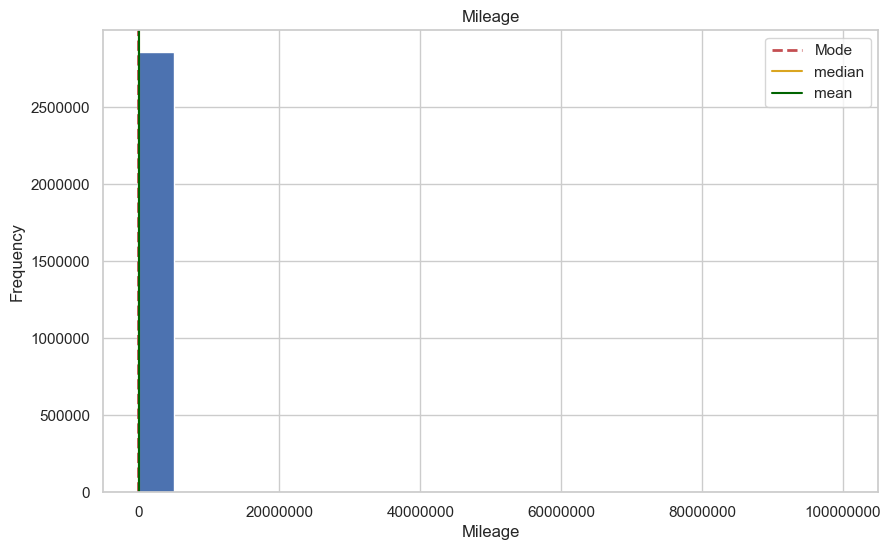

In [130]:
# plotting the mileage column to see the distribution
plt.figure(figsize=(10,6))
plt.hist(cars_df['mileage'], bins=20)
plt.title('Mileage')
# Add the mode
plt.axvline(cars_df['mileage'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df['mileage'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df['mileage'].mean(), color='darkgreen', label='mean')
#removing scientific notation
plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

The graph shows us that there are a large amount of outliers in the column. So we will need to remove the outliers before we can fill in the null values with the mean or median value. We will use the interquartile range to remove the outliers. 

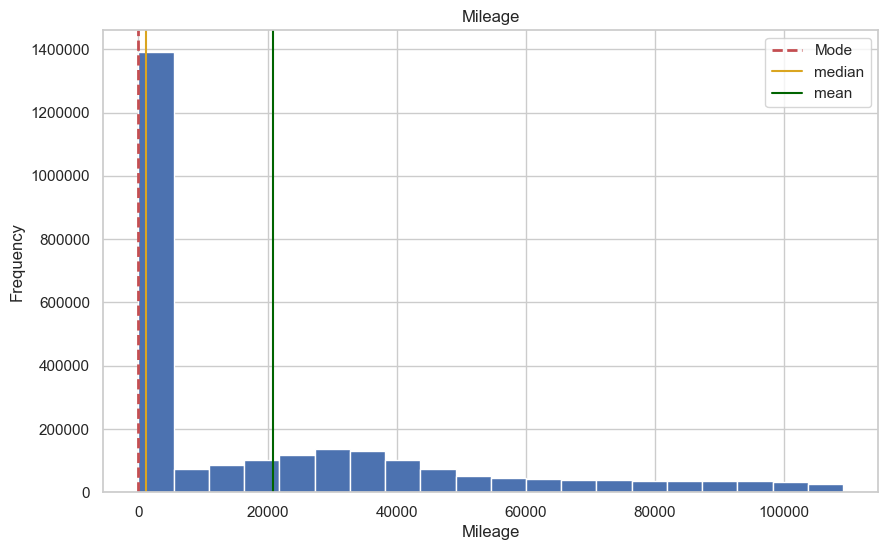

In [131]:
# using the interquartile range to remove outliers
q1 = cars_df['mileage'].quantile(0.25)
q3 = cars_df['mileage'].quantile(0.75)

# calculating the interquartile range
iqr = q3 - q1

# removing outliers
cars_df = cars_df[(cars_df['mileage'] >= q1 - 1.5*iqr) & (cars_df['mileage'] <= q3 + 1.5*iqr)]

# checking the result
plt.figure(figsize=(10,6))
plt.hist(cars_df['mileage'], bins=20)
plt.title('Mileage')
# Add the mode
plt.axvline(cars_df['mileage'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df['mileage'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df['mileage'].mean(), color='darkgreen', label='mean')
#removing scientific notation
plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

It looks like the majority of vehicles have a mileage of 0 miles. This is because the vehicles are new. So in this case, we can fill in the null values with the mean value of the column.

In [132]:
fill_na_with_mean(cars_df,'mileage')

The amount of null values in the mileage column are 0.0%.


In [133]:
count_percent_null(cars_df,'mileage')

Null values in 'mileage': 0.0%


#### power - drop
Power is the power produced by the engine. This is a measurement of the power produced by the engine and the revolutions per minute (rpm). Since this is another measurement of the power the engine produces, we will not be using this column. We will drop this column from the dataset due to redundancy

In [134]:
# dropping the column
cars_df.drop('power', axis=1, inplace=True)

#### seller_rating
The seller rating is the rating of the dealership that is selling the vehicle. This is a rating from 1 to 5 stars.

In [135]:
count_percent_null(cars_df,'seller_rating')


Null values in 'seller_rating': 1.19%


In [136]:
cars_df['seller_rating'].value_counts()/cars_df.shape[0]*100

seller_rating
5.000   6.001
4.000   4.075
4.500   3.536
4.667   2.058
4.333   2.018
         ... 
4.788   0.000
4.012   0.000
3.984   0.000
3.816   0.000
3.165   0.000
Name: count, Length: 1805, dtype: float64

Since this column represents the rating of the seller, we can replace the null values with the most common value of the column.

In [137]:
cars_df['seller_rating'] = cars_df['seller_rating'].fillna("5")

In [138]:
# binning the column into 5 star ratings
cars_df['seller_rating'] = cars_df['seller_rating'].astype(int)
cars_df['seller_rating'] = pd.cut(cars_df['seller_rating'], bins=[0,1,2,3,4,5], labels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])
 
# checking the result
cars_df['seller_rating'].value_counts()

seller_rating
4 stars    1885877
3 stars     504774
5 stars     188722
2 stars      39014
1 star        7523
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

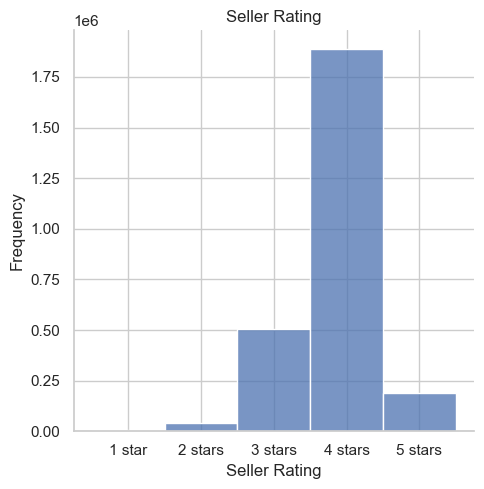

In [139]:
plt.figure(figsize=(10,6))
sns.displot(cars_df['seller_rating'], bins=5)
plt.title('Seller Rating')
plt.xlabel('Seller Rating')
plt.ylabel('Frequency')
plt.show()

We can see that the seller_rating column is heavily skewed to the right. This means that there are a large amount of 4 star ratings which tells us that most sellers have a high rating.

#### sp_id - drop
The service principal ID is set as a variable named SP_ID for use in additional command. This is not useful for our model because this acts as a unique identifier for the vehicle. We will drop this column from the dataset.

In [140]:
# dropping the column
cars_df.drop(['sp_id'], axis=1, inplace=True)

#### torque
- Torque is the engine's rotational force and measures how much of that twisting force is available when an engine exerts itself.

In [141]:
# checking the number of null values in the column
count_percent_null(cars_df,'torque')

Null values in 'torque': 17.52%


- This is a large amount of null values. Lets take a closer look.

In [142]:
# checking the value_counts of the column
cars_df['torque'].value_counts()/cars_df.shape[0]*100

torque
383 lb-ft @ 4,100 RPM   3.095
400 lb-ft @ 4,500 RPM   2.361
410 lb-ft @ 3,950 RPM   2.011
148 lb-ft @ 200 RPM     1.920
132 lb-ft @ 4,500 RPM   1.858
                         ... 
210 lb-ft @ 3,900 RPM   0.000
195 lb-ft @ 2,000 RPM   0.000
378 lb-ft @ 3,050 RPM   0.000
142 lb-ft @ 4,500 RPM   0.000
156 lb-ft @ 4,500 RPM   0.000
Name: count, Length: 1925, dtype: float64

- We can separate the torque from this column and find the average value. But first, we will need to clean the column further.

In [143]:
# splitting the column and returning the first value
cars_df['torque'] = cars_df['torque'].str.split(" ").str[0]

# converting the column to float.
cars_df['torque'] = cars_df['torque'].astype(float)

- Now that the column is cleaned, lets get a visual representation. This will help us determine if we can fill in the null values with a mean or median value.

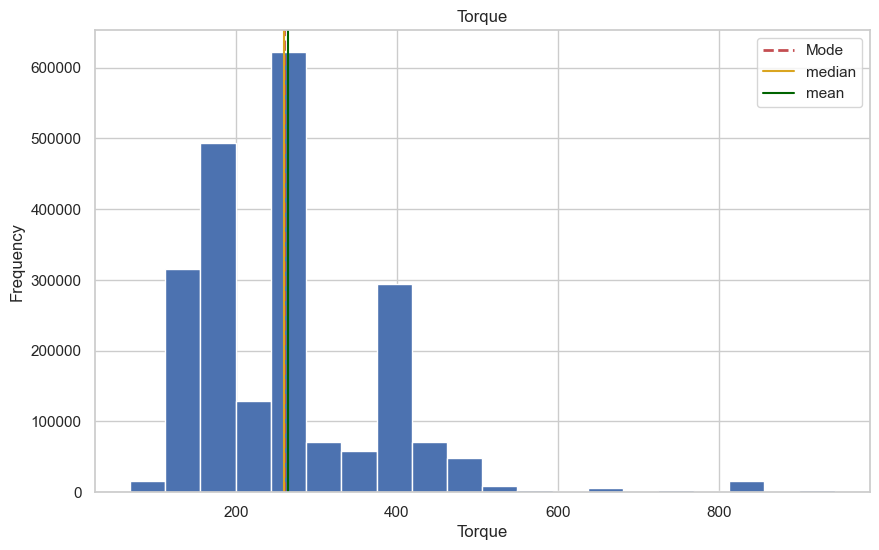

In [144]:
# plotting the distribution of the column
plt.figure(figsize=(10,6))
plt.hist(cars_df['torque'], bins=20)
plt.title('Torque')
# Add the mode
plt.axvline(cars_df['torque'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df['torque'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df['torque'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Torque')
plt.ylabel('Frequency')
plt.show()

- The graph shows us that there is a majority of vehicles have a torque of 383 lb-ft.
- In this case, we can fill in the null values with the mean value of the column.

In [145]:
# filling the null values with the mean of the column.
fill_na_with_mean(cars_df,'torque')

The amount of null values in the torque column are 0.0%.


#### transmission
- The transmission is the type of transmission the vehicle has.

In [146]:
count_percent_null(cars_df,'transmission')

Null values in 'transmission': 2.09%


- Let's take a closer look at the transmission column.

In [147]:
# checking the value_counts of the column
cars_df['transmission'].value_counts()/cars_df.shape[0]*100

transmission
A             80.066
CVT           15.987
M              1.477
Dual Clutch    0.379
Name: count, dtype: float64

In [148]:
# checking for unique values in the column
cars_df['transmission'].unique()

array(['A', 'CVT', 'M', nan, 'Dual Clutch'], dtype=object)

- The automatic transmission is the most common type of transmission. So we can replace the null values with the most common value of the column.

In [149]:
# filling the null values with "A", for Automatic transmission.
cars_df['transmission'] = cars_df['transmission'].fillna("A")

# checking the result
result = cars_df['transmission'].isna().sum()/cars_df.shape[0]*100

print(f"The amount of null values in the transmission column are {result.round(2)}%.")

The amount of null values in the transmission column are 0.0%.


#### transmission_display - drop
- The transmission display also represents the type of transmission the vehicle has. This is a more detailed version of the transmission column. Since we already have the transmission column, we will drop this column from the dataset.

In [150]:
# dropping the transmission_display
cars_df.drop(['transmission_display'], axis=1, inplace=True)

#### trimId - drop
- The trimId is the trim Id of the vehicle. This is another unique identifier for the vehicle that is redundant. We will drop this column from the dataset.

In [151]:
# dropping the column
cars_df.drop(['trimId'], axis=1, inplace=True)

#### trim_name - drop
- The trim name is the name of the trim of the vehicle. This is another unique identifier for the vehicle that is redundant. We will drop this column from the dataset.

In [152]:
# dropping the column
cars_df.drop(['trim_name'], axis=1, inplace=True)

#### wheel_system
- The wheel system represents the how to power of the engine is transmitted to the wheels.

In [153]:
# checking the number of null values in the column
count_percent_null(cars_df,'wheel_system')

Null values in 'wheel_system': 4.73%


- Let's take a closer look at the wheel_system column.

In [154]:
# checking the value_counts of the column
cars_df['wheel_system'].value_counts()/cars_df.shape[0]*100

wheel_system
FWD   42.348
AWD   23.759
4WD   19.034
RWD    6.198
4X2    3.926
Name: count, dtype: float64

In [155]:
# checking the unique values of the column
cars_df['wheel_system'].unique()

array(['FWD', 'AWD', 'RWD', '4WD', nan, '4X2'], dtype=object)

- In this case, we can replace the null values with the most common value of the column.

In [156]:
# replacing the null values with "FWD".
cars_df['wheel_system'] = cars_df['wheel_system'].fillna("FWD")

# checking the result
result = cars_df['wheel_system'].isna().sum()/cars_df.shape[0]*100

print(f"The amount of null values in the wheel_system column are {result.round(2)}%.")

The amount of null values in the wheel_system column are 0.0%.


#### wheel_system_display - drop
- The wheel system display is anothe representation of the wheel system column. This is redundant information because we already have the wheel_system column. So we can drop this column.

In [157]:
cars_df['wheel_system_display'].value_counts()

wheel_system_display
Front-Wheel Drive    1112022
All-Wheel Drive       623902
Four-Wheel Drive      499817
Rear-Wheel Drive      162751
4X2                   103098
Name: count, dtype: int64

In [158]:
# dropping the column
cars_df.drop(['wheel_system_display'], axis=1, inplace=True)

#### wheelbase
- The wheelbase is the distance between the front and rear axles of the vehicle.

In [159]:
# checking the number of null values in the column
percentage = cars_df['wheelbase'].isna().sum()/cars_df.shape[0]*100

print(f"The amount of null values in the wheelbase column are {percentage.round(2)}%.")

The amount of null values in the wheelbase column are 5.01%.


- With this many null values, we need to take a closer look.

In [160]:
# checking the value_counts of the column
cars_df['wheelbase'].value_counts()/cars_df.shape[0]*100

wheelbase
106.300   6.740
112.200   4.488
145.000   3.195
105.100   3.014
111.200   2.908
           ... 
156.400   0.000
130.900   0.000
170.000   0.000
96.400    0.000
138.400   0.000
Name: count, Length: 469, dtype: float64

In [161]:
# checking the unique values of the column
cars_df['wheelbase'].unique()

array([101.2, 107.9, 115. , 113.1, 107.3, 105.6,  93.7, 110.6, 106.2,
       106.3, 111.4, 107.5, 120.9, 118.9, 114.8, 103.7,   nan, 104.3,
       109.4, 108. , 108.9, 112.5, 115.1, 116. , 119.8, 118.4, 120.2,
       143.5, 105.9, 109.8, 120.4, 110.4, 112.8, 122.5, 108.1, 114.7,
       105.1, 121.6, 106.5, 130. , 110.7, 105.7, 100.6, 111.2, 109.3,
       102.5, 119. , 103.8, 159.8, 140.5, 114.2, 115.3, 112.7, 110.5,
       144.6, 107.1, 147.4, 115.5, 116.2, 111.7, 114. , 147.5, 108.5,
       116.9, 153.7, 121.2, 126.4, 113.2, 111.8, 104.2, 114.9, 121.1,
       144.3, 111. , 128.3, 113.8, 108.3, 104.8, 127.4, 139.8, 112.3,
       118.3, 112.2, 112.4, 106.1, 106.9, 110.2, 124.6, 115.9, 114.6,
       113.4,  98. , 104.7, 120.5, 101.8, 122.4,  95.7, 106.6, 115.7,
        90.9, 102.4, 145. , 117.1, 104.4, 103.6, 106.4, 110. , 111.6,
       103.1, 101.6,  96.5, 108.8, 160. , 115.6, 103.9, 102.9, 104.9,
       102.8,  95.4, 118. , 107.8, 118.1, 120. , 136. ,  98.4, 103. ,
       103.5, 107.4,

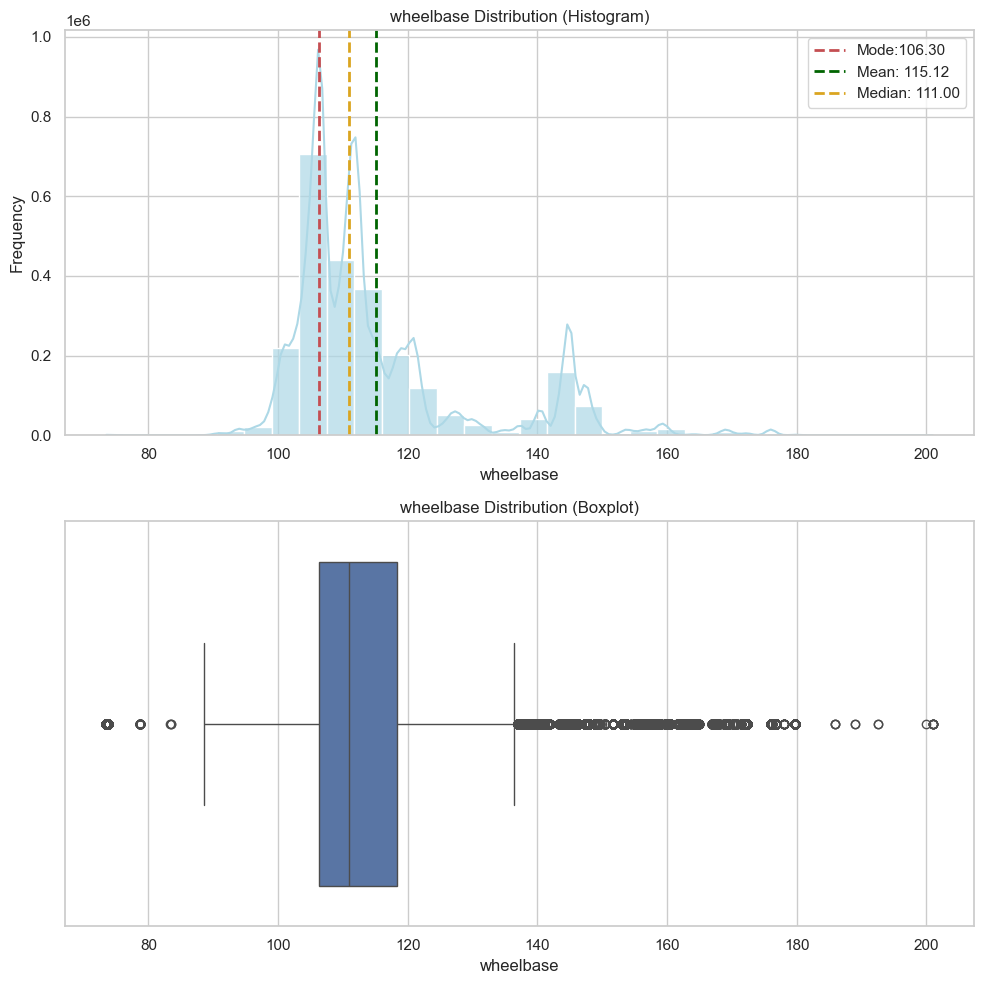

In [162]:
# plotting the distribution of the column
plot_distribution(cars_df,'wheelbase')

- With a wide range of values, we can see that the majority of vehicles have a wheelbase of 112 inches. So we can fill in the null values with the median value of the column.

In [163]:
fill_na_with_median(cars_df,'wheelbase')

The amount of null values in the wheelbase column are 0.0%.


#### width
- The width is the width of the vehicle. This is measured in inches.

In [164]:
count_percent_null(cars_df,'width')

Null values in 'width': 5.01%


- Lets take a closer look at the width column.

In [165]:
# checking the value_counts of the column
cars_df['width'].value_counts()/cars_df.shape[0]*100

width
72.400   4.670
73.000   3.749
96.800   3.671
83.500   2.582
70.900   2.535
          ... 
63.800   0.000
62.000   0.000
63.700   0.000
65.200   0.000
65.100   0.000
Name: count, Length: 279, dtype: float64

In [166]:
# checking the unique values of the column
cars_df['width'].unique()

array([ 79.6,  85.6,  87.4,  84.4,  70.7,  82.7,  73.5,  80. ,  69.6,
        83.3,  70.9,  73. ,  81.5,  78.6,  78.5,  84.8,  71.4,   nan,
        83.5,  73.6,  72.5,  82.8,  85.5,  73.8,  72.6,  75. ,  70.8,
        74.6,  82.5,  73.2,  90.2,  93.8,  81.3,  71.8,  84.3,  80.5,
        72.8,  78.1,  90.4,  72.4,  74.7,  69.9,  70.5,  73.7,  71.2,
        82.9, 105.9,  83.9,  77.2,  77.5,  76.7,  74.4,  75.2,  82.1,
        81.9,  81.2,  86.5,  85.4,  85.2,  79.4,  79.9,  69. ,  88.5,
        86.4,  72. ,  82.6,  84. ,  79.5,  72.3,  78.9,  73.4,  83.2,
        79.3,  69.2,  83.7,  72.9,  82.2,  81.1,  96. ,  76.3,  72.2,
        82.3,  70.4,  80.3,  78.8,  75.5,  70.1,  85. ,  79. ,  77.7,
        71.1,  68. ,  87.3,  71.7,  74.3,  83. ,  80.8,  85.8,  78.2,
        67.8,  81.8,  89.3,  96.8,  68.5,  74. ,  70. ,  69.3,  74.9,
        73.3,  67.9,  65.6,  73.1,  79.1,  74.1,  69.5,  69.4,  69.8,
        80.1,  81. ,  74.8,  84.2,  97.6,  71.6,  84.1,  84.6,  91.5,
        71.5,  77.3,

- Now that the column is cleaned, lets get a visual representation. This will help us determine if we can fill in the null values with a mean or median value.

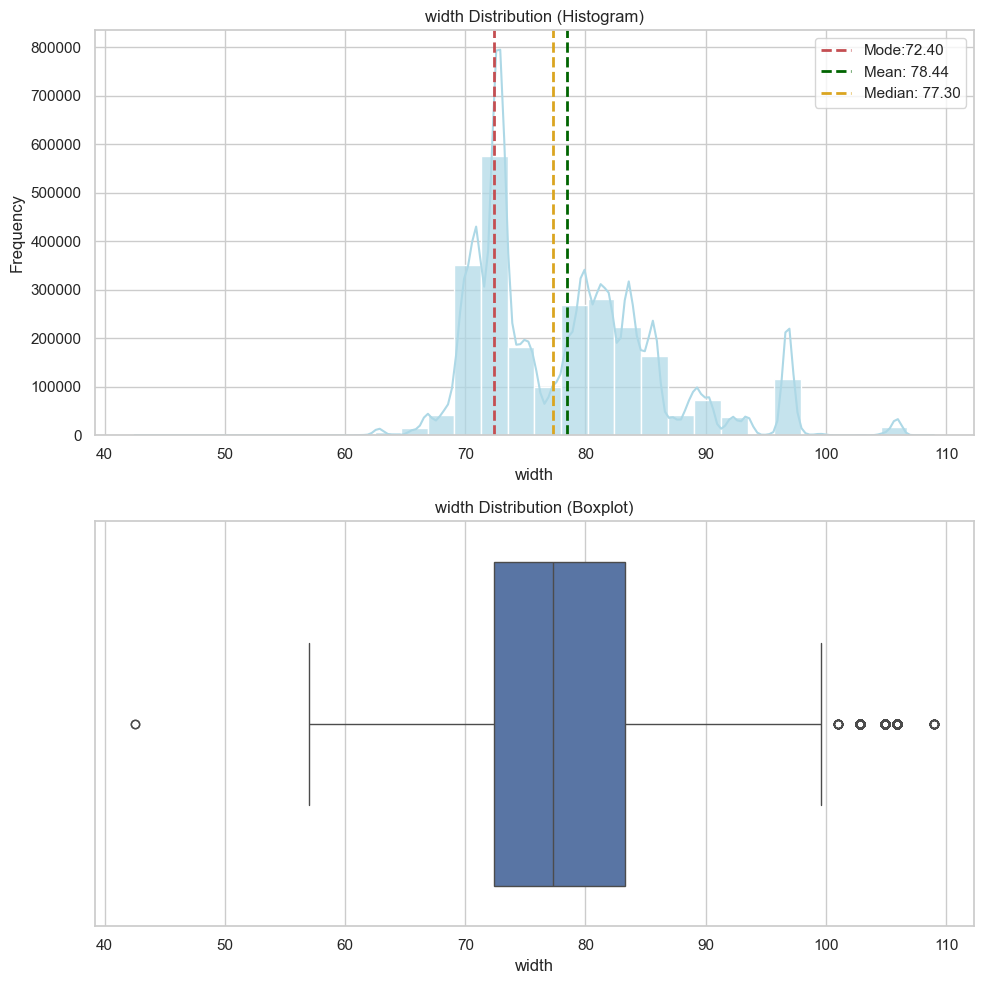

In [167]:
plot_distribution(cars_df,'width')

- Just like the length column, we can see that the majority of vehicles have a width of 75 inches. So we can fill in the null values with the mode value of the column.

In [168]:
# filling the null values with the mode of the column.
cars_df['width'] = cars_df['width'].fillna(cars_df['width'].mode()[0])

# checking the result
result = cars_df['width'].isna().sum()/cars_df.shape[0]*100

print(f"The amount of null values in the width column are {result.round(2)}%.")

The amount of null values in the width column are 0.0%.


#### dealer_zip - drop
 - Zipcode of the dealer
 - filter and transfer to 'dealer_region'

In [169]:
count_percent_null(cars_df,'dealer_zip')

Null values in 'dealer_zip': 0.0%


In [170]:
cars_df['dealer_zip'] = cars_df['dealer_zip'].astype(str)
cars_df['dealer_zip'] = cars_df['dealer_zip'].str.extract(r'(\d{5})')[0]

In [171]:
import zipcodes

all_zips = zipcodes.list_all()

# zip -> state
zip_to_state = {z['zip_code']: z['state'] for z in all_zips}

#return the state of the zip code
cars_df['dealer_state'] = cars_df['dealer_zip'].map(zip_to_state)


In [172]:
count_percent_null(cars_df,'dealer_state')

Null values in 'dealer_state': 7.62%


In [173]:

cars_df['dealer_state'] = cars_df['dealer_state'].fillna("Unknown")

In [174]:
count_percent_null(cars_df,'dealer_state')

Null values in 'dealer_state': 0.0%


In [175]:
# grouping the states by region
region_dict = {'CA': 'West', 'TX': 'South', 'FL': 'South', 'NY': 'Northeast',
               'PA': 'Northeast', 'IL': 'Midwest', 'OH': 'Midwest', 'GA': 'South', 'NC': 'South'
               , 'MI': 'Midwest', 'NJ': 'Northeast', 'VA': 'South', 'WA': 'West', 'AZ': 'West',
               'MA': 'Northeast', 'TN': 'South', 'IN': 'Midwest', 'MO': 'Midwest', 'MD': 'South', 
               'CO': 'West', 'MN': 'Midwest', 'SC': 'South', 'AL': 'South', 'LA': 'South', 'WI': 'Midwest',
               'OR': 'West', 'KY': 'South', 'OK': 'South', 'CT': 'Northeast', 'IA': 'Midwest', 'NV': 'West',
               'UT': 'West', 'AR': 'South', 'MS': 'South', 'KS': 'Midwest', 'NM': 'West', 'NE': 'Midwest',
               'NH': 'Northeast', 'ID': 'West', 'ME': 'Northeast', 'RI': 'Northeast', 'WV': 'South', 'MT': 'West',
               'DE': 'South', 'AK': 'West', 'DC': 'South', 'ND': 'Midwest', 'SD': 'Midwest', 'VT': 'Northeast',
               'WY': 'West', 'HI': 'West', 'PR': 'South', 'GU': 'West', 'VI': 'South', 'MP': 'West', 'AS': 'South',
               'FM': 'West', 'MH': 'West', 'PW': 'West', 'AA': 'South', 'AE': 'South', 'AP': 'South'}

# mapping the dictionary to the column
cars_df['dealer_region'] = cars_df['dealer_state'].map(region_dict) 
 
# checking the result
cars_df['dealer_region'].value_counts()

dealer_region
South        1097526
Midwest       637346
West          492079
Northeast     198981
Name: count, dtype: int64

- Now that we have grouped the states into regions, we can drop the state and dealer_zip columns.

In [176]:
# dropping the columns
cars_df.drop(['dealer_zip', 'dealer_state'], axis=1, inplace=True)

#### franchise_dealer - drop
- The franchise dealer is a boolean value that represents if the dealer is a franchise dealer or not. We can simply drop this column because we already have the seller_rating column. The seller_rating column is more useful because it is a numeric column and we can use it to determine if the dealer is a franchise dealer or not.

In [177]:
# dropping the column
cars_df.drop(['franchise_dealer'], axis=1, inplace=True)

#### is_new - drop
- The is new column is a boolean value that represents if the vehicle is new or not. This is a redundant column because we already have the mileage column, which already tells us if the vehicle is new or not. We will drop this column.


In [178]:
# dropping the column
cars_df.drop(['is_new'], axis=1, inplace=True)

#### listed_date - drop
- The listed date is the date the vehicle was listed. We can drop this column because we already have the year column. The year column is more useful because it is a numeric column and we can use it to find the age of the vehicle.

In [179]:
# dropping the column
cars_df.drop(['listed_date'], axis=1, inplace=True)

#### listing_color - drop
- The listing color is the color of the vehicle when it was listed. We do not want to use the listing_color column because it is the color of the vehicle when it was first listed. This is not useful for our model because the vehicle may have been re-painted since it was listed. So we will drop this column.

In [180]:
# dropping the column
cars_df.drop(['listing_color'], axis=1, inplace=True)

#### make_name
- The make name is the name of the make of the vehicle. Lets take a closer look at the make_name column and see how we can use it in our model.

In [181]:
# checking the value_counts of the column
top_20 = cars_df['make_name'].value_counts()
top_20

make_name
Ford         414684
Chevrolet    324028
Toyota       201057
Nissan       196380
Honda        184584
              ...  
Hudson            1
Austin            1
Daewoo            1
Edsel             1
Rover             1
Name: count, Length: 97, dtype: int64

In [182]:
# checking the number of unique values in the column
cars_df['make_name'].nunique()

97

- In order to cut the number of unique values in the make_name column, we will list the top 20 most common values and replace the rest with the value 'Other'.

In [183]:
# creating a list of the top 20 makes
top_20 = top_20[:20].index
 
# creating a function to return the top 20 makes
def top_20_make(make):
    if make in top_20:
        return make
    else:
        return 'Other'
    
# applying the function to the column
cars_df['make_name'] = cars_df['make_name'].apply(top_20_make)
 
# checking the result
cars_df['make_name'].value_counts()

make_name
Ford         414684
Chevrolet    324028
Other        216091
Toyota       201057
Nissan       196380
              ...  
BMW           55901
Mazda         46690
Cadillac      42618
Lexus         34323
Audi          33892
Name: count, Length: 21, dtype: int64

- It looks like the top 3 most common values are Ford, Chevrolet, and Toyota. These are the types of vehicles that are most likely to be sold.

#### model_name
- The model name is the name of the model of the vehicle. Lets take a closer look at the model_name column and see how we can use it in our model.

In [184]:
# checking the value_counts of the column
cars_df['model_name'].value_counts()

model_name
F-150              111982
1500                62389
Silverado 1500      62291
Equinox             56645
Escape              51151
                    ...  
959                     1
95                      1
550 Spyder              1
Stag                    1
C/K 1000 Series         1
Name: count, Length: 1359, dtype: int64

In [185]:
# checking the number of unique values in the column
cars_df['model_name'].nunique()

1359

- Like our make_name column, we will list the top 20 most common values and replace the rest with the value 'Other'. This will reduce the number of unique values in the model_name column.

In [186]:
# instantiating the value counts
top_20 = cars_df['model_name'].value_counts()

# creating a list of the top 20 models
top_20 = top_20[:20].index
 
# creating a function to return the top 20 models
def top_20_model(model):
    if model in top_20:
        return model
    else:
        return 'Other'
     
# applying the function to the column
cars_df['model_name'] = cars_df['model_name'].apply(top_20_model)

- Great! We have successfully reduced the number of unique values in the model_name column.
- Lets take a look at the top 20 most common values in the model_name column.

In [187]:
# checking the result
cars_df['model_name'].value_counts()

model_name
Other             1761339
F-150              111982
1500                62389
Silverado 1500      62291
Equinox             56645
                   ...   
Corolla             32295
Cherokee            29566
Tucson              27853
Malibu              27204
RAV4                26980
Name: count, Length: 21, dtype: int64

#### sp_name - drop
- The sp name is the name of the dealership selling the vehicle. We can drop this column because the sp name is not useful for our model.

In [188]:
# dropping the column
cars_df.drop(['sp_name'], axis=1, inplace=True)

#### longitude and latitude - drop
- The longitude and latitude columns are the coordinates of where the vehicle is located. We can drop these columns because we already have the dealer_state column. This would be redundant information.

In [189]:
# dropping the longitude and latitude columns
cars_df.drop(['longitude', 'latitude'], axis=1, inplace=True)

#### listing_id - drop
- The listing id is the unique identifier for the vehicle. We can drop this column because it is not useful for our model.

In [190]:
# dropping the listing_id column
cars_df.drop(['listing_id'], axis=1, inplace=True)

#### size_of_vehicle - combine
- Combine from width, height, length, wheelbase, fuel_tank_volune
- We will be creating a new column called size_of_vehicle. This column will be a numeric column that represents the size of the vehicle. We will use the length, width, height, and wheelbase columns to calculate the size of the vehicle.
- We will use the following formula to calculate the size of the vehicle.

We will use the following formula to calculate the size of the vehicle.

- size_of_vehicle = length + width + height + wheelbase + fuel_tank_volume

This will allow us to reduce the number of columns in our dataset, while still being able to use the size of the vehicle in our model.

In [191]:
# creating a new column called 'size_of_vehicle' from the 'length', 'width', 'height', 'wheelbase' and 'fuel_tank_volume' columns
cars_df['size_of_vehicle'] = cars_df['length'] + cars_df['width'] + cars_df['height'] + cars_df['wheelbase'] + cars_df['fuel_tank_volume']

# dropping the 'length', 'width', 'height', and 'wheelbase' columns
cars_df.drop(['length', 'width', 'height', 'wheelbase', 'fuel_tank_volume'], axis=1, inplace=True)

# checking the result
cars_df.head()

,body_type,city,daysonmarket,description,engine_type,exterior_color,fuel_type,has_incidents,horsepower,interior_color,make_name,maximum_seating,mileage,model_name,price,savings_amount,seller_rating,torque,transmission,wheel_system,year,combined_fuel_economy,legroom,major_options_count,dealer_region,size_of_vehicle
vin,,,,,,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,SUV / Crossover,Bayamon,522,"[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EVAP M-AIR,Full Size Temporary Use Spare Tire,Manufacturer's Statement of Origin,Quick Order Package 2XB,Tires: 215/60R17 BSW AS Touring,Transmission: 9-Speed 948TE Automatic,Wheels: 17' x 7.0' Aluminum",I4,Yellow,Gasoline,False,177.000,Black,Jeep,5,7.000,Other,23141.000,0,2 stars,200.000,A,FWD,2019,25.000,76.300,1.000,NaN,426.600
SALCJ2FX1LH858117,SUV / Crossover,San Juan,207,"[!@@Additional Info@@!]Keyless Entry,Ebony Morzine Headliner,Chrome Wheel Protection Pack,Powered Tailgate,Loadspace Mat,Wheels: 18' Style 5075 Gloss Sparkle Silver,Cargo Carrier,High Speed Emergency Braking,Adaptive Cruise Control w/Stop & Go,Sunshade,12-Way Electric Front Seats,Rubber Mats,Drive Pack,Basic Rear Seat Convenience Pack,Premium Interior Protection,Blind Spot Assist,Cargo Net",I4,Black,Gasoline,False,246.000,Black,Other,7,8.000,Other,46500.000,0,3 stars,269.000,A,AWD,2020,25.000,77.200,1.000,NaN,460.200
SALRR2RV0L2433391,SUV / Crossover,San Juan,196,"[!@@Additional Info@@!]Fog Lights,7 Seat Package,Wheels: 21' 9 Spoke,GVWR: 6,900 lbs,Full Length Black Roof Rails,Twin-Speed Transfer Case,Cargo Carrier,Car Care Kit,Rubber Mat Set,Electronic Air Suspension,Prem Interior Protection/Storage Pack,Ebony Headlining,Wheel Protection Pack Chrome Locks,Cargo Mat,Tire Pressure Gauge,Windshield Sunshade,Basic Rear Seat Convenience Pack,Chrome Wheel Locks,Front Center Console Cooler Compartment,Tires: 21',Cabin Air Ionisation",V6,Gray,Gasoline,False,340.000,Gray,Other,7,11.000,Other,67430.000,0,3 stars,332.000,A,AWD,2020,25.000,76.600,6.161,NaN,494.000
SALCJ2FXXLH862327,SUV / Crossover,San Juan,137,"[!@@Additional Info@@!]Keyless Entry,Ebony Morzine Headliner,Chrome Wheel Protection Pack,ClearSight Rearview Mirror,Loadspace Mat,Wheels: 18' Style 5075 Gloss Sparkle Silver,Head-Up Display,Cargo Carrier,High Speed Emergency Braking,Adaptive Cruise Control w/Stop & Go,Sunshade,Technology Pack,12-Way Electric Front Seats,Rubber Mats,Drive Pack,Basic Rear Seat Convenience Pack,Fixed Panoramic Roof,Premium Interior Protection,Interactive Driver Display,Blind Spot Assist,Cargo Net,Wireless Device Charging",I4,Black,Gasoline,False,246.000,Black,Other,7,7.000,Other,48880.000,0,3 stars,269.000,A,AWD,2020,25.000,77.200,1.000,NaN,460.200
SALYK2EX1LA261711,SUV / Crossover,San Juan,242,"[!@@Additional Info@@!]Tires: 21' All-Season,Adaptive Dynamics,R-Dynamic Black Exterior Package,Loadspace Mat,Cargo Carrier,Wheels: 21' 10 Spoke w/Gloss Black Finish,High Speed Emergency Braking,Adaptive Cruise Control w/Stop & Go,Sunshade,Front Fog Lights,Gesture Tailgate,Narvik Black Grill Mesh,Black Contrast Roof,Rubber Mats,Premium Interior Protection & Storage Pack,Drive Pack,Basic Rear Seat Convenience Pack,Black Roof Rails,Cargo Net",I4,Other Color,Gasoline,False,247.000,Brown,Other,5,12.000,Other,66903.000,0,3 stars,269.000,A,AWD,2020,25.000,77.300,8.000,NaN,469.300


- Lets take a look at the distribution of the size_of_vehicle column.

C:\Users\X1\AppData\Local\Temp\ipykernel_12900\1864878605.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df['size_of_vehicle'])


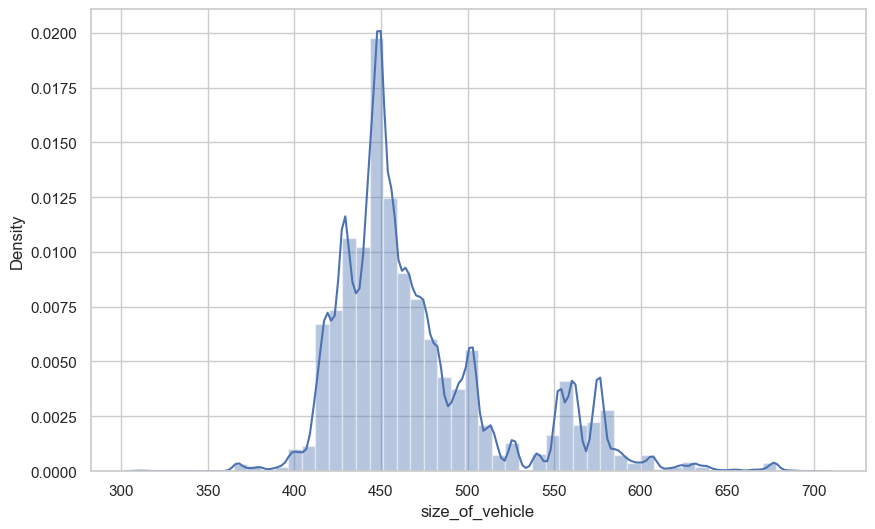

The mean of the size_of_vehicle column is 470.32300280664623.
The median of the size_of_vehicle column is 456.50000000000006.


In [192]:
# plotting the distribution of the column
plt.figure(figsize=(10, 6))
sns.distplot(cars_df['size_of_vehicle'])
plt.show()

# checking the mean and median of the column
print(f"The mean of the size_of_vehicle column is {cars_df['size_of_vehicle'].mean()}.")
print(f"The median of the size_of_vehicle column is {cars_df['size_of_vehicle'].median()}.")

- As we can see, most vehicles have a size of 439-450 inches.

Now after clean all column step by step, we can drop description 

In [193]:
# Dropping the description column
cars_df.drop('description', axis=1, inplace=True)

#### Target Variable - price
| Target  | Description  | Data Type |
|:--------:|:--------:|:--------:|
|  price   |  The price of the vehicle. This will be the target variable for the model.  |  Continuous  |


Since the target variable is continuous, this will be a regression problem. This will help us determine which regression model will be the best fit for the data. The regression models we will be using are:

Lets take a look at the distribution of the price column and see what we can learn from it.


In [194]:
cars_df['price'].describe()

count   2625910.000
mean      31302.497
std       19331.885
min         256.000
25%       19922.000
50%       27495.000
75%       39047.000
max     3299995.000
Name: price, dtype: float64

- We can see the the most expensive vehicle is over3million,theaveragepriceofavehicleis 31302.497, and the cheapest vehicle is $256.

In [195]:
# checking the value_counts of the column
cars_df['price'].value_counts()

price
16995.000    6524
17995.000    6338
19995.000    6322
15995.000    6252
14995.000    6186
             ... 
81036.000       1
85231.000       1
63576.000       1
76338.000       1
73108.000       1
Name: count, Length: 85492, dtype: int64

- There maybe a lot of outliers in the price column. Lets plot a boxplot to see if there are any outliers.

C:\Users\X1\AppData\Local\Temp\ipykernel_12900\3455062210.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df['price'])
C:\Users\X1\AppData\Local\Temp\ipykernel_12900\3455062210.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


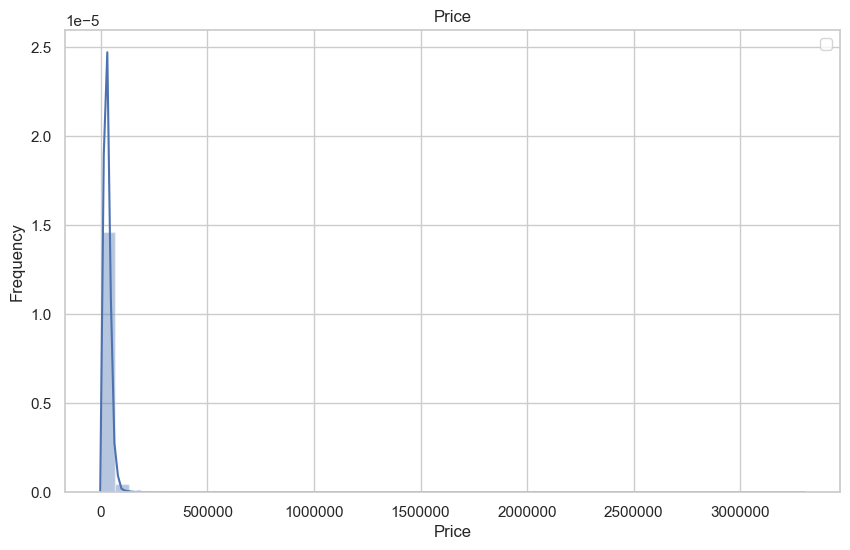

In [196]:
# plotting a histogram of the column
plt.figure(figsize=(10,6))
sns.distplot(cars_df['price'])
plt.title('Price')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
#removing the scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.show()

- The graph shows that our target variable is right skewed. This means that the majority of the values are clustered on the left side of the graph. This is not ideal for our model because it will be biased towards the lower values. We will need to transform the target variable to make it more normal.

C:\Users\X1\AppData\Local\Temp\ipykernel_12900\1849542715.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df['price'])
C:\Users\X1\AppData\Local\Temp\ipykernel_12900\1849542715.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


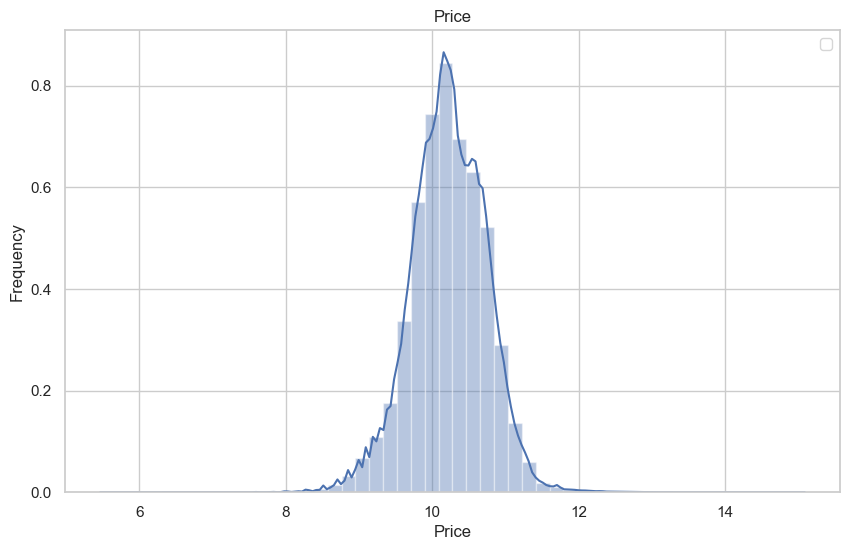

In [197]:
# normalizing the price column
cars_df['price'] = np.log(cars_df['price'])

# plotting the distribution of the price column
plt.figure(figsize=(10,6))
sns.distplot(cars_df['price'])
plt.title('Price')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
#removing the scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.show()

### Saving the Cleaned Dataset

In [198]:
# saving the dataset
cars_df.to_csv('../Data/cleaned_dataset_1.csv', index=True)

### Exploratory Data Analysis (EDA)

- After data cleaning and preparation, it is important and should be had to understand the underlying patterns and relationships in the data. This phase of the project involves analyzing and summarizing the data using various statistical and visual techniques to gain insights into the data. The goal here is to gain the deeper understanding of the data, identify patterns, trends, outliers, and anomalies that may impact the accuracy of the predictions, and help to formulate hypotheses about the relationships between the variables. This information can then be used to refine the data cleaning steps and feature engineering, and to select the approriate modeling techniques.

#### Importing libraries and data

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set() # setting seaborn default for plots

# removing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

In [200]:
# importing the dataset
cars_df2 = pd.read_csv('../Data/cleaned_dataset_1.csv', index_col='vin')

# checking the shape of the dataset after EDA 
cars_df2.shape

(2625910, 25)

In [201]:
cars_df2.sample(5)

,body_type,city,daysonmarket,engine_type,exterior_color,fuel_type,has_incidents,horsepower,interior_color,make_name,maximum_seating,mileage,model_name,price,savings_amount,seller_rating,torque,transmission,wheel_system,year,combined_fuel_economy,legroom,major_options_count,dealer_region,size_of_vehicle
vin,,,,,,,,,,,,,,,,,,,,,,,,,
WP0CB29928S777235,Convertible,Randolph,61,H6,Black,Gasoline,False,355.000,Black,Other,4,30884.000,Other,10.714,4771,4 stars,295.000,M,RWD,2008,25.000,80.166,2.000,NaN,406.100
4T1B11HK1KU247648,Sedan,Spartanburg,6,I4,White,Gasoline,False,203.000,Other Color,Toyota,5,1120.000,Camry,10.165,750,4 stars,264.273,A,FWD,2019,33.500,80.100,6.000,South,449.200
2FMDK3G98EBB17053,SUV / Crossover,Valparaiso,14,I4,Silver,Gasoline,False,240.000,Gray,Ford,5,19096.000,Other,9.615,79,5 stars,270.000,A,FWD,2014,25.500,80.300,6.161,Midwest,468.200
2GNALCEK7G1149969,SUV / Crossover,Oklahoma City,40,I4,Black,Gasoline,False,182.000,Black,Chevrolet,5,71567.000,Equinox,9.311,3317,3 stars,172.000,A,FWD,2016,25.000,81.100,4.000,South,460.900
YV1A22ML6H1011065,Sedan,Exeter,53,I4,Black,Gasoline,False,316.000,Black,Other,5,33677.000,Other,10.403,1145,5 stars,295.000,A,AWD,2017,26.500,78.100,11.000,NaN,463.400


In [202]:
cars_df2.columns

Index(['body_type', 'city', 'daysonmarket', 'engine_type', 'exterior_color',
       'fuel_type', 'has_incidents', 'horsepower', 'interior_color',
       'make_name', 'maximum_seating', 'mileage', 'model_name', 'price',
       'savings_amount', 'seller_rating', 'torque', 'transmission',
       'wheel_system', 'year', 'combined_fuel_economy', 'legroom',
       'major_options_count', 'dealer_region', 'size_of_vehicle'],
      dtype='object')

#### Descriptive Statistics

- In the first part of the project, we performed some descriptive statistics on the data to help us understand the distribution of the data and to identify any outliers. In this section, we will go over the results of the descriptive statistics and discuss the findings in more detail.

In [203]:
# descriptive statistics of the dataset
cars_df2.describe()

,daysonmarket,horsepower,maximum_seating,mileage,price,savings_amount,torque,year,combined_fuel_economy,legroom,major_options_count,size_of_vehicle
count,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000,2625910.000
mean,75.514,243.627,5.438,20835.650,10.221,554.623,264.273,2018.348,26.149,80.244,6.326,470.323
std,104.468,90.510,1.141,28501.016,0.510,1104.509,107.955,3.234,7.641,3.323,3.466,48.734
min,0.000,63.000,2.000,0.000,5.545,0.000,68.000,1915.000,9.500,0.000,1.000,310.200
25%,15.000,170.000,5.000,5.000,9.900,0.000,181.000,2017.000,22.500,78.200,4.000,440.200
50%,36.000,228.000,5.000,1099.000,10.222,0.000,264.273,2020.000,25.000,80.166,6.000,456.500
75%,82.000,300.000,6.000,35246.000,10.573,786.000,275.000,2020.000,28.500,81.700,8.000,485.400
max,3573.000,1001.000,15.000,109146.000,15.009,147414.000,944.000,2021.000,127.000,104.964,59.000,702.000


- These results already told that the average vehicle on CarGurus has been on market for 75 days, has a horsepower of 243, a maximum seating capacity of 5, a mileage of 20835 miles, a price of 10.221, savingsamount of 554, a torque of 264, and was manufactured in 2018. The average vehicle has a combined fuel economy of 26.3 miles per gallon, a legroom of 80.2 inches, a major options count of 6.3, and a size of 470.3 cubic feet.
- This table is a little difficult to read, and only accounts for the numerical columns. So, let's visualize the data instead.

- We will start by looking at the categorical columns.

In [204]:
# checking how many categorical columns are in the dataframe
cars_df2.select_dtypes(include='object').nunique()

body_type            9
city              4614
engine_type         23
exterior_color      14
fuel_type            8
                  ... 
model_name          21
seller_rating        5
transmission         4
wheel_system         5
dealer_region        4
Length: 12, dtype: int64

In [205]:
cars_df2['city'].value_counts()

city
Houston           39044
San Antonio       22151
Columbus          16350
Miami             15560
Jacksonville      13784
                  ...  
Enumclaw              1
Vine Grove            1
Edwards               1
Grove Hill            1
New Gloucester        1
Name: count, Length: 4614, dtype: int64

In [206]:
top_cities = cars_df2['city'].value_counts().nlargest(20).index
cars_df2['city'] = cars_df2['city'].apply(lambda x: x if x in top_cities else 'Others')


In [207]:
cars_df2['city'].value_counts()

city
Others           2356922
Houston            39044
San Antonio        22151
Columbus           16350
Miami              15560
                  ...   
Denver              9026
Springfield         8939
El Paso             8853
Tucson              8771
Oklahoma City       8635
Name: count, Length: 21, dtype: int64

In [208]:
top_cities = cars_df2['engine_type'].value_counts().nlargest(10).index
cars_df2['engine_type'] = cars_df2['engine_type'].apply(lambda x: x if x in top_cities else 'Others')

In [209]:
cars_df2['engine_type'].value_counts()

engine_type
I4                 1363339
V6                  700100
V8                  315092
Gasoline engine      61741
H4                   58905
                    ...   
I6                   41477
Electric engine      15761
Others                8649
Diesel engine         6344
H6                    4131
Name: count, Length: 11, dtype: int64

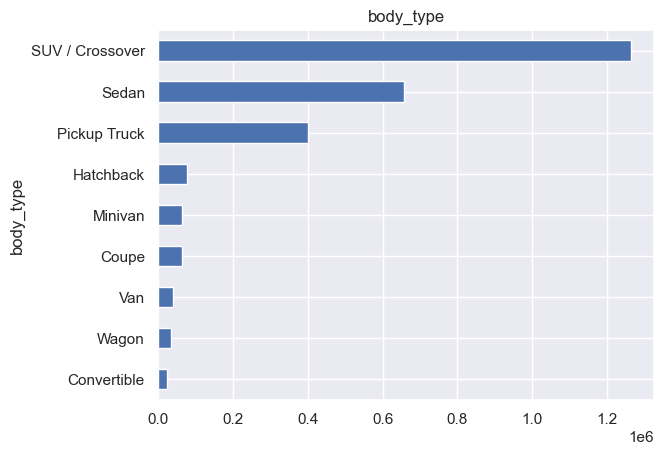

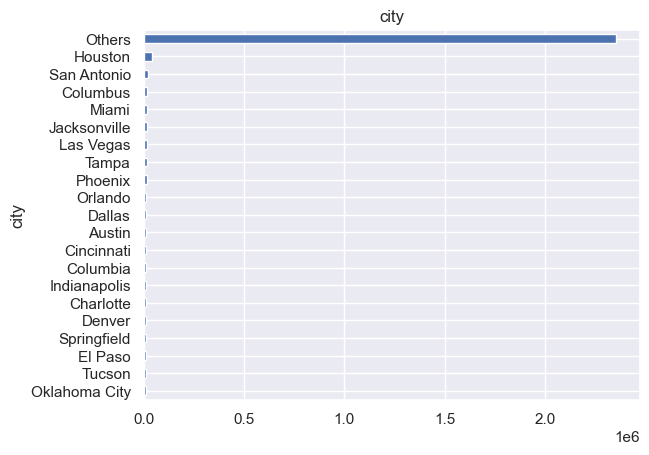

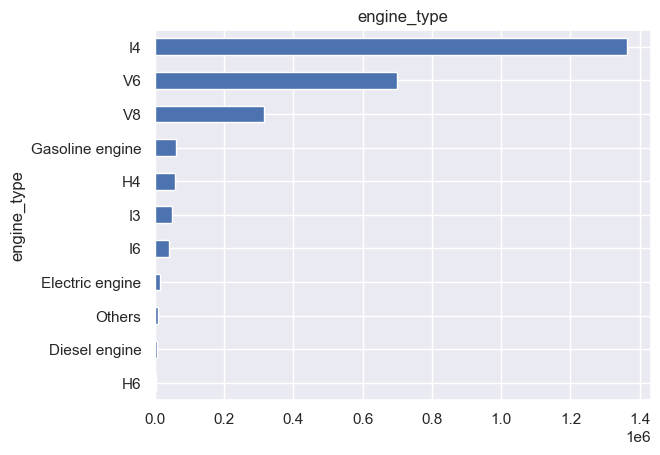

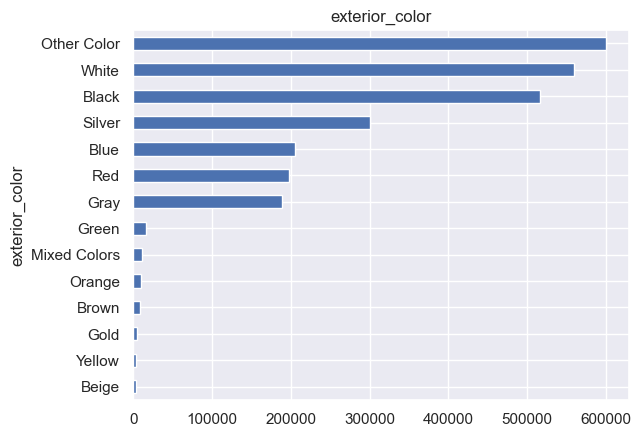

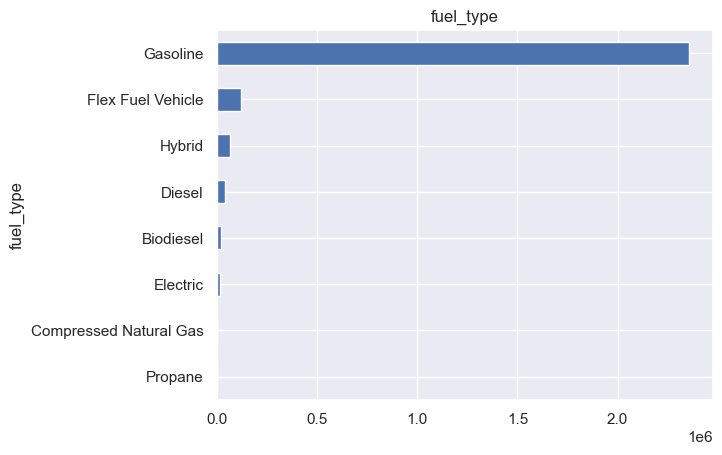

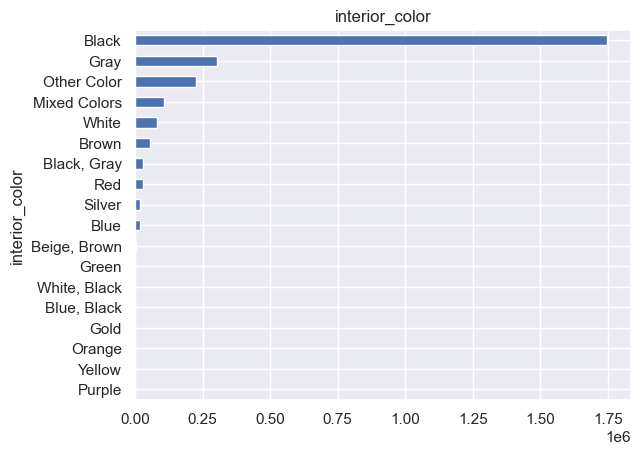

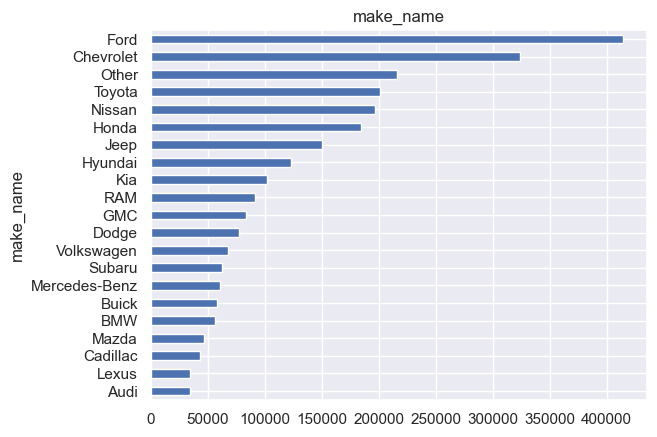

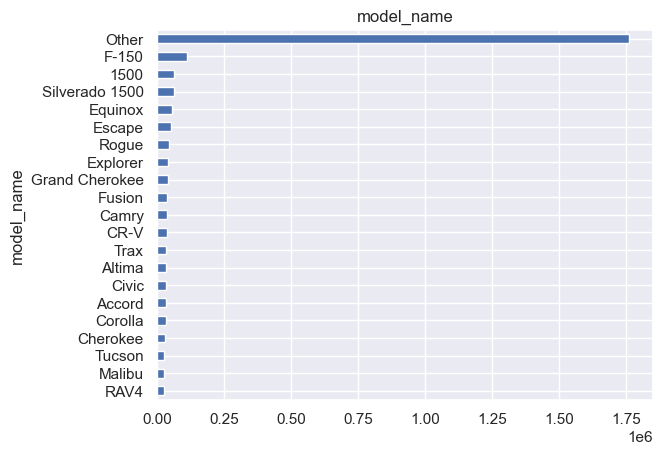

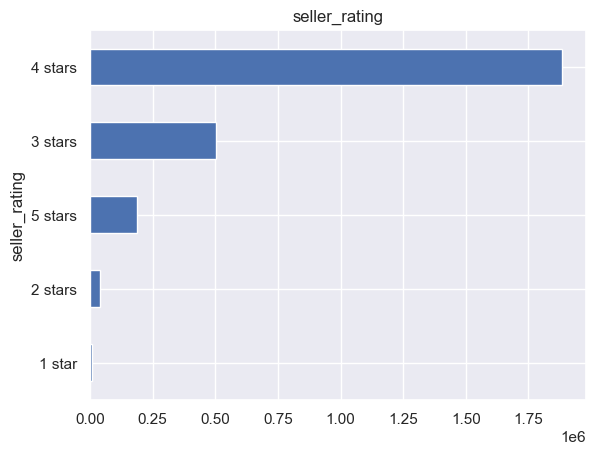

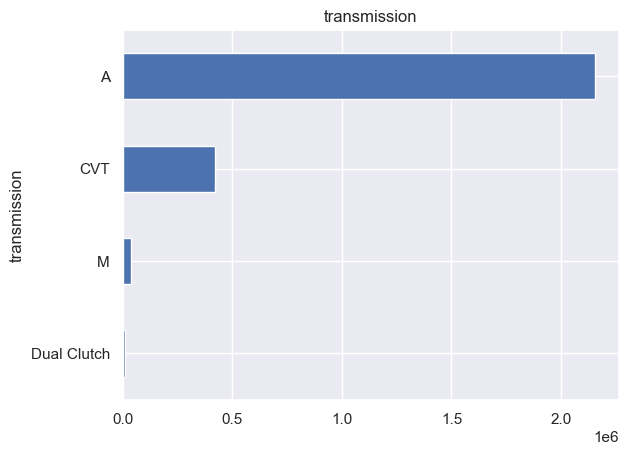

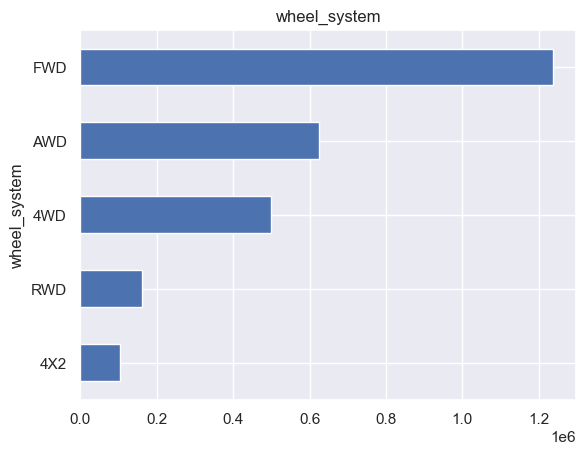

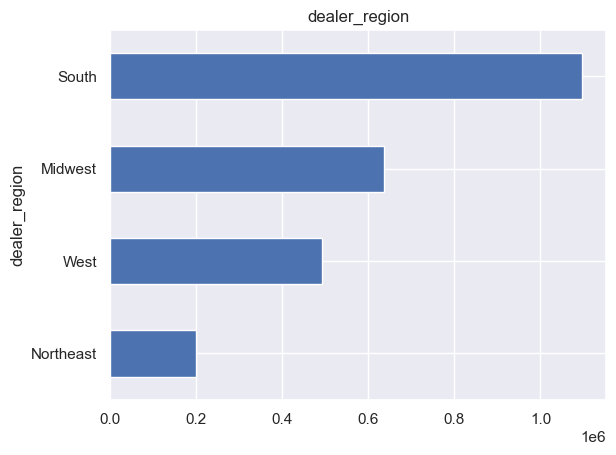

In [210]:
# Pull out the categorical variables
categorical_df = cars_df2.select_dtypes('object')

# Iterate column by column
for column in categorical_df:
    
    # Do Something
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.title(column)
    plt.show()

What we got:

- The top 3 body types are SUV / Crossover, Sedan, and Pickup Truck.
- The top 3 engine types are I4, V6, and V8.
- Top 3 exterior colors are White, Black, and Silver.
- Top 3 fuel types are Gasoline, Flex Fuel, and Hybrid.
- Top 3 interior colors are Black, Gray, and White.
- Top 3 makes are Ford, Chevrolet, and Toyota.
- Top 3 models are F-150, Silverado 1500, and F-250.
- Most seller ratings are between 3 and 4.
- Most common wheel systems are FWD and AWD.
- Most vehicles are located in the Northeast region.
- Most common transmission types are Automatic and CVT.

- Though we already looked at the numerical columns, lets plot them to get a better understanding of the distribution of the data and see if we missed anything.

In [211]:
# checking how many numerical columns are in the dataframe
cars_df2.select_dtypes(exclude='object').nunique()

daysonmarket               1571
has_incidents                 2
horsepower                  448
maximum_seating              11
mileage                  108997
                          ...  
year                         96
combined_fuel_economy       165
legroom                     342
major_options_count          54
size_of_vehicle            2526
Length: 13, dtype: int64

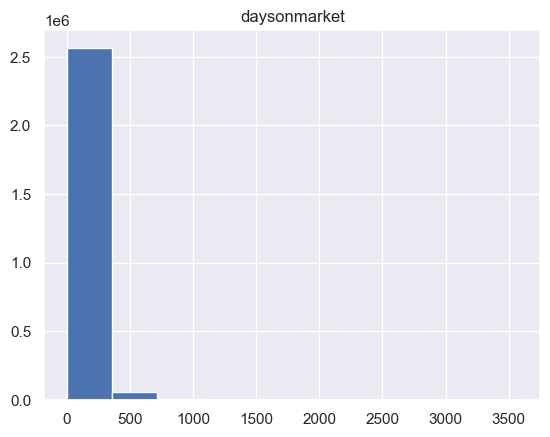

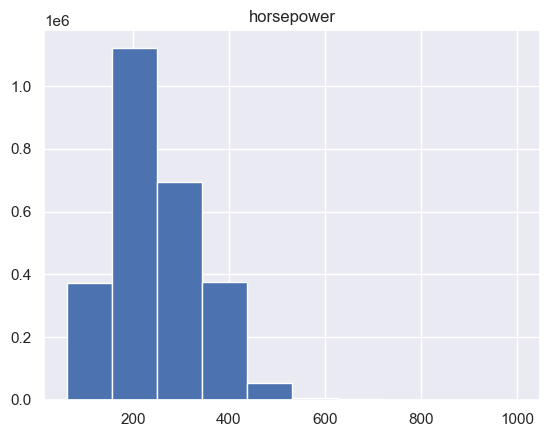

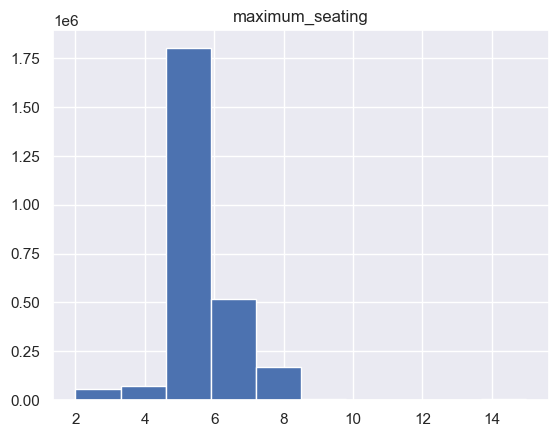

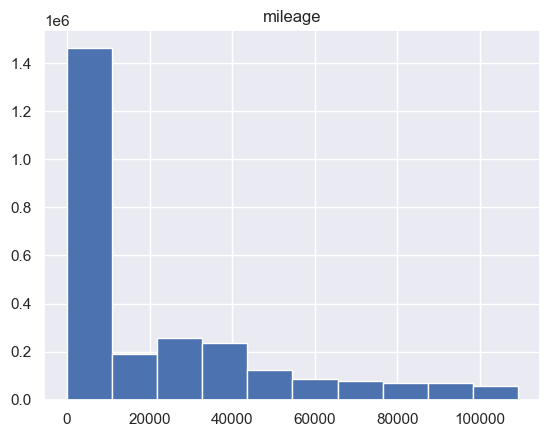

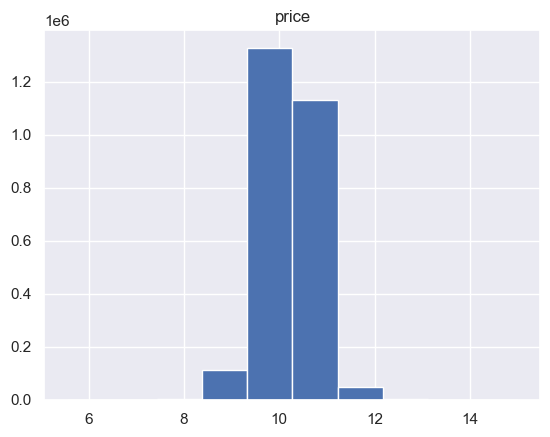

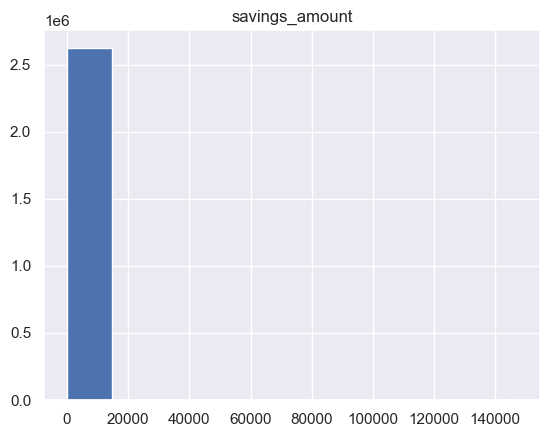

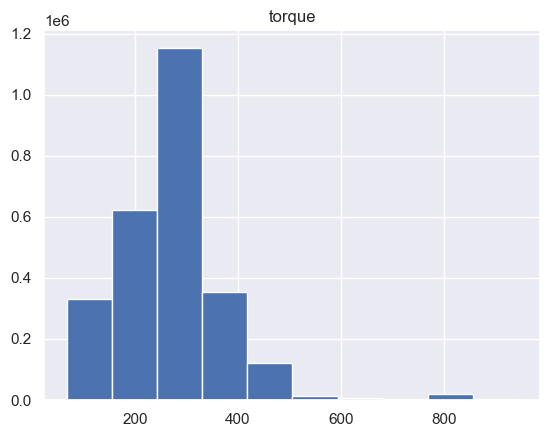

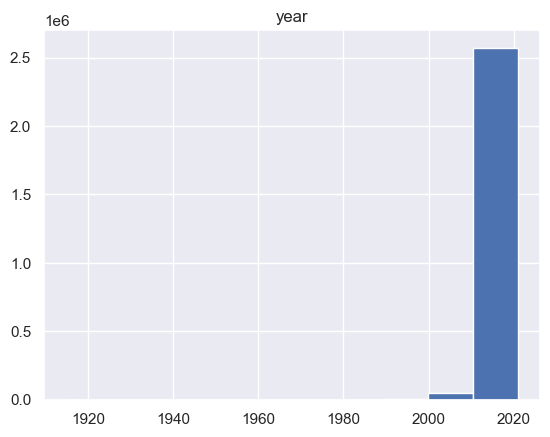

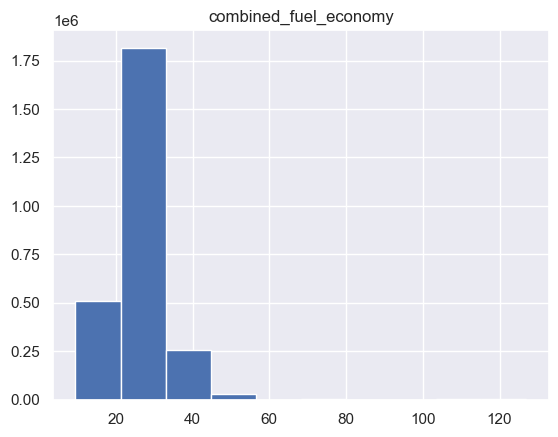

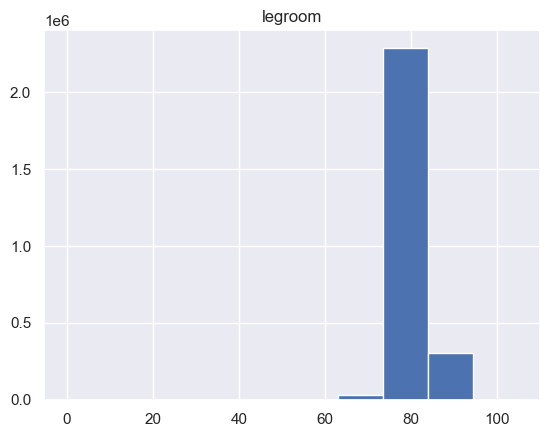

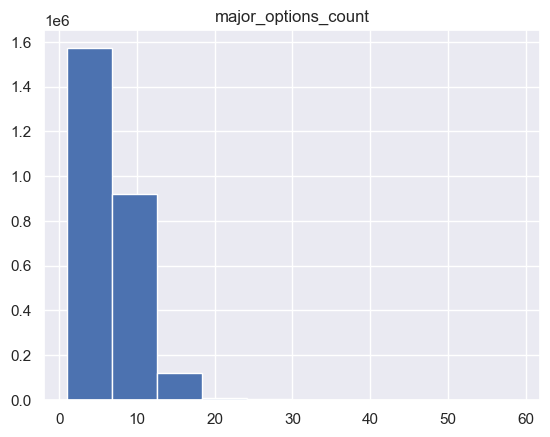

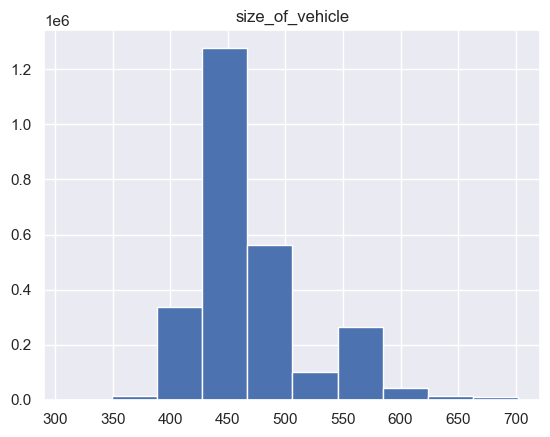

In [212]:
# Pull out the categorical variables
numerical_df = cars_df2.select_dtypes(['float', 'int64'])

# Iterate column by column
for column in numerical_df:
    
    # Do Something
    numerical_df[column].hist()
    plt.title(column)
    plt.show()

What we got:

- The average listing duration is 75 days.
- The average speed is 243 horsepower.
- The average vehicle has 5 seats.
- Most vehicles being sold are relatively new, with an average mileage of 20,835 miles.
- The average price of a vehicle is $29933.37.
- The average savings is $554.62.
- The average torque is 260 ft-lbs.
- The average vehicle is 4 years old, in this dataset.
- The average fuel economy is 26.3 miles per gallon.
- The average leg room is 80.5 inches.
- The average wheelbase is 121.5 inches.
- The average major options are 6 options.
- The average size of a vehicle is 439.5 inches.


#### Correlation Analysis

- Let's take a look at the correlation between the features. We will start by looking at the correlation between the numerical features.

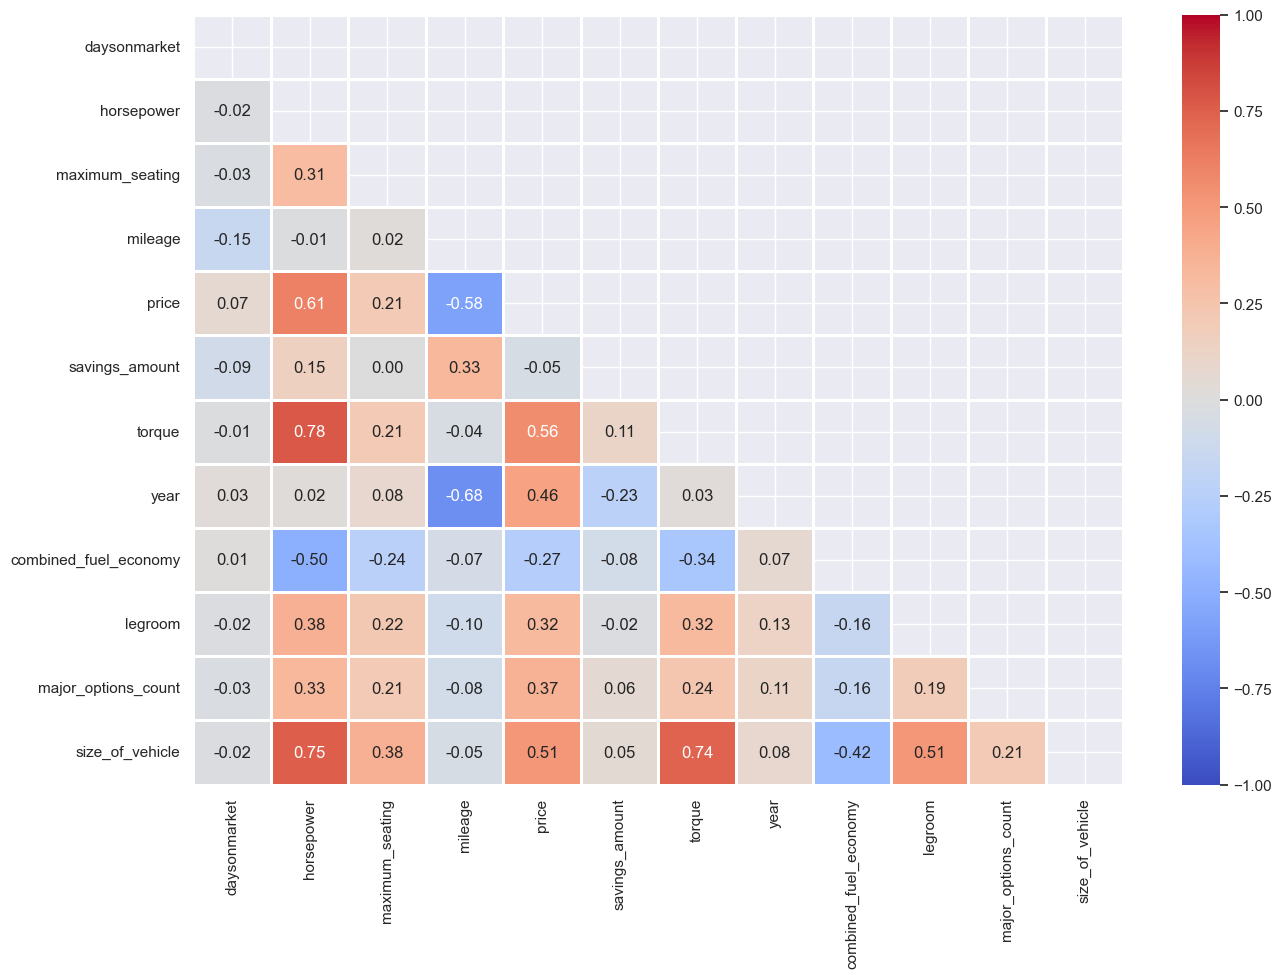

In [213]:
# Select only numeric columns
numeric_cars_df2 = cars_df2.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_df = numeric_cars_df2.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap with the mask
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, 
            center=0, cmap="coolwarm", mask=mask, linewidths=1, fmt=".2f")

plt.show()



#### Encoding Categorical Columns
- Now before we look at the correlation between the categorical columns, we need to encode them.

In [214]:
cat_col = cars_df2.select_dtypes(include='object')


In [215]:
from sklearn.preprocessing import LabelEncoder

encoded_df = cars_df2.copy()
label_mapping_dict = {}

for col in encoded_df.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    
    mapping = dict(zip(le.classes_, le.transform(le.classes_).tolist()))
    label_mapping_dict[col] = mapping

    print(f"\nMapping for column '{col}':")
    for k, v in mapping.items():
        print(f"  {k} → {v}")


Mapping for column 'body_type':
  Convertible → 0
  Coupe → 1
  Hatchback → 2
  Minivan → 3
  Pickup Truck → 4
  SUV / Crossover → 5
  Sedan → 6
  Van → 7
  Wagon → 8

Mapping for column 'city':
  Austin → 0
  Charlotte → 1
  Cincinnati → 2
  Columbia → 3
  Columbus → 4
  Dallas → 5
  Denver → 6
  El Paso → 7
  Houston → 8
  Indianapolis → 9
  Jacksonville → 10
  Las Vegas → 11
  Miami → 12
  Oklahoma City → 13
  Orlando → 14
  Others → 15
  Phoenix → 16
  San Antonio → 17
  Springfield → 18
  Tampa → 19
  Tucson → 20

Mapping for column 'engine_type':
  Diesel engine → 0
  Electric engine → 1
  Gasoline engine → 2
  H4 → 3
  H6 → 4
  I3 → 5
  I4 → 6
  I6 → 7
  Others → 8
  V6 → 9
  V8 → 10

Mapping for column 'exterior_color':
  Beige → 0
  Black → 1
  Blue → 2
  Brown → 3
  Gold → 4
  Gray → 5
  Green → 6
  Mixed Colors → 7
  Orange → 8
  Other Color → 9
  Red → 10
  Silver → 11
  White → 12
  Yellow → 13

Mapping for column 'fuel_type':
  Biodiesel → 0
  Compressed Natural Gas → 1


We temporarily save this label and value mapping dataset to json , it will be useful after final feature selection, and deploying to web requires understanding what is the corresponding value for each categorical label

In [227]:
import json
with open('label_mappings.json', 'w', encoding='utf-8') as f:
    json.dump(label_mapping_dict, f, ensure_ascii=False, indent=4)

In [217]:
encoded_categorical_df = encoded_df[list(label_mapping_dict.keys()) + ['price']]
all_categorical_cols = list(label_mapping_dict.keys()) 
# correlation
categorical_corr = encoded_categorical_df.corr()['price'].sort_values(ascending=False)

print("\nCorrelation (Encoded categorical features vs price):")
display(categorical_corr.to_frame().style.background_gradient(cmap='coolwarm'))

threshold = 0.1
selected_categorical_features = categorical_corr[abs(categorical_corr) >= threshold].index.tolist()
print("\nSelected categorical features (corr>= 0.1):", selected_categorical_features)

removed_categorical_cols = list(set(all_categorical_cols) - set(selected_categorical_features))
print("\nRemove categorical features :", removed_categorical_cols)



Correlation (Encoded categorical features vs price):


,price
price,1.000000
engine_type,0.317800
seller_rating,0.045032
model_name,0.040780
interior_color,0.031390
dealer_region,0.019802
exterior_color,0.006577
city,0.002852
make_name,-0.053519
fuel_type,-0.160918



Selected categorical features (corr>= 0.1): ['price', 'engine_type', 'fuel_type', 'transmission', 'body_type', 'has_incidents', 'wheel_system']

Remove categorical features : ['seller_rating', 'interior_color', 'exterior_color', 'model_name', 'make_name', 'city', 'dealer_region']


In [218]:
encoded_df_cleaned = encoded_df.drop(columns=removed_categorical_cols)

In [219]:
encoded_df_cleaned

,body_type,daysonmarket,engine_type,fuel_type,has_incidents,horsepower,maximum_seating,mileage,price,savings_amount,torque,transmission,wheel_system,year,combined_fuel_economy,legroom,major_options_count,size_of_vehicle
vin,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,5,522,6,5,0,177.000,5,7.000,10.049,0,200.000,0,3,2019,25.000,76.300,1.000,426.600
SALCJ2FX1LH858117,5,207,6,5,0,246.000,7,8.000,10.747,0,269.000,0,2,2020,25.000,77.200,1.000,460.200
SALRR2RV0L2433391,5,196,9,5,0,340.000,7,11.000,11.119,0,332.000,0,2,2020,25.000,76.600,6.161,494.000
SALCJ2FXXLH862327,5,137,6,5,0,246.000,7,7.000,10.797,0,269.000,0,2,2020,25.000,77.200,1.000,460.200
SALYK2EX1LA261711,5,242,6,5,0,247.000,5,12.000,11.111,0,269.000,0,2,2020,25.000,77.300,8.000,469.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2GNAXJEV0J6261526,5,16,6,5,0,170.000,5,41897.000,9.798,381,264.273,0,3,2018,29.000,80.600,4.000,443.300
1GNERFKW0LJ225508,5,171,9,5,0,310.000,8,5.000,10.505,0,266.000,0,3,2020,22.500,79.400,6.000,493.900
3FA6P0HD3GR134062,6,91,2,5,1,240.000,5,57992.000,9.472,462,270.000,0,3,2016,25.000,82.600,3.000,462.100


- Though we already looked at the numerical columns, lets plot them to get a better understanding of the distribution of the data and see if we missed anything.

In [220]:
# Only keep numeric columns and exclude columns with too many missing values
numeric_df = cars_df2.select_dtypes(include='number')

# Drop columns with too many missing values if needed
numeric_df = numeric_df.dropna(axis=1, thresh=int(0.9 * len(numeric_df)))  # keep cols with >= 90% non-null

# Optional: reduce to only columns that are not all 0s or have very little variance
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.01)  # tweak threshold if needed
filtered_data = vt.fit_transform(numeric_df)

# Get the column names after variance filter
filtered_columns = numeric_df.columns[vt.get_support()]

# Compute correlation with price
filtered_df = pd.DataFrame(filtered_data, columns=filtered_columns)
if 'price' in filtered_df.columns:
    corr_price = filtered_df.corr()['price'].sort_values(ascending=False)
else:
    # Add price back temporarily for correlation
    filtered_df['price'] = numeric_df['price'].values
    corr_price = filtered_df.corr()['price'].sort_values(ascending=False)

# Display with gradient
corr_price.to_frame().style.background_gradient(cmap='coolwarm')


,price
price,1.000000
horsepower,0.611184
torque,0.560698
size_of_vehicle,0.509045
year,0.456368
major_options_count,0.366454
legroom,0.317011
maximum_seating,0.205582
daysonmarket,0.065746
savings_amount,-0.053845


##### Top Positive Influences on Price
- These features have strong positive correlations with price meaning as they increase, the price of the vehicle tends to increase too:
1. Horsepower (0.61): More powerful engines are a key premium feature.
2. Torque (0.56): Indicates strong acceleration and towing capacity — desirable for trucks/SUVs.
3. Vehicle Size (0.51): Larger vehicles (SUVs, pickups) command higher prices.
4. Year (0.46): Newer vehicles are generally more expensive, which is expected.
5. Major Options Count (0.37): Features like sunroofs, leather seats, and infotainment systems boost value.

##### Medium Correlation
- Legroom (0.32) and Maximum Seating (0.21): These indicate that space and passenger capacity do add value but aren't the strongest price drivers.

##### Negative influences Price
- These features are negatively correlated with price:
1. Mileage (-0.58): Strong inverse relationship — higher mileage reduces price.
2. Combined Fuel Economy (-0.26): Counterintuitive at first: higher fuel economy, lower price.
3. Savings Amount (-0.05): Vehicles with larger “discounts” tend to have lower list prices.
4. Days on Market (0.07): Weak positive correlation: longer listed cars have slightly higher prices.


#### Feature Selection
- Lets set our correlation threshold to 0.05 and -0.05. Meaning that we will only keep the features that have a correlation of 0.05 or higher, or -0.05 or lower. This will help us reduce the number of features in our dataset.

##### Price is Target Variable

In [221]:
# Select numeric features again (to be sure)
numeric_df = cars_df2.select_dtypes(include='number')

# Correlation with price
correlation_with_price = numeric_df.corr()['price'].drop('price')

# Set a threshold for importance
threshold = 0.1

# Select features with correlation magnitude >= threshold
selected_numeric_features = correlation_with_price[correlation_with_price.abs() >= threshold].index.tolist()

print("Selected numeric features:", selected_numeric_features)


Selected numeric features: ['horsepower', 'maximum_seating', 'mileage', 'torque', 'year', 'combined_fuel_economy', 'legroom', 'major_options_count', 'size_of_vehicle']


In [222]:
encoded_df_cleaned[selected_categorical_features]

,price,engine_type,fuel_type,transmission,body_type,has_incidents,wheel_system
vin,,,,,,,
ZACNJABB5KPJ92081,10.049,6,5,0,5,0,3
SALCJ2FX1LH858117,10.747,6,5,0,5,0,2
SALRR2RV0L2433391,11.119,9,5,0,5,0,2
SALCJ2FXXLH862327,10.797,6,5,0,5,0,2
SALYK2EX1LA261711,11.111,6,5,0,5,0,2
...,...,...,...,...,...,...,...
2GNAXJEV0J6261526,9.798,6,5,0,5,0,3
1GNERFKW0LJ225508,10.505,9,5,0,5,0,3
3FA6P0HD3GR134062,9.472,2,5,0,6,1,3


In [223]:
encoded_df_cleaned[selected_numeric_features]

,horsepower,maximum_seating,mileage,torque,year,combined_fuel_economy,legroom,major_options_count,size_of_vehicle
vin,,,,,,,,,
ZACNJABB5KPJ92081,177.000,5,7.000,200.000,2019,25.000,76.300,1.000,426.600
SALCJ2FX1LH858117,246.000,7,8.000,269.000,2020,25.000,77.200,1.000,460.200
SALRR2RV0L2433391,340.000,7,11.000,332.000,2020,25.000,76.600,6.161,494.000
SALCJ2FXXLH862327,246.000,7,7.000,269.000,2020,25.000,77.200,1.000,460.200
SALYK2EX1LA261711,247.000,5,12.000,269.000,2020,25.000,77.300,8.000,469.300
...,...,...,...,...,...,...,...,...,...
2GNAXJEV0J6261526,170.000,5,41897.000,264.273,2018,29.000,80.600,4.000,443.300
1GNERFKW0LJ225508,310.000,8,5.000,266.000,2020,22.500,79.400,6.000,493.900
3FA6P0HD3GR134062,240.000,5,57992.000,270.000,2016,25.000,82.600,3.000,462.100


So after select feature one by one, we need combine all of them

In [224]:
cars_selected = pd.concat([
    encoded_df_cleaned[selected_categorical_features],
    encoded_df_cleaned[selected_numeric_features]
], axis=1) 

cars_selected.head()

,price,engine_type,fuel_type,transmission,body_type,has_incidents,wheel_system,horsepower,maximum_seating,mileage,torque,year,combined_fuel_economy,legroom,major_options_count,size_of_vehicle
vin,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,10.049,6,5,0,5,0,3,177.000,5,7.000,200.000,2019,25.000,76.300,1.000,426.600
SALCJ2FX1LH858117,10.747,6,5,0,5,0,2,246.000,7,8.000,269.000,2020,25.000,77.200,1.000,460.200
SALRR2RV0L2433391,11.119,9,5,0,5,0,2,340.000,7,11.000,332.000,2020,25.000,76.600,6.161,494.000
SALCJ2FXXLH862327,10.797,6,5,0,5,0,2,246.000,7,7.000,269.000,2020,25.000,77.200,1.000,460.200
SALYK2EX1LA261711,11.111,6,5,0,5,0,2,247.000,5,12.000,269.000,2020,25.000,77.300,8.000,469.300


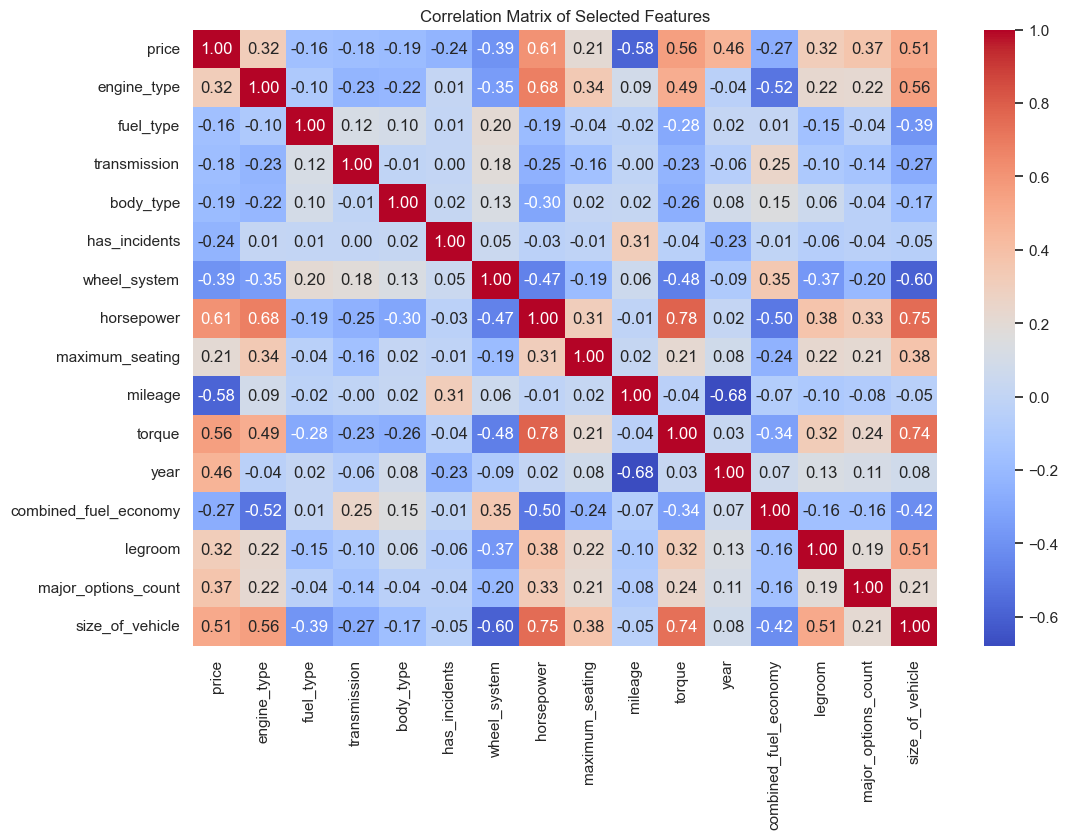

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(cars_selected.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

- We can see that there are no features that are highly correlated with each other. This means that we do not have to worry about multicollinearity.


#### **Export feature selected**
- We will now save the new dataset and begin training our model on the next notebook.

In [227]:
# Exporting the dataframe to a csv file
cars_selected.to_csv("../Data/cars_price_prediction.csv")

#### Summary of Actionable Insights from EDA:

- **Market Demand**: SUVs, sedans, and pickup trucks are the most popular, indicating strong consumer interest in these vehicle types. Aligning inventory and marketing with these trends can boost sales.

- **Brand Awareness**: Ford, Chevrolet, and Toyota lead the market, showing high consumer trust. Marketing strategies can leverage this brand recognition.

- **Fuel Economy**: With an average of 19 mpg city and 20–30 mpg highway, fuel efficiency is a key factor for buyers. Highlighting this in promotions can attract budget-conscious consumers.

- **Engine Preferences**: I4, V6, and V8 engines are most in demand. Vehicle design and production should focus on these engine types.

- **Color Trends**: White, black, and silver are top exterior choices, while black, gray, and white dominate interiors. Offering these popular colors ensures broader appeal.

- **Accident History**: Many vehicles have past damage or incidents. Transparent reporting and thorough background checks can build buyer trust.

- **Fuel Type**: Gasoline remains the dominant fuel type, with an average tank size of 26 gallons. This suggests traditional fuel options are still preferred by most buyers.

- **Performance Metrics**: Average horsepower and torque indicate that consumers value a balanced performance level. Manufacturers should consider this in vehicle design.

- **Features and Capacity**: A 5-seat configuration with major options is common. Providing well-equipped vehicles with comfortable seating meets mainstream demand.

- **Age and Pricing**: Consumers favor nearly new vehicles (average age: 2 years) priced around $29,933. Pricing strategies should reflect this sweet spot.

- **Transmission Type**: Automatic transmissions are highly preferred, indicating a need to focus production and marketing on this feature.

- **Wheel Systems**: FWD, AWD, and 4WD are most popular, showing consumer interest in diverse traction capabilities. Tailoring inventory to include these systems supports market alignment.

##### Body Types, fuel types or tranmissions type

##### Body Types

In [252]:
from sklearn.feature_selection import SelectKBest, f_classif

# Step 1: Define features (X) and target (y)
X = cars_df2.select_dtypes(include='number').drop(columns=['body_type'], errors='ignore')
y = cars_df2['body_type']

# Step 2: Apply ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Step 3: Collect scores and features
scores = selector.scores_
feature_scores = dict(zip(X.columns, scores))

# Step 4: Select top features (you can set a threshold if needed)
threshold = 10  # Try different values to be more/less strict
selected_features = [feature for feature, score in feature_scores.items() if score >= threshold]

# Output
print("Selected features for predicting body_type:", selected_features)


Selected features for predicting body_type: ['daysonmarket', 'horsepower', 'maximum_seating', 'mileage', 'price', 'savings_amount', 'torque', 'year', 'combined_fuel_economy', 'legroom', 'major_options_count', 'size_of_vehicle']


In [253]:
import pandas as pd

feature_ranking = pd.Series(feature_scores).sort_values(ascending=False)
print(feature_ranking)

size_of_vehicle         599600.664
horsepower              158202.399
torque                  154733.549
combined_fuel_economy   116912.261
price                    90828.655
maximum_seating          89665.220
legroom                  83049.408
year                     20138.231
major_options_count      15159.792
mileage                   8577.033
savings_amount            4535.774
daysonmarket              1057.279
dtype: float64


| Feature | F-Score | Interpretation |
| --- | --- | --- |
| size_of_vehicle | 599,731 | Strongest predictor — body type likely strongly tied to vehicle size. |
| horsepower | 158,648 | Performance plays a major role in distinguishing body types. |
| torque | 155,213 | Similar to horsepower — high torque likely linked to pickups/SUVs. |
| combined_fuel_economy | 114,653 | More efficient vehicles tend to be sedans/hatchbacks. |
| price | 90,742 | Higher-end body types (e.g., SUVs, luxury) correlate with price. |
| maximum_seating | 89,433 | Larger seating usually found in SUVs/minivans. |
| legroom | 83,259 | Bigger vehicles → more space. Clear body type indicator. |
| year | 20,259 | Some variation, but likely a weaker contributor. |
| major_options_count | 14,880 | More options may be common in SUVs/luxury cars. |
| mileage | 8,751 | Not a strong predictor — possibly just noise. |
| savings_amount | 4,563 | Minor relevance. Might reflect condition/market vs. type. |
| daysonmarket | 1,052 | Weakest contributor. Selling speed not tied to body type. |

##### Fuel types

In [254]:
from sklearn.feature_selection import SelectKBest, f_classif

# Step 1: Define features (X) and target (y)
X = cars_df2.select_dtypes(include='number').drop(columns=['fuel_type'], errors='ignore')
y = cars_df2['fuel_type']

# Step 2: Apply ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Step 3: Collect scores and features
scores = selector.scores_
feature_scores = dict(zip(X.columns, scores))

# Step 4: Select top features (you can set a threshold if needed)
threshold = 10  # Try different values to be more/less strict
selected_features = [feature for feature, score in feature_scores.items() if score >= threshold]

# Output
print("Selected features for predicting body_type:", selected_features)

Selected features for predicting body_type: ['daysonmarket', 'horsepower', 'maximum_seating', 'mileage', 'price', 'savings_amount', 'torque', 'year', 'combined_fuel_economy', 'legroom', 'major_options_count', 'size_of_vehicle']


In [255]:
import pandas as pd

feature_ranking = pd.Series(feature_scores).sort_values(ascending=False)
print(feature_ranking)

combined_fuel_economy   265216.319
size_of_vehicle          89910.489
torque                   54931.999
horsepower               24392.854
price                    12269.274
legroom                  11706.348
maximum_seating           5750.596
mileage                   4071.220
major_options_count       1592.269
year                      1520.227
savings_amount            1389.117
daysonmarket                92.129
dtype: float64


##### Transmission Type

In [256]:
from sklearn.feature_selection import SelectKBest, f_classif

# Step 1: Define features (X) and target (y)
X = cars_df2.select_dtypes(include='number').drop(columns=['transmission'], errors='ignore')
y = cars_df2['transmission']

# Step 2: Apply ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Step 3: Collect scores and features
scores = selector.scores_
feature_scores = dict(zip(X.columns, scores))

# Step 4: Select top features (you can set a threshold if needed)
threshold = 10  # Try different values to be more/less strict
selected_features = [feature for feature, score in feature_scores.items() if score >= threshold]

# Output
print("Selected features for predicting body_type:", selected_features)

Selected features for predicting body_type: ['daysonmarket', 'horsepower', 'maximum_seating', 'mileage', 'price', 'savings_amount', 'torque', 'year', 'combined_fuel_economy', 'legroom', 'major_options_count', 'size_of_vehicle']


In [257]:
import pandas as pd

feature_ranking = pd.Series(feature_scores).sort_values(ascending=False)
print(feature_ranking)

combined_fuel_economy   117091.442
horsepower              112423.852
torque                   92592.262
size_of_vehicle          86999.451
price                    33557.379
year                     30131.746
maximum_seating          22535.127
major_options_count      17486.759
legroom                  13003.144
mileage                   9208.080
savings_amount            6761.150
daysonmarket               348.015
dtype: float64
